### Επεξεργασία Σημάτων και Γραφήματα - Εργασία 1




In [6]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')






Use either of the following lines

In [ ]:
from gensim.models import Word2Vec
#from node2vec import Node2Vec

In [7]:
!pip install word2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=141242 sha256=85fde60f6b33e48ff2d18ffd4a2bc3de3925fbfe0a2974371843eccf9911b3c3
  Stored in directory: /root/.cache/pip/wheels/6a/fa/d1/e03e8c10e0e2aa5c7b6e2b46b4a1c715d140283853937bb4b1
Successfully built word2vec


In [8]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [9]:
#G = nx.karate_club_graph()
#edge_list = list(G.edges())

Here upload file from local folder

In [10]:
from google.colab import files
uploaded = files.upload()

import io
edge_list = pd.read_csv(io.BytesIO(uploaded['edges.csv']))



Saving edges.csv to edges.csv


In [11]:
# check first five rows of the dataframe
edge_list.head()

id_1   id_2
0     0  18427
1     1  21708
2     1  22208
3     1  22171
4     1   6829

In [14]:
# convert integers into string
edge_list = edge_list.applymap(str)

Creation of graph using pandas library (good for tables)


In [15]:
# create undirected graph from the edgelist
G=nx.from_pandas_edgelist(edge_list, source='id_1', target='id_2', create_using=nx.Graph())

In [42]:
print(G)


Graph with 22470 nodes and 171002 edges


In [17]:
G.nodes

NodeView(('0', '18427', '1', '21708', '22208', '22171', '6829', '16590', '20135', '8894', '15785', '10281', '22265', '7136', '22405', '10379', '13737', '8533', '14344', '2812', '5755', '16260', '15026', '17370', '17460', '8049', '5307', '4987', '18304', '12305', '19743', '20024', '21729', '10554', '11557', '5228', '9934', '2', '9048', '6353', '2629', '11537', '13205', '22304', '17728', '19337', '126', '17554', '8495', '5857', '3', '16742', '293', '5826', '3479', '19753', '17346', '10945', '22338', '11319', '9654', '4', '13645', '20876', '11446', '16203', '2830', '2004', '20624', '21280', '1182', '21538', '1443', '11423', '187', '5730', '2983', '1489', '6823', '17695', '11102', '6390', '17242', '10018', '5147', '6427', '14628', '1882', '22401', '16128', '12872', '9263', '14155', '21631', '6329', '17507', '2282', '9706', '4738', '3676', '16972', '5356', '8514', '14332', '7212', '8843', '1879', '1377', '1997', '7813', '3891', '2732', '4109', '5', '8288', '9206', '1840', '17845', '17411', 

1.1 Deep Walk Basics
Random Walk

The random walk here just considers the neighbors up to one step away.
This has to be adapted ...

In [18]:
# function to generate random walk sequences of nodes for a particular node
def get_random_walk(node, walk_length):
    # initialization
    random_walk_length = [node]

    print(random_walk_length)

    #loop over to get the nodes visited in a random walk
    for i in range(walk_length-1):
        # list of neighbors
        neighbors = list(G.neighbors(node))
        # if the same neighbors are present in ranom_walk_length list, then donot add them as new neighbors
        neighbors = list(set(neighbors) - set(random_walk_length))
        if len(neighbors) == 0:
            break
        # pick any one neighbor randomly from the neighbors list
        random_neighbor = random.choice(neighbors)
        # append that random_neighbor to the random_walk_length list
        random_walk_length.append(random_neighbor)
        node = random_neighbor

    return random_walk_length

In [19]:
# check random walk for node '2'
get_random_walk('2', 10)

['2']


['2',
 '6353',
 '12521',
 '1041',
 '8519',
 '12643',
 '11657',
 '17145',
 '19743',
 '3073']

In [20]:
# calculate random walks for every node in the Graph
all_nodes = list(G.nodes())
number_of_random_walks = 5
random_walks = []

for node in tqdm(all_nodes):
    # number of random walks
    for i in range(number_of_random_walks):
        # append the random walk sequence of a node from a specified length
        random_walks.append(get_random_walk(node, 10))

  0%|          | 49/22470 [00:00<01:00, 369.68it/s]

['0']
['0']
['0']
['0']
['0']
['18427']
['18427']
['18427']
['18427']
['18427']
['1']
['1']
['1']
['1']
['1']
['21708']
['21708']
['21708']
['21708']
['21708']
['22208']
['22208']
['22208']
['22208']
['22208']
['22171']
['22171']
['22171']
['22171']
['22171']
['6829']
['6829']
['6829']
['6829']
['6829']
['16590']
['16590']
['16590']
['16590']
['16590']
['20135']
['20135']
['20135']
['20135']
['20135']
['8894']
['8894']
['8894']
['8894']
['8894']
['15785']
['15785']
['15785']
['15785']
['15785']
['10281']
['10281']
['10281']
['10281']
['10281']
['22265']
['22265']
['22265']
['22265']
['22265']
['7136']
['7136']
['7136']
['7136']
['7136']
['22405']
['22405']
['22405']
['22405']
['22405']
['10379']
['10379']
['10379']
['10379']
['10379']
['13737']
['13737']
['13737']
['13737']
['13737']
['8533']
['8533']
['8533']
['8533']
['8533']
['14344']
['14344']
['14344']
['14344']
['14344']
['2812']
['2812']
['2812']
['2812']
['2812']
['5755']
['5755']
['5755']
['5755']
['5755']
['16260']
['16260']


  1%|          | 139/22470 [00:00<00:34, 643.34it/s]

['945']
['945']
['945']
['945']
['20271']
['20271']
['20271']
['20271']
['20271']
['14862']
['14862']
['14862']
['14862']
['14862']
['3726']
['3726']
['3726']
['3726']
['3726']
['6946']
['6946']
['6946']
['6946']
['6946']
['12902']
['12902']
['12902']
['12902']
['12902']
['4808']
['4808']
['4808']
['4808']
['4808']
['14241']
['14241']
['14241']
['14241']
['14241']
['7106']
['7106']
['7106']
['7106']
['7106']
['18497']
['18497']
['18497']
['18497']
['18497']
['6']
['6']
['6']
['6']
['6']
['18893']
['18893']
['18893']
['18893']
['18893']
['1193']
['1193']
['1193']
['1193']
['1193']
['4000']
['4000']
['4000']
['4000']
['4000']
['12625']
['12625']
['12625']
['12625']
['12625']
['290']
['290']
['290']
['290']
['290']
['22261']
['22261']
['22261']
['22261']
['22261']
['13966']
['13966']
['13966']
['13966']
['13966']
['3300']
['3300']
['3300']
['3300']
['3300']
['22403']
['22403']
['22403']
['22403']
['22403']
['18782']
['18782']
['18782']
['18782']
['18782']
['5066']
['5066']
['5066']
['5066

  1%|          | 207/22470 [00:00<00:59, 374.08it/s]


['6008']
['6008']
['19356']
['19356']
['19356']
['19356']
['19356']
['13']
['13']
['13']
['13']
['13']
['22435']
['22435']
['22435']
['22435']
['22435']
['1744']
['1744']
['1744']
['1744']
['1744']
['395']
['395']
['395']
['395']
['395']
['16399']
['16399']
['16399']
['16399']
['16399']
['9001']
['9001']
['9001']
['9001']
['9001']
['2280']
['2280']
['2280']
['2280']
['2280']
['6113']
['6113']
['6113']
['6113']
['6113']
['7235']
['7235']
['7235']
['7235']
['7235']
['213']
['213']
['213']
['213']
['213']
['7431']
['7431']
['7431']
['7431']
['7431']
['501']
['501']
['501']
['501']
['501']
['11971']
['11971']
['11971']
['11971']
['11971']
['16282']
['16282']
['16282']
['16282']
['16282']
['11209']
['11209']
['11209']
['11209']
['11209']
['1494']
['1494']
['1494']
['1494']
['1494']
['12762']
['12762']
['12762']
['12762']
['12762']
['4253']
['4253']
['4253']
['4253']
['4253']
['2904']
['2904']
['2904']
['2904']
['2904']
['18062']
['18062']
['18062']
['18062']
['18062']
['6037']
['6037']
['6

  1%|▏         | 303/22470 [00:00<01:01, 359.17it/s]

['1626']
['1626']
['1626']
['1626']
['1626']
['17433']
['17433']
['17433']
['17433']
['17433']
['2417']
['2417']
['2417']
['2417']
['2417']
['21059']
['21059']
['21059']
['21059']
['21059']
['18']
['18']
['18']
['18']
['18']
['9220']
['9220']
['9220']
['9220']
['9220']
['20276']
['20276']
['20276']
['20276']
['20276']
['11804']
['11804']
['11804']
['11804']
['11804']
['11323']
['11323']
['11323']
['11323']
['11323']
['9677']
['9677']
['9677']
['9677']
['9677']
['11644']
['11644']
['11644']
['11644']
['11644']
['3259']
['3259']
['3259']
['3259']
['3259']
['2224']
['2224']
['2224']
['2224']
['2224']
['8139']
['8139']
['8139']
['8139']
['8139']
['16615']
['16615']
['16615']
['16615']
['16615']
['961']
['961']
['961']
['961']
['961']
['8232']
['8232']
['8232']
['8232']
['8232']
['5943']
['5943']
['5943']
['5943']
['5943']
['17163']
['17163']
['17163']
['17163']
['17163']
['15174']
['15174']
['15174']
['15174']
['15174']
['11498']
['11498']
['11498']
['11498']
['11498']
['7966']
['7966']
['

  2%|▏         | 384/22470 [00:00<01:00, 367.71it/s]

['10126']
['436']
['436']
['436']
['436']
['436']
['4045']
['4045']
['4045']
['4045']
['4045']
['6686']
['6686']
['6686']
['6686']
['6686']
['1063']
['1063']
['1063']
['1063']
['1063']
['10231']
['10231']
['10231']
['10231']
['10231']
['17357']
['17357']
['17357']
['17357']
['17357']
['6696']
['6696']
['6696']
['6696']
['6696']
['14249']
['14249']
['14249']
['14249']
['14249']
['347']
['347']
['347']
['347']
['347']
['9905']
['9905']
['9905']
['9905']
['9905']
['9151']
['9151']
['9151']
['9151']
['9151']
['5951']
['5951']
['5951']
['5951']
['5951']
['13530']
['13530']
['13530']
['13530']
['13530']
['1710']
['1710']
['1710']
['1710']
['1710']
['15188']
['15188']
['15188']
['15188']
['15188']
['4246']
['4246']
['4246']
['4246']
['4246']
['9104']
['9104']
['9104']
['9104']
['9104']
['9594']
['9594']
['9594']
['9594']
['9594']
['22']
['22']
['22']
['22']
['22']
['17818']
['17818']
['17818']
['17818']
['17818']
['4106']
['4106']
['4106']
['4106']
['4106']
['6540']
['6540']
['6540']
['6540']

  2%|▏         | 462/22470 [00:01<01:07, 327.66it/s]

['10544']
['10544']
['10544']
['10544']
['18368']
['18368']
['18368']
['18368']
['18368']
['17848']
['17848']
['17848']
['17848']
['17848']
['13602']
['13602']
['13602']
['13602']
['13602']
['14409']
['14409']
['14409']
['14409']
['14409']
['16994']
['16994']
['16994']
['16994']
['16994']
['19957']
['19957']
['19957']
['19957']
['19957']
['7139']
['7139']
['7139']
['7139']
['7139']
['12458']
['12458']
['12458']
['12458']
['12458']
['17354']
['17354']
['17354']
['17354']
['17354']
['8734']
['8734']
['8734']
['8734']
['8734']
['3270']
['3270']
['3270']
['3270']
['3270']
['7694']
['7694']
['7694']
['7694']
['7694']
['8763']
['8763']
['8763']
['8763']
['8763']
['3798']
['3798']
['3798']
['3798']
['3798']
['8788']
['8788']
['8788']
['8788']
['8788']
['8149']
['8149']
['8149']
['8149']
['8149']
['18153']
['18153']
['18153']
['18153']
['18153']
['4948']
['4948']
['4948']
['4948']
['4948']
['3779']
['3779']
['3779']
['3779']
['3779']
['6264']
['6264']
['6264']
['6264']
['6264']
['18949']
['189

  2%|▏         | 538/22470 [00:01<01:05, 335.81it/s]

['1722']
['1722']
['1722']
['1722']
['1722']
['5049']
['5049']
['5049']
['5049']
['5049']
['32']
['32']
['32']
['32']
['32']
['1703']
['1703']
['1703']
['1703']
['1703']
['16417']
['16417']
['16417']
['16417']
['16417']
['17252']
['17252']
['17252']
['17252']
['17252']
['19252']
['19252']
['19252']
['19252']
['19252']
['19222']
['19222']
['19222']
['19222']
['19222']
['18703']
['18703']
['18703']
['18703']
['18703']
['12869']
['12869']
['12869']
['12869']
['12869']
['10041']
['10041']
['10041']
['10041']
['10041']
['9839']
['9839']
['9839']
['9839']
['9839']
['9248']
['9248']
['9248']
['9248']
['9248']
['1783']
['1783']
['1783']
['1783']
['1783']
['4858']
['4858']
['4858']
['4858']
['4858']
['8531']
['8531']
['8531']
['8531']
['8531']
['22330']
['22330']
['22330']
['22330']
['22330']
['19574']
['19574']
['19574']
['19574']
['19574']
['7095']
['7095']
['7095']
['7095']
['7095']
['9986']
['9986']
['9986']
['9986']
['9986']
['14248']
['14248']
['14248']
['14248']
['14248']
['14790']
['147

  3%|▎         | 635/22470 [00:01<00:53, 408.15it/s]

['18234']
['19271']
['19271']
['19271']
['19271']
['19271']
['3864']
['3864']
['3864']
['3864']
['3864']
['8977']
['8977']
['8977']
['8977']
['8977']
['21630']
['21630']
['21630']
['21630']
['21630']
['16885']
['16885']
['16885']
['16885']
['16885']
['40']
['40']
['40']
['40']
['40']
['20152']
['20152']
['20152']
['20152']
['20152']
['12062']
['12062']
['12062']
['12062']
['12062']
['10581']
['10581']
['10581']
['10581']
['10581']
['10497']
['10497']
['10497']
['10497']
['10497']
['19197']
['19197']
['19197']
['19197']
['19197']
['41']
['41']
['41']
['41']
['41']
['9484']
['9484']
['9484']
['9484']
['9484']
['16635']
['16635']
['16635']
['16635']
['16635']
['14796']
['14796']
['14796']
['14796']
['14796']
['14772']
['14772']
['14772']
['14772']
['14772']
['6095']
['6095']
['6095']
['6095']
['6095']
['1200']
['1200']
['1200']
['1200']
['1200']
['19010']
['19010']
['19010']
['19010']
['19010']
['4882']
['4882']
['4882']
['4882']
['4882']
['19667']
['19667']
['19667']
['19667']
['19667']


  3%|▎         | 740/22470 [00:01<00:47, 458.81it/s]

['21087']
['21087']
['21087']
['21087']
['21087']
['5010']
['5010']
['5010']
['5010']
['5010']
['5317']
['5317']
['5317']
['5317']
['5317']
['8795']
['8795']
['8795']
['8795']
['8795']
['7606']
['7606']
['7606']
['7606']
['7606']
['7887']
['7887']
['7887']
['7887']
['7887']
['15604']
['15604']
['15604']
['15604']
['15604']
['11022']
['11022']
['11022']
['11022']
['11022']
['5337']
['5337']
['5337']
['5337']
['5337']
['1713']
['1713']
['1713']
['1713']
['1713']
['16993']
['16993']
['16993']
['16993']
['16993']
['21536']
['21536']
['21536']
['21536']
['21536']
['46']
['46']
['46']
['46']
['46']
['16127']
['16127']
['16127']
['16127']
['16127']
['3494']
['3494']
['3494']
['3494']
['3494']
['3963']
['3963']
['3963']
['3963']
['3963']
['2252']
['2252']
['2252']
['2252']
['2252']
['16368']
['16368']
['16368']
['16368']
['16368']
['5878']
['5878']
['5878']
['5878']
['5878']
['15553']
['15553']
['15553']
['15553']
['15553']
['365']
['365']
['365']
['365']
['365']
['47']
['47']
['47']
['47']
['

  4%|▎         | 787/22470 [00:02<01:00, 360.96it/s]


['14080']
['5972']
['5972']
['5972']
['5972']
['5972']
['12546']
['12546']
['12546']
['12546']
['12546']
['10857']
['10857']
['10857']
['10857']
['10857']
['17291']
['17291']
['17291']
['17291']
['17291']
['10100']
['10100']
['10100']
['10100']
['10100']
['7206']
['7206']
['7206']
['7206']
['7206']
['53']
['53']
['53']
['53']
['53']
['21072']
['21072']
['21072']
['21072']
['21072']
['54']
['54']
['54']
['54']
['54']
['13755']
['13755']
['13755']
['13755']
['13755']
['14402']
['14402']
['14402']
['14402']
['14402']
['12462']
['12462']
['12462']
['12462']
['12462']
['19426']
['19426']
['19426']
['19426']
['19426']
['14260']
['14260']
['14260']
['14260']
['14260']
['55']
['55']
['55']
['55']
['55']
['12472']
['12472']
['12472']
['12472']
['12472']
['10980']
['10980']
['10980']
['10980']
['10980']
['9578']
['9578']
['9578']
['9578']
['9578']
['15384']
['15384']
['15384']
['15384']
['15384']
['15839']
['15839']
['15839']
['15839']
['15839']
['21270']
['21270']
['21270']
['21270']
['21270']

  4%|▍         | 871/22470 [00:02<00:58, 369.49it/s]

['7951']
['7951']
['7951']
['7951']
['7951']
['20538']
['20538']
['20538']
['20538']
['20538']
['57']
['57']
['57']
['57']
['57']
['10895']
['10895']
['10895']
['10895']
['10895']
['2117']
['2117']
['2117']
['2117']
['2117']
['4656']
['4656']
['4656']
['4656']
['4656']
['10816']
['10816']
['10816']
['10816']
['10816']
['18442']
['18442']
['18442']
['18442']
['18442']
['6023']
['6023']
['6023']
['6023']
['6023']
['20543']
['20543']
['20543']
['20543']
['20543']
['12204']
['12204']
['12204']
['12204']
['12204']
['5561']
['5561']
['5561']
['5561']
['5561']
['6213']
['6213']
['6213']
['6213']
['6213']
['15940']
['15940']
['15940']
['15940']
['15940']
['5400']
['5400']
['5400']
['5400']
['5400']
['9882']
['9882']
['9882']
['9882']
['9882']
['16561']
['16561']
['16561']
['16561']
['16561']
['15071']
['15071']
['15071']
['15071']
['15071']
['59']
['59']
['59']
['59']
['59']
['5353']
['5353']
['5353']
['5353']
['5353']
['13048']
['13048']
['13048']
['13048']
['13048']
['18152']
['18152']
['181

  4%|▍         | 961/22470 [00:02<00:54, 396.94it/s]


['22236']
['9880']
['9880']
['9880']
['9880']
['9880']
['16482']
['16482']
['16482']
['16482']
['16482']
['3213']
['3213']
['3213']
['3213']
['3213']
['18881']
['18881']
['18881']
['18881']
['18881']
['19157']
['19157']
['19157']
['19157']
['19157']
['21594']
['21594']
['21594']
['21594']
['21594']
['13238']
['13238']
['13238']
['13238']
['13238']
['4079']
['4079']
['4079']
['4079']
['4079']
['16400']
['16400']
['16400']
['16400']
['16400']
['8501']
['8501']
['8501']
['8501']
['8501']
['11788']
['11788']
['11788']
['11788']
['11788']
['11001']
['11001']
['11001']
['11001']
['11001']
['4601']
['4601']
['4601']
['4601']
['4601']
['12556']
['12556']
['12556']
['12556']
['12556']
['11809']
['11809']
['11809']
['11809']
['11809']
['8968']
['8968']
['8968']
['8968']
['8968']
['13339']
['13339']
['13339']
['13339']
['13339']
['4604']
['4604']
['4604']
['4604']
['4604']
['5220']
['5220']
['5220']
['5220']
['5220']
['1728']
['1728']
['1728']
['1728']
['1728']
['11667']
['11667']
['11667']
['11

  4%|▍         | 1002/22470 [00:02<00:54, 391.55it/s]


['13244']
['17566']
['17566']
['17566']
['17566']
['17566']
['17392']
['17392']
['17392']
['17392']
['17392']
['9940']
['9940']
['9940']
['9940']
['9940']
['66']
['66']
['66']
['66']
['66']
['9858']
['9858']
['9858']
['9858']
['9858']
['21572']
['21572']
['21572']
['21572']
['21572']
['15718']
['15718']
['15718']
['15718']
['15718']
['8458']
['8458']
['8458']
['8458']
['8458']
['1679']
['1679']
['1679']
['1679']
['1679']
['2216']
['2216']
['2216']
['2216']
['2216']
['4846']
['4846']
['4846']
['4846']
['4846']
['9382']
['9382']
['9382']
['9382']
['9382']
['3987']
['3987']
['3987']
['3987']
['3987']
['12677']
['12677']
['12677']
['12677']
['12677']
['67']
['67']
['67']
['67']
['67']
['18992']
['18992']
['18992']
['18992']
['18992']
['16676']
['16676']
['16676']
['16676']
['16676']
['791']
['791']
['791']
['791']
['791']
['18919']
['18919']
['18919']
['18919']
['18919']
['10932']
['10932']
['10932']
['10932']
['10932']
['68']
['68']
['68']
['68']
['68']
['366']
['366']
['366']
['366']
['

  5%|▍         | 1101/22470 [00:02<00:50, 424.25it/s]

['6844']
['6844']
['15502']
['15502']
['15502']
['15502']
['15502']
['6920']
['6920']
['6920']
['6920']
['6920']
['4630']
['4630']
['4630']
['4630']
['4630']
['8452']
['8452']
['8452']
['8452']
['8452']
['3731']
['3731']
['3731']
['3731']
['3731']
['3487']
['3487']
['3487']
['3487']
['3487']
['1327']
['1327']
['1327']
['1327']
['1327']
['8523']
['8523']
['8523']
['8523']
['8523']
['75']
['75']
['75']
['75']
['75']
['14659']
['14659']
['14659']
['14659']
['14659']
['19027']
['19027']
['19027']
['19027']
['19027']
['8014']
['8014']
['8014']
['8014']
['8014']
['11244']
['11244']
['11244']
['11244']
['11244']
['14854']
['14854']
['14854']
['14854']
['14854']
['17877']
['17877']
['17877']
['17877']
['17877']
['2725']
['2725']
['2725']
['2725']
['2725']
['2648']
['2648']
['2648']
['2648']
['2648']
['4903']
['4903']
['4903']
['4903']
['4903']
['77']
['77']
['77']
['77']
['77']
['9603']
['9603']
['9603']
['9603']
['9603']
['16960']
['16960']
['16960']
['16960']
['16960']
['8482']
['8482']
['84

  5%|▌         | 1206/22470 [00:03<00:47, 446.69it/s]

['16303']
['16303']
['16303']
['5188']
['5188']
['5188']
['5188']
['5188']
['8483']
['8483']
['8483']
['8483']
['8483']
['5778']
['5778']
['5778']
['5778']
['5778']
['13400']
['13400']
['13400']
['13400']
['13400']
['8852']
['8852']
['8852']
['8852']
['8852']
['3199']
['3199']
['3199']
['3199']
['3199']
['12190']
['12190']
['12190']
['12190']
['12190']
['20927']
['20927']
['20927']
['20927']
['20927']
['7967']
['7967']
['7967']
['7967']
['7967']
['16761']
['16761']
['16761']
['16761']
['16761']
['21344']
['21344']
['21344']
['21344']
['21344']
['3204']
['3204']
['3204']
['3204']
['3204']
['14577']
['14577']
['14577']
['14577']
['14577']
['2232']
['2232']
['2232']
['2232']
['2232']
['10444']
['10444']
['10444']
['10444']
['10444']
['5029']
['5029']
['5029']
['5029']
['5029']
['7499']
['7499']
['7499']
['7499']
['7499']
['626']
['626']
['626']
['626']
['626']
['17536']
['17536']
['17536']
['17536']
['17536']
['21178']
['21178']
['21178']
['21178']
['21178']
['15394']
['15394']
['15394']


  6%|▌         | 1253/22470 [00:03<00:57, 370.91it/s]

['14181']
['14181']
['19870']
['19870']
['19870']
['19870']
['19870']
['14272']
['14272']
['14272']
['14272']
['14272']
['7535']
['7535']
['7535']
['7535']
['7535']
['12500']
['12500']
['12500']
['12500']
['12500']
['1047']
['1047']
['1047']
['1047']
['1047']
['14115']
['14115']
['14115']
['14115']
['14115']
['16648']
['16648']
['16648']
['16648']
['16648']
['679']
['679']
['679']
['679']
['679']
['20653']
['20653']
['20653']
['20653']
['20653']
['10066']
['10066']
['10066']
['10066']
['10066']
['7961']
['7961']
['7961']
['7961']
['7961']
['19795']
['19795']
['19795']
['19795']
['19795']
['16968']
['16968']
['16968']
['16968']
['16968']
['16520']
['16520']
['16520']
['16520']
['16520']
['8519']
['8519']
['8519']
['8519']
['8519']
['19992']
['19992']
['19992']
['19992']
['19992']
['16186']
['16186']
['16186']
['16186']
['16186']
['1271']
['1271']
['1271']
['1271']
['1271']
['14166']
['14166']
['14166']
['14166']
['14166']
['16977']
['16977']
['16977']
['16977']
['16977']
['20827']
['208

  6%|▌         | 1365/22470 [00:03<00:55, 383.31it/s]

['1372']
['1372']
['1372']
['5212']
['5212']
['5212']
['5212']
['5212']
['21985']
['21985']
['21985']
['21985']
['21985']
['6916']
['6916']
['6916']
['6916']
['6916']
['18825']
['18825']
['18825']
['18825']
['18825']
['16032']
['16032']
['16032']
['16032']
['16032']
['17391']
['17391']
['17391']
['17391']
['17391']
['21588']
['21588']
['21588']
['21588']
['21588']
['95']
['95']
['95']
['95']
['95']
['1357']
['1357']
['1357']
['1357']
['1357']
['4232']
['4232']
['4232']
['4232']
['4232']
['4755']
['4755']
['4755']
['4755']
['4755']
['4188']
['4188']
['4188']
['4188']
['4188']
['13173']
['13173']
['13173']
['13173']
['13173']
['7196']
['7196']
['7196']
['7196']
['7196']
['9330']
['9330']
['9330']
['9330']
['9330']
['6566']
['6566']
['6566']
['6566']
['6566']
['1181']
['1181']
['1181']
['1181']
['1181']
['13049']
['13049']
['13049']
['13049']
['13049']
['20706']
['20706']
['20706']
['20706']
['20706']
['9869']
['9869']
['9869']
['9869']
['9869']
['17804']
['17804']
['17804']
['17804']
['1

  6%|▋         | 1446/22470 [00:03<00:58, 358.49it/s]


['15567']
['1283']
['1283']
['1283']
['1283']
['1283']
['17667']
['17667']
['17667']
['17667']
['17667']
['6091']
['6091']
['6091']
['6091']
['6091']
['17229']
['17229']
['17229']
['17229']
['17229']
['18187']
['18187']
['18187']
['18187']
['18187']
['16290']
['16290']
['16290']
['16290']
['16290']
['3154']
['3154']
['3154']
['3154']
['3154']
['10779']
['10779']
['10779']
['10779']
['10779']
['729']
['729']
['729']
['729']
['729']
['9284']
['9284']
['9284']
['9284']
['9284']
['6536']
['6536']
['6536']
['6536']
['6536']
['21226']
['21226']
['21226']
['21226']
['21226']
['17128']
['17128']
['17128']
['17128']
['17128']
['20592']
['20592']
['20592']
['20592']
['20592']
['2455']
['2455']
['2455']
['2455']
['2455']
['10657']
['10657']
['10657']
['10657']
['10657']
['22374']
['22374']
['22374']
['22374']
['22374']
['3502']
['3502']
['3502']
['3502']
['3502']
['5808']
['5808']
['5808']
['5808']
['5808']
['2096']
['2096']
['2096']
['2096']
['2096']
['6470']
['6470']
['6470']
['6470']
['6470']

  7%|▋         | 1529/22470 [00:04<00:55, 375.13it/s]


['7365']
['7365']
['2051']
['2051']
['2051']
['2051']
['2051']
['3221']
['3221']
['3221']
['3221']
['3221']
['14308']
['14308']
['14308']
['14308']
['14308']
['1789']
['1789']
['1789']
['1789']
['1789']
['9164']
['9164']
['9164']
['9164']
['9164']
['9843']
['9843']
['9843']
['9843']
['9843']
['17169']
['17169']
['17169']
['17169']
['17169']
['20337']
['20337']
['20337']
['20337']
['20337']
['20778']
['20778']
['20778']
['20778']
['20778']
['8574']
['8574']
['8574']
['8574']
['8574']
['21307']
['21307']
['21307']
['21307']
['21307']
['8663']
['8663']
['8663']
['8663']
['8663']
['9777']
['9777']
['9777']
['9777']
['9777']
['5045']
['5045']
['5045']
['5045']
['5045']
['216']
['216']
['216']
['216']
['216']
['18819']
['18819']
['18819']
['18819']
['18819']
['18369']
['18369']
['18369']
['18369']
['18369']
['20415']
['20415']
['20415']
['20415']
['20415']
['100']
['100']
['100']
['100']
['100']
['11266']
['11266']
['11266']
['11266']
['11266']
['15008']
['15008']
['15008']
['15008']
['1500

  7%|▋         | 1611/22470 [00:04<00:56, 367.04it/s]

['11310']
['11310']
['11310']
['11310']
['11310']
['16191']
['16191']
['16191']
['16191']
['16191']
['827']
['827']
['827']
['827']
['827']
['10174']
['10174']
['10174']
['10174']
['10174']
['8630']
['8630']
['8630']
['8630']
['8630']
['2869']
['2869']
['2869']
['2869']
['2869']
['20045']
['20045']
['20045']
['20045']
['20045']
['12589']
['12589']
['12589']
['12589']
['12589']
['20820']
['20820']
['20820']
['20820']
['20820']
['17920']
['17920']
['17920']
['17920']
['17920']
['104']
['104']
['104']
['104']
['104']
['10057']
['10057']
['10057']
['10057']
['10057']
['589']
['589']
['589']
['589']
['589']
['6612']
['6612']
['6612']
['6612']
['6612']
['19115']
['19115']
['19115']
['19115']
['19115']
['10095']
['10095']
['10095']
['10095']
['10095']
['4323']
['4323']
['4323']
['4323']
['4323']
['5570']
['5570']
['5570']
['5570']
['5570']
['6358']
['6358']
['6358']
['6358']
['6358']
['15150']
['15150']
['15150']
['15150']
['15150']
['20756']
['20756']
['20756']
['20756']
['20756']
['10731']


  8%|▊         | 1689/22470 [00:04<00:55, 373.45it/s]


['20488']
['20488']
['20488']
['20488']
['20488']
['107']
['107']
['107']
['107']
['107']
['467']
['467']
['467']
['467']
['467']
['108']
['108']
['108']
['108']
['108']
['469']
['469']
['469']
['469']
['469']
['20316']
['20316']
['20316']
['20316']
['20316']
['109']
['109']
['109']
['109']
['109']
['3238']
['3238']
['3238']
['3238']
['3238']
['20107']
['20107']
['20107']
['20107']
['20107']
['4830']
['4830']
['4830']
['4830']
['4830']
['10969']
['10969']
['10969']
['10969']
['10969']
['14575']
['14575']
['14575']
['14575']
['14575']
['20380']
['20380']
['20380']
['20380']
['20380']
['14539']
['14539']
['14539']
['14539']
['14539']
['16749']
['16749']
['16749']
['16749']
['16749']
['9661']
['9661']
['9661']
['9661']
['9661']
['511']
['511']
['511']
['511']
['511']
['19470']
['19470']
['19470']
['19470']
['19470']
['7618']
['7618']
['7618']
['7618']
['7618']
['6233']
['6233']
['6233']
['6233']
['6233']
['5735']
['5735']
['5735']
['5735']
['5735']
['5987']
['5987']
['5987']
['5987']
['5

  8%|▊         | 1765/22470 [00:04<00:57, 362.42it/s]

['6621']
['6621']
['6621']
['6621']
['6621']
['6491']
['6491']
['6491']
['6491']
['6491']
['19735']
['19735']
['19735']
['19735']
['19735']
['21497']
['21497']
['21497']
['21497']
['21497']
['4099']
['4099']
['4099']
['4099']
['4099']
['2959']
['2959']
['2959']
['2959']
['2959']
['3932']
['3932']
['3932']
['3932']
['3932']
['4300']
['4300']
['4300']
['4300']
['4300']
['19133']
['19133']
['19133']
['19133']
['19133']
['3870']
['3870']
['3870']
['3870']
['3870']
['114']
['114']
['114']
['114']
['114']
['3563']
['3563']
['3563']
['3563']
['3563']
['10368']
['10368']
['10368']
['10368']
['10368']
['11228']
['11228']
['11228']
['11228']
['11228']
['18012']
['18012']
['18012']
['18012']
['18012']
['1705']
['1705']
['1705']
['1705']
['1705']
['3622']
['3622']
['3622']
['3622']
['3622']
['8637']
['8637']
['8637']
['8637']
['8637']
['20525']
['20525']
['20525']
['20525']
['20525']
['115']
['115']
['115']
['115']
['115']
['8785']
['8785']
['8785']
['8785']
['8785']
['10570']
['10570']
['10570']


  8%|▊         | 1845/22470 [00:04<00:43, 471.08it/s]

['2822']
['2822']
['2822']
['19093']
['19093']
['19093']
['19093']
['19093']
['8473']
['8473']
['8473']
['8473']
['8473']
['17296']
['17296']
['17296']
['17296']
['17296']
['17426']
['17426']
['17426']
['17426']
['17426']
['14895']
['14895']
['14895']
['14895']
['14895']
['124']
['124']
['124']
['124']
['124']
['9415']
['9415']
['9415']
['9415']
['9415']
['15262']
['15262']
['15262']
['15262']
['15262']
['5784']
['5784']
['5784']
['5784']
['5784']
['16850']
['16850']
['16850']
['16850']
['16850']
['22272']
['22272']
['22272']
['22272']
['22272']
['16812']
['16812']
['16812']
['16812']
['16812']
['17827']
['17827']
['17827']
['17827']
['17827']
['14331']
['14331']
['14331']
['14331']
['14331']
['5690']
['5690']
['5690']
['5690']
['5690']
['125']
['125']
['125']
['125']
['125']
['19856']
['19856']
['19856']
['19856']
['19856']
['14792']
['14792']
['14792']
['14792']
['14792']
['11147']
['11147']
['11147']
['11147']
['11147']
['8566']
['8566']
['8566']
['8566']
['8566']
['21963']
['21963'

  9%|▊         | 1935/22470 [00:05<01:00, 339.66it/s]

['641']
['641']
['641']
['641']
['11785']
['11785']
['11785']
['11785']
['11785']
['672']
['672']
['672']
['672']
['672']
['7452']
['7452']
['7452']
['7452']
['7452']
['4476']
['4476']
['4476']
['4476']
['4476']
['19129']
['19129']
['19129']
['19129']
['19129']
['142']
['142']
['142']
['142']
['142']
['9602']
['9602']
['9602']
['9602']
['9602']
['129']
['129']
['129']
['129']
['129']
['22359']
['22359']
['22359']
['22359']
['22359']
['13515']
['13515']
['13515']
['13515']
['13515']
['1035']
['1035']
['1035']
['1035']
['1035']
['9174']
['9174']
['9174']
['9174']
['9174']
['10256']
['10256']
['10256']
['10256']
['10256']
['10257']
['10257']
['10257']
['10257']
['10257']
['13112']
['13112']
['13112']
['13112']
['13112']
['12321']
['12321']
['12321']
['12321']
['12321']
['8557']
['8557']
['8557']
['8557']
['8557']
['18424']
['18424']
['18424']
['18424']
['18424']
['19640']
['19640']
['19640']
['19640']
['19640']
['12853']
['12853']
['12853']
['12853']
['12853']
['22283']
['22283']
['22283'

  9%|▉         | 1978/22470 [00:05<00:59, 345.14it/s]


['3432']
['3432']
['3432']
['3432']
['3432']
['11894']
['11894']
['11894']
['11894']
['11894']
['17231']
['17231']
['17231']
['17231']
['17231']
['6137']
['6137']
['6137']
['6137']
['6137']
['9389']
['9389']
['9389']
['9389']
['9389']
['19432']
['19432']
['19432']
['19432']
['19432']
['21356']
['21356']
['21356']
['21356']
['21356']
['19289']
['19289']
['19289']
['19289']
['19289']
['8790']
['8790']
['8790']
['8790']
['8790']
['10926']
['10926']
['10926']
['10926']
['10926']
['5093']
['5093']
['5093']
['5093']
['5093']
['3229']
['3229']
['3229']
['3229']
['3229']
['15012']
['15012']
['15012']
['15012']
['15012']
['134']
['134']
['134']
['134']
['134']
['11984']
['11984']
['11984']
['11984']
['11984']
['555']
['555']
['555']
['555']
['555']
['11500']
['11500']
['11500']
['11500']
['11500']
['17254']
['17254']
['17254']
['17254']
['17254']
['15616']
['15616']
['15616']
['15616']
['15616']
['21214']
['21214']
['21214']
['21214']
['21214']
['16664']
['16664']
['16664']
['16664']
['16664']

  9%|▉         | 2055/22470 [00:05<01:00, 338.74it/s]

['12064']
['12064']
['6413']
['6413']
['6413']
['6413']
['6413']
['5439']
['5439']
['5439']
['5439']
['5439']
['5158']
['5158']
['5158']
['5158']
['5158']
['51']
['51']
['51']
['51']
['51']
['20182']
['20182']
['20182']
['20182']
['20182']
['19732']
['19732']
['19732']
['19732']
['19732']
['11181']
['11181']
['11181']
['11181']
['11181']
['16362']
['16362']
['16362']
['16362']
['16362']
['554']
['554']
['554']
['554']
['554']
['7350']
['7350']
['7350']
['7350']
['7350']
['5448']
['5448']
['5448']
['5448']
['5448']
['18021']
['18021']
['18021']
['18021']
['18021']
['11712']
['11712']
['11712']
['11712']
['11712']
['12777']
['12777']
['12777']
['12777']
['12777']
['13639']
['13639']
['13639']
['13639']
['13639']
['10292']
['10292']
['10292']
['10292']
['10292']
['968']
['968']
['968']
['968']
['968']
['15187']
['15187']
['15187']
['15187']
['15187']
['10387']
['10387']
['10387']
['10387']
['10387']
['21066']
['21066']
['21066']
['21066']
['21066']
['21586']
['21586']
['21586']
['21586']


  9%|▉         | 2134/22470 [00:05<00:44, 453.56it/s]

['152']
['152']
['8529']
['8529']
['8529']
['8529']
['8529']
['16574']
['16574']
['16574']
['16574']
['16574']
['5156']
['5156']
['5156']
['5156']
['5156']
['5719']
['5719']
['5719']
['5719']
['5719']
['6298']
['6298']
['6298']
['6298']
['6298']
['22428']
['22428']
['22428']
['22428']
['22428']
['15674']
['15674']
['15674']
['15674']
['15674']
['11686']
['11686']
['11686']
['11686']
['11686']
['8936']
['8936']
['8936']
['8936']
['8936']
['153']
['153']
['153']
['153']
['153']
['19372']
['19372']
['19372']
['19372']
['19372']
['18921']
['18921']
['18921']
['18921']
['18921']
['3906']
['3906']
['3906']
['3906']
['3906']
['4172']
['4172']
['4172']
['4172']
['4172']
['20542']
['20542']
['20542']
['20542']
['20542']
['2689']
['2689']
['2689']
['2689']
['2689']
['154']
['154']
['154']
['154']
['154']
['15215']
['15215']
['15215']
['15215']
['15215']
['1054']
['1054']
['1054']
['1054']
['1054']
['3457']
['3457']
['3457']
['3457']
['3457']
['6659']
['6659']
['6659']
['6659']
['6659']
['7447']


 10%|▉         | 2224/22470 [00:05<00:57, 351.76it/s]

['5183']
['5183']
['15223']
['15223']
['15223']
['15223']
['15223']
['14900']
['14900']
['14900']
['14900']
['14900']
['7164']
['7164']
['7164']
['7164']
['7164']
['21254']
['21254']
['21254']
['21254']
['21254']
['11280']
['11280']
['11280']
['11280']
['11280']
['15114']
['15114']
['15114']
['15114']
['15114']
['13875']
['13875']
['13875']
['13875']
['13875']
['1827']
['1827']
['1827']
['1827']
['1827']
['16408']
['16408']
['16408']
['16408']
['16408']
['21213']
['21213']
['21213']
['21213']
['21213']
['10947']
['10947']
['10947']
['10947']
['10947']
['5695']
['5695']
['5695']
['5695']
['5695']
['3630']
['3630']
['3630']
['3630']
['3630']
['11389']
['11389']
['11389']
['11389']
['11389']
['13297']
['13297']
['13297']
['13297']
['13297']
['12332']
['12332']
['12332']
['12332']
['12332']
['8367']
['8367']
['8367']
['8367']
['8367']
['20632']
['20632']
['20632']
['20632']
['20632']
['19889']
['19889']
['19889']
['19889']
['19889']
['5518']
['5518']
['5518']
['5518']
['5518']
['10578']
['

 10%|█         | 2303/22470 [00:06<00:56, 359.70it/s]


['19148']
['19148']
['19148']
['19148']
['20188']
['20188']
['20188']
['20188']
['20188']
['165']
['165']
['165']
['165']
['165']
['9973']
['9973']
['9973']
['9973']
['9973']
['10905']
['10905']
['10905']
['10905']
['10905']
['2271']
['2271']
['2271']
['2271']
['2271']
['10803']
['10803']
['10803']
['10803']
['10803']
['19973']
['19973']
['19973']
['19973']
['19973']
['3492']
['3492']
['3492']
['3492']
['3492']
['12375']
['12375']
['12375']
['12375']
['12375']
['7755']
['7755']
['7755']
['7755']
['7755']
['9729']
['9729']
['9729']
['9729']
['9729']
['13263']
['13263']
['13263']
['13263']
['13263']
['8054']
['8054']
['8054']
['8054']
['8054']
['14648']
['14648']
['14648']
['14648']
['14648']
['13101']
['13101']
['13101']
['13101']
['13101']
['17480']
['17480']
['17480']
['17480']
['17480']
['3131']
['3131']
['3131']
['3131']
['3131']
['3174']
['3174']
['3174']
['3174']
['3174']
['16868']
['16868']
['16868']
['16868']
['16868']
['21635']
['21635']
['21635']
['21635']
['21635']
['7663']


 11%|█         | 2384/22470 [00:06<00:53, 375.04it/s]

['8819']
['8819']
['8819']
['8819']
['8819']
['7383']
['7383']
['7383']
['7383']
['7383']
['2242']
['2242']
['2242']
['2242']
['2242']
['9160']
['9160']
['9160']
['9160']
['9160']
['12461']
['12461']
['12461']
['12461']
['12461']
['18974']
['18974']
['18974']
['18974']
['18974']
['7015']
['7015']
['7015']
['7015']
['7015']
['6802']
['6802']
['6802']
['6802']
['6802']
['11734']
['11734']
['11734']
['11734']
['11734']
['17598']
['17598']
['17598']
['17598']
['17598']
['13382']
['13382']
['13382']
['13382']
['13382']
['18577']
['18577']
['18577']
['18577']
['18577']
['18856']
['18856']
['18856']
['18856']
['18856']
['8932']
['8932']
['8932']
['8932']
['8932']
['522']
['522']
['522']
['522']
['522']
['174']
['174']
['174']
['174']
['174']
['14626']
['14626']
['14626']
['14626']
['14626']
['4629']
['4629']
['4629']
['4629']
['4629']
['11539']
['11539']
['11539']
['11539']
['11539']
['18504']
['18504']
['18504']
['18504']
['18504']
['18405']
['18405']
['18405']
['18405']
['18405']
['175']
['

 11%|█         | 2468/22470 [00:06<00:51, 386.39it/s]

['12930']
['12930']
['13359']
['13359']
['13359']
['13359']
['13359']
['180']
['180']
['180']
['180']
['180']
['3032']
['3032']
['3032']
['3032']
['3032']
['2434']
['2434']
['2434']
['2434']
['2434']
['17358']
['17358']
['17358']
['17358']
['17358']
['5332']
['5332']
['5332']
['5332']
['5332']
['18488']
['18488']
['18488']
['18488']
['18488']
['4256']
['4256']
['4256']
['4256']
['4256']
['4472']
['4472']
['4472']
['4472']
['4472']
['13779']
['13779']
['13779']
['13779']
['13779']
['18944']
['18944']
['18944']
['18944']
['18944']
['6502']
['6502']
['6502']
['6502']
['6502']
['14910']
['14910']
['14910']
['14910']
['14910']
['14187']
['14187']
['14187']
['14187']
['14187']
['5596']
['5596']
['5596']
['5596']
['5596']
['181']
['181']
['181']
['181']
['181']
['21328']
['21328']
['21328']
['21328']
['21328']
['10102']
['10102']
['10102']
['10102']
['10102']
['2927']
['2927']
['2927']
['2927']
['2927']
['17416']
['17416']
['17416']
['17416']
['17416']
['182']
['182']
['182']
['182']
['182']


 12%|█▏        | 2601/22470 [00:06<00:38, 514.20it/s]


['10562']
['17121']
['17121']
['17121']
['17121']
['17121']
['5237']
['5237']
['5237']
['5237']
['5237']
['8204']
['8204']
['8204']
['8204']
['8204']
['12300']
['12300']
['12300']
['12300']
['12300']
['1691']
['1691']
['1691']
['1691']
['1691']
['11453']
['11453']
['11453']
['11453']
['11453']
['3775']
['3775']
['3775']
['3775']
['3775']
['6207']
['6207']
['6207']
['6207']
['6207']
['3423']
['3423']
['3423']
['3423']
['3423']
['11036']
['11036']
['11036']
['11036']
['11036']
['19803']
['19803']
['19803']
['19803']
['19803']
['16608']
['16608']
['16608']
['16608']
['16608']
['13368']
['13368']
['13368']
['13368']
['13368']
['4910']
['4910']
['4910']
['4910']
['4910']
['18155']
['18155']
['18155']
['18155']
['18155']
['811']
['811']
['811']
['811']
['811']
['13538']
['13538']
['13538']
['13538']
['13538']
['6320']
['6320']
['6320']
['6320']
['6320']
['4995']
['4995']
['4995']
['4995']
['4995']
['2999']
['2999']
['2999']
['2999']
['2999']
['11324']
['11324']
['11324']
['11324']
['11324']

 12%|█▏        | 2667/22470 [00:06<00:35, 554.69it/s]

['478']
['478']
['13929']
['13929']
['13929']
['13929']
['13929']
['18126']
['18126']
['18126']
['18126']
['18126']
['5496']
['5496']
['5496']
['5496']
['5496']
['12183']
['12183']
['12183']
['12183']
['12183']
['16028']
['16028']
['16028']
['16028']
['16028']
['3451']
['3451']
['3451']
['3451']
['3451']
['2644']
['2644']
['2644']
['2644']
['2644']
['18701']
['18701']
['18701']
['18701']
['18701']
['9731']
['9731']
['9731']
['9731']
['9731']
['4483']
['4483']
['4483']
['4483']
['4483']
['6608']
['6608']
['6608']
['6608']
['6608']
['21784']
['21784']
['21784']
['21784']
['21784']
['11721']
['11721']
['11721']
['11721']
['11721']
['12135']
['12135']
['12135']
['12135']
['12135']
['5938']
['5938']
['5938']
['5938']
['5938']
['14875']
['14875']
['14875']
['14875']
['14875']
['11363']
['11363']
['11363']
['11363']
['11363']
['16778']
['16778']
['16778']
['16778']
['16778']
['14341']
['14341']
['14341']
['14341']
['14341']
['1025']
['1025']
['1025']
['1025']
['1025']
['10702']
['10702']
['10

 12%|█▏        | 2772/22470 [00:07<00:45, 429.70it/s]


['18677']
['18677']
['18677']
['18677']
['18963']
['18963']
['18963']
['18963']
['18963']
['20156']
['20156']
['20156']
['20156']
['20156']
['1330']
['1330']
['1330']
['1330']
['1330']
['9910']
['9910']
['9910']
['9910']
['9910']
['4873']
['4873']
['4873']
['4873']
['4873']
['11401']
['11401']
['11401']
['11401']
['11401']
['11231']
['11231']
['11231']
['11231']
['11231']
['9117']
['9117']
['9117']
['9117']
['9117']
['9636']
['9636']
['9636']
['9636']
['9636']
['18913']
['18913']
['18913']
['18913']
['18913']
['21838']
['21838']
['21838']
['21838']
['21838']
['17780']
['17780']
['17780']
['17780']
['17780']
['17221']
['17221']
['17221']
['17221']
['17221']
['15721']
['15721']
['15721']
['15721']
['15721']
['16746']
['16746']
['16746']
['16746']
['16746']
['19137']
['19137']
['19137']
['19137']
['19137']
['7453']
['7453']
['7453']
['7453']
['7453']
['11336']
['11336']
['11336']
['11336']
['11336']
['5843']
['5843']
['5843']
['5843']
['5843']
['6551']
['6551']
['6551']
['6551']
['6551']

 13%|█▎        | 2925/22470 [00:07<00:34, 563.38it/s]


['22329']
['22329']
['22329']
['22329']
['22329']
['13155']
['13155']
['13155']
['13155']
['13155']
['8072']
['8072']
['8072']
['8072']
['8072']
['208']
['208']
['208']
['208']
['208']
['21765']
['21765']
['21765']
['21765']
['21765']
['8218']
['8218']
['8218']
['8218']
['8218']
['21065']
['21065']
['21065']
['21065']
['21065']
['209']
['209']
['209']
['209']
['209']
['7150']
['7150']
['7150']
['7150']
['7150']
['6539']
['6539']
['6539']
['6539']
['6539']
['210']
['210']
['210']
['210']
['210']
['6355']
['6355']
['6355']
['6355']
['6355']
['4484']
['4484']
['4484']
['4484']
['4484']
['4063']
['4063']
['4063']
['4063']
['4063']
['15216']
['15216']
['15216']
['15216']
['15216']
['11362']
['11362']
['11362']
['11362']
['11362']
['17799']
['17799']
['17799']
['17799']
['17799']
['15362']
['15362']
['15362']
['15362']
['15362']
['14969']
['14969']
['14969']
['14969']
['14969']
['11769']
['11769']
['11769']
['11769']
['11769']
['10672']
['10672']
['10672']
['10672']
['10672']
['4562']
['456

 14%|█▎        | 3061/22470 [00:07<00:34, 555.59it/s]


['20159']
['20695']
['20695']
['20695']
['20695']
['20695']
['215']
['215']
['215']
['215']
['215']
['13029']
['13029']
['13029']
['13029']
['13029']
['14086']
['14086']
['14086']
['14086']
['14086']
['19934']
['19934']
['19934']
['19934']
['19934']
['17673']
['17673']
['17673']
['17673']
['17673']
['3638']
['3638']
['3638']
['3638']
['3638']
['14471']
['14471']
['14471']
['14471']
['14471']
['15851']
['15851']
['15851']
['15851']
['15851']
['10198']
['10198']
['10198']
['10198']
['10198']
['8292']
['8292']
['8292']
['8292']
['8292']
['7990']
['7990']
['7990']
['7990']
['7990']
['22100']
['22100']
['22100']
['22100']
['22100']
['20797']
['20797']
['20797']
['20797']
['20797']
['7860']
['7860']
['7860']
['7860']
['7860']
['369']
['369']
['369']
['369']
['369']
['13866']
['13866']
['13866']
['13866']
['13866']
['9554']
['9554']
['9554']
['9554']
['9554']
['362']
['362']
['362']
['362']
['362']
['16427']
['16427']
['16427']
['16427']
['16427']
['16086']
['16086']
['16086']
['16086']
['16

 14%|█▍        | 3182/22470 [00:07<00:35, 539.48it/s]


['18939']
['18939']
['18939']
['18939']
['18939']
['9736']
['9736']
['9736']
['9736']
['9736']
['22240']
['22240']
['22240']
['22240']
['22240']
['22241']
['22241']
['22241']
['22241']
['22241']
['18982']
['18982']
['18982']
['18982']
['18982']
['13487']
['13487']
['13487']
['13487']
['13487']
['19319']
['19319']
['19319']
['19319']
['19319']
['592']
['592']
['592']
['592']
['592']
['21085']
['21085']
['21085']
['21085']
['21085']
['15579']
['15579']
['15579']
['15579']
['15579']
['21231']
['21231']
['21231']
['21231']
['21231']
['9118']
['9118']
['9118']
['9118']
['9118']
['5926']
['5926']
['5926']
['5926']
['5926']
['6453']
['6453']
['6453']
['6453']
['6453']
['12348']
['12348']
['12348']
['12348']
['12348']
['21975']
['21975']
['21975']
['21975']
['21975']
['5539']
['5539']
['5539']
['5539']
['5539']
['8879']
['8879']
['8879']
['8879']
['8879']
['4657']
['4657']
['4657']
['4657']
['4657']
['21259']
['21259']
['21259']
['21259']
['21259']
['2759']
['2759']
['2759']
['2759']
['2759']

 15%|█▍        | 3332/22470 [00:08<00:30, 627.05it/s]


['10024']
['1499']
['1499']
['1499']
['1499']
['1499']
['16932']
['16932']
['16932']
['16932']
['16932']
['6999']
['6999']
['6999']
['6999']
['6999']
['10712']
['10712']
['10712']
['10712']
['10712']
['16214']
['16214']
['16214']
['16214']
['16214']
['18064']
['18064']
['18064']
['18064']
['18064']
['5854']
['5854']
['5854']
['5854']
['5854']
['12393']
['12393']
['12393']
['12393']
['12393']
['4398']
['4398']
['4398']
['4398']
['4398']
['17092']
['17092']
['17092']
['17092']
['17092']
['13946']
['13946']
['13946']
['13946']
['13946']
['6695']
['6695']
['6695']
['6695']
['6695']
['230']
['230']
['230']
['230']
['230']
['2278']
['2278']
['2278']
['2278']
['2278']
['3982']
['3982']
['3982']
['3982']
['3982']
['17437']
['17437']
['17437']
['17437']
['17437']
['8271']
['8271']
['8271']
['8271']
['8271']
['19891']
['19891']
['19891']
['19891']
['19891']
['3878']
['3878']
['3878']
['3878']
['3878']
['8893']
['8893']
['8893']
['8893']
['8893']
['1953']
['1953']
['1953']
['1953']
['1953']
['47

 15%|█▌        | 3403/22470 [00:08<00:29, 647.80it/s]


['5199']
['5199']
['5199']
['5199']
['5199']
['7323']
['7323']
['7323']
['7323']
['7323']
['19235']
['19235']
['19235']
['19235']
['19235']
['6321']
['6321']
['6321']
['6321']
['6321']
['6190']
['6190']
['6190']
['6190']
['6190']
['12862']
['12862']
['12862']
['12862']
['12862']
['17405']
['17405']
['17405']
['17405']
['17405']
['1878']
['1878']
['1878']
['1878']
['1878']
['13253']
['13253']
['13253']
['13253']
['13253']
['19269']
['19269']
['19269']
['19269']
['19269']
['8188']
['8188']
['8188']
['8188']
['8188']
['17579']
['17579']
['17579']
['17579']
['17579']
['1052']
['1052']
['1052']
['1052']
['1052']
['17951']
['17951']
['17951']
['17951']
['17951']
['20750']
['20750']
['20750']
['20750']
['20750']
['18337']
['18337']
['18337']
['18337']
['18337']
['8266']
['8266']
['8266']
['8266']
['8266']
['8963']
['8963']
['8963']
['8963']
['8963']
['11254']
['11254']
['11254']
['11254']
['11254']
['2740']
['2740']
['2740']
['2740']
['2740']
['17451']
['17451']
['17451']
['17451']
['17451']

 16%|█▌        | 3540/22470 [00:08<00:37, 504.39it/s]


['18425']
['18425']
['13267']
['13267']
['13267']
['13267']
['13267']
['16232']
['16232']
['16232']
['16232']
['16232']
['11149']
['11149']
['11149']
['11149']
['11149']
['17685']
['17685']
['17685']
['17685']
['17685']
['6818']
['6818']
['6818']
['6818']
['6818']
['10664']
['10664']
['10664']
['10664']
['10664']
['4966']
['4966']
['4966']
['4966']
['4966']
['14168']
['14168']
['14168']
['14168']
['14168']
['21921']
['21921']
['21921']
['21921']
['21921']
['11172']
['11172']
['11172']
['11172']
['11172']
['12286']
['12286']
['12286']
['12286']
['12286']
['18198']
['18198']
['18198']
['18198']
['18198']
['19906']
['19906']
['19906']
['19906']
['19906']
['8817']
['8817']
['8817']
['8817']
['8817']
['12308']
['12308']
['12308']
['12308']
['12308']
['9400']
['9400']
['9400']
['9400']
['9400']
['258']
['258']
['258']
['258']
['258']
['11042']
['11042']
['11042']
['11042']
['11042']
['5040']
['5040']
['5040']
['5040']
['5040']
['6663']
['6663']
['6663']
['6663']
['6663']
['259']
['259']
['2

 16%|█▋        | 3672/22470 [00:08<00:37, 502.78it/s]


['5369']
['5369']
['5369']
['5369']
['6533']
['6533']
['6533']
['6533']
['6533']
['3610']
['3610']
['3610']
['3610']
['3610']
['14239']
['14239']
['14239']
['14239']
['14239']
['502']
['502']
['502']
['502']
['502']
['2019']
['2019']
['2019']
['2019']
['2019']
['2131']
['2131']
['2131']
['2131']
['2131']
['12820']
['12820']
['12820']
['12820']
['12820']
['11909']
['11909']
['11909']
['11909']
['11909']
['284']
['284']
['284']
['284']
['284']
['4021']
['4021']
['4021']
['4021']
['4021']
['13353']
['13353']
['13353']
['13353']
['13353']
['285']
['285']
['285']
['285']
['285']
['2636']
['2636']
['2636']
['2636']
['2636']
['3256']
['3256']
['3256']
['3256']
['3256']
['16849']
['16849']
['16849']
['16849']
['16849']
['9134']
['9134']
['9134']
['9134']
['9134']
['15470']
['15470']
['15470']
['15470']
['15470']
['15687']
['15687']
['15687']
['15687']
['15687']
['13033']
['13033']
['13033']
['13033']
['13033']
['10386']
['10386']
['10386']
['10386']
['10386']
['19075']
['19075']
['19075']
['1

 17%|█▋        | 3820/22470 [00:09<00:45, 411.11it/s]


['19679']
['13151']
['13151']
['13151']
['13151']
['13151']
['10370']
['10370']
['10370']
['10370']
['10370']
['10062']
['10062']
['10062']
['10062']
['10062']
['21614']
['21614']
['21614']
['21614']
['21614']
['18991']
['18991']
['18991']
['18991']
['18991']
['3274']
['3274']
['3274']
['3274']
['3274']
['9548']
['9548']
['9548']
['9548']
['9548']
['8277']
['8277']
['8277']
['8277']
['8277']
['14720']
['14720']
['14720']
['14720']
['14720']
['13072']
['13072']
['13072']
['13072']
['13072']
['16505']
['16505']
['16505']
['16505']
['16505']
['6040']
['6040']
['6040']
['6040']
['6040']
['14116']
['14116']
['14116']
['14116']
['14116']
['14117']
['14117']
['14117']
['14117']
['14117']
['13517']
['13517']
['13517']
['13517']
['13517']
['6714']
['6714']
['6714']
['6714']
['6714']
['10399']
['10399']
['10399']
['10399']
['10399']
['18651']
['18651']
['18651']
['18651']
['18651']
['6852']
['6852']
['6852']
['6852']
['6852']
['7458']
['7458']
['7458']
['7458']
['7458']
['6046']
['6046']
['6046

 18%|█▊        | 3959/22470 [00:09<00:35, 525.28it/s]


['12761']
['12761']
['12761']
['560']
['560']
['560']
['560']
['560']
['18359']
['18359']
['18359']
['18359']
['18359']
['2914']
['2914']
['2914']
['2914']
['2914']
['12050']
['12050']
['12050']
['12050']
['12050']
['297']
['297']
['297']
['297']
['297']
['1402']
['1402']
['1402']
['1402']
['1402']
['20786']
['20786']
['20786']
['20786']
['20786']
['18713']
['18713']
['18713']
['18713']
['18713']
['11404']
['11404']
['11404']
['11404']
['11404']
['18349']
['18349']
['18349']
['18349']
['18349']
['14845']
['14845']
['14845']
['14845']
['14845']
['10044']
['10044']
['10044']
['10044']
['10044']
['5850']
['5850']
['5850']
['5850']
['5850']
['298']
['298']
['298']
['298']
['298']
['13012']
['13012']
['13012']
['13012']
['13012']
['17459']
['17459']
['17459']
['17459']
['17459']
['16387']
['16387']
['16387']
['16387']
['16387']
['6554']
['6554']
['6554']
['6554']
['6554']
['20218']
['20218']
['20218']
['20218']
['20218']
['5819']
['5819']
['5819']
['5819']
['5819']
['7067']
['7067']
['7067

 18%|█▊        | 4078/22470 [00:09<00:34, 536.67it/s]


['3354']
['3354']
['3354']
['3354']
['22259']
['22259']
['22259']
['22259']
['22259']
['16984']
['16984']
['16984']
['16984']
['16984']
['2071']
['2071']
['2071']
['2071']
['2071']
['351']
['351']
['351']
['351']
['351']
['19778']
['19778']
['19778']
['19778']
['19778']
['307']
['307']
['307']
['307']
['307']
['9504']
['9504']
['9504']
['9504']
['9504']
['17769']
['17769']
['17769']
['17769']
['17769']
['5981']
['5981']
['5981']
['5981']
['5981']
['13186']
['13186']
['13186']
['13186']
['13186']
['10005']
['10005']
['10005']
['10005']
['10005']
['17771']
['17771']
['17771']
['17771']
['17771']
['16508']
['16508']
['16508']
['16508']
['16508']
['12098']
['12098']
['12098']
['12098']
['12098']
['4884']
['4884']
['4884']
['4884']
['4884']
['9373']
['9373']
['9373']
['9373']
['9373']
['3113']
['3113']
['3113']
['3113']
['3113']
['10566']
['10566']
['10566']
['10566']
['10566']
['14271']
['14271']
['14271']
['14271']
['14271']
['14307']
['14307']
['14307']
['14307']
['14307']
['1740']
['17

 19%|█▊        | 4196/22470 [00:09<00:38, 475.02it/s]


['6386']
['6386']
['6386']
['6386']
['6386']
['18333']
['18333']
['18333']
['18333']
['18333']
['2837']
['2837']
['2837']
['2837']
['2837']
['914']
['914']
['914']
['914']
['914']
['16645']
['16645']
['16645']
['16645']
['16645']
['22220']
['22220']
['22220']
['22220']
['22220']
['319']
['319']
['319']
['319']
['319']
['13597']
['13597']
['13597']
['13597']
['13597']
['19183']
['19183']
['19183']
['19183']
['19183']
['18409']
['18409']
['18409']
['18409']
['18409']
['21273']
['21273']
['21273']
['21273']
['21273']
['11996']
['11996']
['11996']
['11996']
['11996']
['7475']
['7475']
['7475']
['7475']
['7475']
['12288']
['12288']
['12288']
['12288']
['12288']
['7269']
['7269']
['7269']
['7269']
['7269']
['9761']
['9761']
['9761']
['9761']
['9761']
['6703']
['6703']
['6703']
['6703']
['6703']
['13309']
['13309']
['13309']
['13309']
['13309']
['14608']
['14608']
['14608']
['14608']
['14608']
['4737']
['4737']
['4737']
['4737']
['4737']
['18581']
['18581']
['18581']
['18581']
['18581']
['18

 19%|█▉        | 4319/22470 [00:10<00:34, 518.74it/s]


['21371']
['21371']
['21371']
['21371']
['21371']
['6307']
['6307']
['6307']
['6307']
['6307']
['17621']
['17621']
['17621']
['17621']
['17621']
['19556']
['19556']
['19556']
['19556']
['19556']
['6683']
['6683']
['6683']
['6683']
['6683']
['19308']
['19308']
['19308']
['19308']
['19308']
['324']
['324']
['324']
['324']
['324']
['3090']
['3090']
['3090']
['3090']
['3090']
['22340']
['22340']
['22340']
['22340']
['22340']
['5329']
['5329']
['5329']
['5329']
['5329']
['11142']
['11142']
['11142']
['11142']
['11142']
['13165']
['13165']
['13165']
['13165']
['13165']
['15458']
['15458']
['15458']
['15458']
['15458']
['16097']
['16097']
['16097']
['16097']
['16097']
['9864']
['9864']
['9864']
['9864']
['9864']
['21321']
['21321']
['21321']
['21321']
['21321']
['17419']
['17419']
['17419']
['17419']
['17419']
['6717']
['6717']
['6717']
['6717']
['6717']
['5553']
['5553']
['5553']
['5553']
['5553']
['17072']
['17072']
['17072']
['17072']
['17072']
['9360']
['9360']
['9360']
['9360']
['9360']

 20%|█▉        | 4427/22470 [00:10<00:37, 486.88it/s]


['17308']
['17308']
['7670']
['7670']
['7670']
['7670']
['7670']
['15475']
['15475']
['15475']
['15475']
['15475']
['21078']
['21078']
['21078']
['21078']
['21078']
['3767']
['3767']
['3767']
['3767']
['3767']
['21962']
['21962']
['21962']
['21962']
['21962']
['8351']
['8351']
['8351']
['8351']
['8351']
['335']
['335']
['335']
['335']
['335']
['6125']
['6125']
['6125']
['6125']
['6125']
['5829']
['5829']
['5829']
['5829']
['5829']
['10861']
['10861']
['10861']
['10861']
['10861']
['13854']
['13854']
['13854']
['13854']
['13854']
['16319']
['16319']
['16319']
['16319']
['16319']
['14643']
['14643']
['14643']
['14643']
['14643']
['336']
['336']
['336']
['336']
['336']
['6972']
['6972']
['6972']
['6972']
['6972']
['881']
['881']
['881']
['881']
['881']
['20432']
['20432']
['20432']
['20432']
['20432']
['3323']
['3323']
['3323']
['3323']
['3323']
['8695']
['8695']
['8695']
['8695']
['8695']
['20560']
['20560']
['20560']
['20560']
['20560']
['7203']
['7203']
['7203']
['7203']
['7203']
['18

 20%|█▉        | 4483/22470 [00:10<00:43, 414.65it/s]

['13460']
['13460']
['13460']
['13460']
['13460']
['10205']
['10205']
['10205']
['10205']
['10205']
['19890']
['19890']
['19890']
['19890']
['19890']
['5655']
['5655']
['5655']
['5655']
['5655']
['14280']
['14280']
['14280']
['14280']
['14280']
['7289']
['7289']
['7289']
['7289']
['7289']
['344']
['344']
['344']
['344']
['344']
['22188']
['22188']
['22188']
['22188']
['22188']
['9646']
['9646']
['9646']
['9646']
['9646']
['345']
['345']
['345']
['345']
['345']
['2059']
['2059']
['2059']
['2059']
['2059']
['346']
['346']
['346']
['346']
['346']
['859']
['859']
['859']
['859']
['859']
['3894']
['3894']
['3894']
['3894']
['3894']
['14447']
['14447']
['14447']
['14447']
['14447']
['8918']
['8918']
['8918']
['8918']
['8918']
['17889']
['17889']
['17889']
['17889']
['17889']
['20418']
['20418']
['20418']
['20418']
['20418']
['6729']
['6729']
['6729']
['6729']
['6729']
['5873']
['5873']
['5873']
['5873']
['5873']
['14689']
['14689']
['14689']
['14689']
['14689']
['829']
['829']
['829']
['829'

 20%|██        | 4579/22470 [00:10<00:43, 413.84it/s]


['5508']
['5508']
['5508']
['5508']
['5508']
['4624']
['4624']
['4624']
['4624']
['4624']
['15760']
['15760']
['15760']
['15760']
['15760']
['3859']
['3859']
['3859']
['3859']
['3859']
['22456']
['22456']
['22456']
['22456']
['22456']
['1360']
['1360']
['1360']
['1360']
['1360']
['14190']
['14190']
['14190']
['14190']
['14190']
['9339']
['9339']
['9339']
['9339']
['9339']
['14043']
['14043']
['14043']
['14043']
['14043']
['21286']
['21286']
['21286']
['21286']
['21286']
['9086']
['9086']
['9086']
['9086']
['9086']
['20483']
['20483']
['20483']
['20483']
['20483']
['6482']
['6482']
['6482']
['6482']
['6482']
['21112']
['21112']
['21112']
['21112']
['21112']
['3173']
['3173']
['3173']
['3173']
['3173']
['20770']
['20770']
['20770']
['20770']
['20770']
['18457']
['18457']
['18457']
['18457']
['18457']
['13116']
['13116']
['13116']
['13116']
['13116']
['4922']
['4922']
['4922']
['4922']
['4922']
['7721']
['7721']
['7721']
['7721']
['7721']
['15961']
['15961']
['15961']
['15961']
['15961']

 21%|██        | 4623/22470 [00:10<00:48, 366.17it/s]

['15466']
['15466']
['12695']
['12695']
['12695']
['12695']
['12695']
['21110']
['21110']
['21110']
['21110']
['21110']
['8091']
['8091']
['8091']
['8091']
['8091']
['16464']
['16464']
['16464']
['16464']
['16464']
['4439']
['4439']
['4439']
['4439']
['4439']
['15645']
['15645']
['15645']
['15645']
['15645']
['17495']
['17495']
['17495']
['17495']
['17495']
['5895']
['5895']
['5895']
['5895']
['5895']
['21775']
['21775']
['21775']
['21775']
['21775']
['15127']
['15127']
['15127']
['15127']
['15127']
['4871']
['4871']
['4871']
['4871']
['4871']
['7549']
['7549']
['7549']
['7549']
['7549']
['20857']
['20857']
['20857']
['20857']
['20857']
['19086']
['19086']
['19086']
['19086']
['19086']
['16866']
['16866']
['16866']
['16866']
['16866']
['20930']
['20930']
['20930']
['20930']
['20930']
['6160']
['6160']
['6160']
['6160']
['6160']
['1391']
['1391']
['1391']
['1391']
['1391']
['13858']
['13858']
['13858']
['13858']
['13858']
['6383']
['6383']
['6383']
['6383']
['6383']
['22398']
['22398']


 21%|██▏       | 4821/22470 [00:11<00:31, 555.20it/s]


['1490']
['3234']
['3234']
['3234']
['3234']
['3234']
['19711']
['19711']
['19711']
['19711']
['19711']
['8161']
['8161']
['8161']
['8161']
['8161']
['14530']
['14530']
['14530']
['14530']
['14530']
['2709']
['2709']
['2709']
['2709']
['2709']
['10061']
['10061']
['10061']
['10061']
['10061']
['8220']
['8220']
['8220']
['8220']
['8220']
['14032']
['14032']
['14032']
['14032']
['14032']
['14789']
['14789']
['14789']
['14789']
['14789']
['8132']
['8132']
['8132']
['8132']
['8132']
['17932']
['17932']
['17932']
['17932']
['17932']
['5956']
['5956']
['5956']
['5956']
['5956']
['3517']
['3517']
['3517']
['3517']
['3517']
['5292']
['5292']
['5292']
['5292']
['5292']
['18029']
['18029']
['18029']
['18029']
['18029']
['7249']
['7249']
['7249']
['7249']
['7249']
['13806']
['13806']
['13806']
['13806']
['13806']
['6136']
['6136']
['6136']
['6136']
['6136']
['17852']
['17852']
['17852']
['17852']
['17852']
['21577']
['21577']
['21577']
['21577']
['21577']
['21289']
['21289']
['21289']
['21289']


 22%|██▏       | 4880/22470 [00:11<00:35, 493.36it/s]

['4187']
['4187']
['4187']
['4187']
['4187']
['16036']
['16036']
['16036']
['16036']
['16036']
['2337']
['2337']
['2337']
['2337']
['2337']
['3081']
['3081']
['3081']
['3081']
['3081']
['10586']
['10586']
['10586']
['10586']
['10586']
['12929']
['12929']
['12929']
['12929']
['12929']
['1803']
['1803']
['1803']
['1803']
['1803']
['14128']
['14128']
['14128']
['14128']
['14128']
['12812']
['12812']
['12812']
['12812']
['12812']
['21863']
['21863']
['21863']
['21863']
['21863']
['2890']
['2890']
['2890']
['2890']
['2890']
['19922']
['19922']
['19922']
['19922']
['19922']
['20900']
['20900']
['20900']
['20900']
['20900']
['14207']
['14207']
['14207']
['14207']
['14207']
['16431']
['16431']
['16431']
['16431']
['16431']
['10395']
['10395']
['10395']
['10395']
['10395']
['10973']
['10973']
['10973']
['10973']
['10973']
['12833']
['12833']
['12833']
['12833']
['12833']
['4265']
['4265']
['4265']
['4265']
['4265']
['13206']
['13206']
['13206']
['13206']
['13206']
['13791']
['13791']
['13791']


 22%|██▏       | 4942/22470 [00:11<00:43, 402.43it/s]

['1535']
['8517']
['8517']
['8517']
['8517']
['8517']
['13595']
['13595']
['13595']
['13595']
['13595']
['9817']
['9817']
['9817']
['9817']
['9817']
['2960']
['2960']
['2960']
['2960']
['2960']
['18387']
['18387']
['18387']
['18387']
['18387']
['15788']
['15788']
['15788']
['15788']
['15788']
['18614']
['18614']
['18614']
['18614']
['18614']
['5977']
['5977']
['5977']
['5977']
['5977']
['17198']
['17198']
['17198']
['17198']
['17198']
['4671']
['4671']
['4671']
['4671']
['4671']
['22381']
['22381']
['22381']
['22381']
['22381']
['20801']
['20801']
['20801']
['20801']
['20801']
['3899']
['3899']
['3899']
['3899']
['3899']
['13327']
['13327']
['13327']
['13327']
['13327']
['372']
['372']
['372']
['372']
['372']
['4402']
['4402']
['4402']
['4402']
['4402']
['373']
['373']
['373']
['373']
['373']
['14452']
['14452']
['14452']
['14452']
['14452']
['9824']
['9824']
['9824']
['9824']
['9824']
['11247']
['11247']
['11247']
['11247']
['11247']
['17896']
['17896']
['17896']
['17896']
['17896']
[

 22%|██▏       | 4988/22470 [00:12<01:12, 242.60it/s]

['6721']
['6721']
['754']
['754']
['754']
['754']
['754']
['13139']
['13139']
['13139']
['13139']
['13139']
['2287']
['2287']
['2287']
['2287']
['2287']
['5011']
['5011']
['5011']
['5011']
['5011']
['5650']
['5650']
['5650']
['5650']
['5650']
['15490']
['15490']
['15490']
['15490']
['15490']
['21343']
['21343']
['21343']
['21343']
['21343']
['19923']
['19923']
['19923']
['19923']
['19923']
['18253']
['18253']
['18253']
['18253']
['18253']
['5383']
['5383']
['5383']
['5383']
['5383']
['8545']
['8545']
['8545']
['8545']
['8545']
['3829']
['3829']
['3829']
['3829']
['3829']
['7229']
['7229']
['7229']
['7229']
['7229']
['379']
['379']
['379']
['379']
['379']
['6930']
['6930']
['6930']
['6930']
['6930']
['22288']
['22288']
['22288']
['22288']
['22288']
['380']
['380']
['380']
['380']
['380']
['20422']
['20422']
['20422']
['20422']

 22%|██▏       | 5029/22470 [00:12<01:05, 268.08it/s]


['20422']
['10359']
['10359']
['10359']
['10359']
['10359']
['16863']
['16863']
['16863']
['16863']
['16863']
['13710']
['13710']
['13710']
['13710']
['13710']
['8732']
['8732']
['8732']
['8732']
['8732']
['1842']
['1842']
['1842']
['1842']
['1842']
['22212']
['22212']
['22212']
['22212']
['22212']
['19892']
['19892']
['19892']
['19892']
['19892']
['21381']
['21381']
['21381']
['21381']
['21381']
['21260']
['21260']
['21260']
['21260']
['21260']
['381']
['381']
['381']
['381']
['381']
['1686']
['1686']
['1686']
['1686']
['1686']
['382']
['382']
['382']
['382']
['382']
['4061']
['4061']
['4061']
['4061']
['4061']
['18200']
['18200']
['18200']
['18200']
['18200']
['383']
['383']
['383']
['383']
['383']
['4028']
['4028']
['4028']
['4028']
['4028']
['14718']
['14718']
['14718']
['14718']
['14718']
['6741']
['6741']
['6741']
['6741']
['6741']
['1501']
['1501']
['1501']
['1501']
['1501']
['20646']
['20646']
['20646']
['20646']
['20646']
['20911']
['20911']
['20911']
['20911']
['20911']
['93

 23%|██▎       | 5066/22470 [00:12<01:13, 236.84it/s]

['12154']
['12154']
['13039']
['13039']
['13039']
['13039']
['13039']
['4694']
['4694']
['4694']
['4694']
['4694']
['9348']
['9348']
['9348']
['9348']
['9348']
['866']
['866']
['866']
['866']
['866']
['17070']
['17070']
['17070']
['17070']
['17070']
['15153']
['15153']
['15153']
['15153']
['15153']
['16900']
['16900']
['16900']
['16900']
['16900']
['11175']
['11175']
['11175']
['11175']
['11175']
['16593']
['16593']
['16593']
['16593']
['16593']
['12898']
['12898']
['12898']
['12898']
['12898']
['22073']
['22073']
['22073']
['22073']
['22073']
['393']
['393']
['393']
['393']
['393']
['11180']
['11180']
['11180']
['11180']
['11180']
['11587']
['11587']
['11587']
['11587']
['11587']
['8547']
['8547']
['8547']
['8547']
['8547']
['20724']
['20724']
['20724']
['20724']
['20724']
['1457']
['1457']
['1457']
['1457']
['1457']
['9779']
['9779']
['9779']
['9779']
['9779']
['19530']
['19530']
['19530']
['19530']
['19530']
['2007']
['2007']
['2007']
['2007']
['2007']
['21932']
['21932']
['21932']


 23%|██▎       | 5097/22470 [00:12<01:55, 150.15it/s]

['21329']
['21329']
['10797']
['10797']
['10797']
['10797']
['10797']
['20606']
['20606']
['20606']
['20606']
['20606']
['5759']
['5759']
['5759']
['5759']
['5759']
['15072']
['15072']
['15072']
['15072']
['15072']
['7024']
['7024']
['7024']
['7024']
['7024']
['396']
['396']
['396']
['396']
['396']
['19884']
['19884']
['19884']
['19884']
['19884']
['3897']
['3897']
['3897']
['3897']
['3897']
['5913']
['5913']
['5913']
['5913']
['5913']
['16644']
['16644']
['16644']
['16644']
['16644']
['4929']
['4929']
['4929']
['4929']
['4929']
['16730']
['16730']
['16730']
['16730']
['16730']
['397']
['397']
['397']
['397']
['397']
['11700']
['11700']
['11700']
['11700']
['11700']
['11428']
['11428']
['11428']
['11428']
['11428']
['13621']
['13621']
['13621']
['13621']
['13621']
['11580']
['11580']
['11580']
['11580']
['11580']
['17020']
['17020']
['17020']
['17020']
['17020']
['16329']
['16329']
['16329']
['16329']
['16329']
['13677']
['13677']
['13677']
['13677']
['13677']
['21007']
['21007']
['210

 23%|██▎       | 5160/22470 [00:13<01:35, 181.92it/s]

['18850']
['18850']
['18171']
['18171']
['18171']
['18171']
['18171']
['14652']
['14652']
['14652']
['14652']
['14652']
['18766']
['18766']
['18766']
['18766']
['18766']
['20375']
['20375']
['20375']
['20375']
['20375']
['15049']
['15049']
['15049']
['15049']
['15049']
['20118']
['20118']
['20118']
['20118']
['20118']
['8860']
['8860']
['8860']
['8860']
['8860']
['2794']
['2794']
['2794']
['2794']
['2794']
['21915']
['21915']
['21915']
['21915']
['21915']
['15294']
['15294']
['15294']
['15294']
['15294']
['12419']
['12419']
['12419']
['12419']
['12419']
['9709']
['9709']
['9709']
['9709']
['9709']
['403']
['403']
['403']
['403']
['403']
['11913']
['11913']
['11913']
['11913']
['11913']
['21349']
['21349']
['21349']
['21349']
['21349']
['6931']
['6931']
['6931']
['6931']
['6931']
['15906']
['15906']
['15906']
['15906']
['15906']
['10173']
['10173']
['10173']
['10173']
['10173']
['11200']
['11200']
['11200']
['11200']
['11200']
['5752']
['5752']
['5752']
['5752']
['5752']
['1874']
['1874

 23%|██▎       | 5185/22470 [00:13<01:50, 156.39it/s]

['1650']
['1650']
['14873']
['14873']
['14873']
['14873']
['14873']
['20838']
['20838']
['20838']
['20838']
['20838']
['11198']
['11198']
['11198']
['11198']
['11198']
['9420']
['9420']
['9420']
['9420']
['9420']
['20084']
['20084']
['20084']
['20084']
['20084']
['15544']
['15544']
['15544']
['15544']
['15544']
['9165']
['9165']
['9165']
['9165']
['9165']
['8903']
['8903']
['8903']
['8903']
['8903']
['11112']
['11112']
['11112']
['11112']
['11112']
['12880']
['12880']
['12880']
['12880']
['12880']
['3526']
['3526']
['3526']
['3526']
['3526']
['5143']
['5143']
['5143']
['5143']
['5143']
['7237']
['7237']
['7237']
['7237']
['7237']
['19793']
['19793']
['19793']
['19793']
['19793']
['6397']
['6397']
['6397']
['6397']
['6397']
['2202']
['2202']
['2202']
['2202']
['2202']
['3433']
['3433']
['3433']
['3433']
['3433']
['20093']
['20093']
['20093']
['20093']
['20093']
['8921']
['8921']
['8921']
['8921']
['8921']
['10283']
['10283']
['10283']
['10283']
['10283']
['16793']
['16793']
['16793']
['

 24%|██▎       | 5297/22470 [00:13<01:09, 247.88it/s]

['8154']
['21057']
['21057']
['21057']
['21057']
['21057']
['613']
['613']
['613']
['613']
['613']
['15914']
['15914']
['15914']
['15914']
['15914']
['8485']
['8485']
['8485']
['8485']
['8485']
['4429']
['4429']
['4429']
['4429']
['4429']
['6345']
['6345']
['6345']
['6345']
['6345']
['9725']
['9725']
['9725']
['9725']
['9725']
['6166']
['6166']
['6166']
['6166']
['6166']
['9727']
['9727']
['9727']
['9727']
['9727']
['18964']
['18964']
['18964']
['18964']
['18964']
['8333']
['8333']
['8333']
['8333']
['8333']
['7080']
['7080']
['7080']
['7080']
['7080']
['2938']
['2938']
['2938']
['2938']
['2938']
['8299']
['8299']
['8299']
['8299']
['8299']
['15206']
['15206']
['15206']
['15206']
['15206']
['5909']
['5909']
['5909']
['5909']
['5909']
['7873']
['7873']
['7873']
['7873']
['7873']
['9173']
['9173']
['9173']
['9173']
['9173']
['11999']
['11999']
['11999']
['11999']
['11999']
['21388']
['21388']
['21388']
['21388']
['21388']
['6996']
['6996']
['6996']
['6996']
['6996']
['9786']
['9786']
['9

 24%|██▍       | 5379/22470 [00:13<00:55, 310.46it/s]


['14016']
['14016']
['411']
['411']
['411']
['411']
['411']
['21862']
['21862']
['21862']
['21862']
['21862']
['412']
['412']
['412']
['412']
['412']
['19982']
['19982']
['19982']
['19982']
['19982']
['2315']
['2315']
['2315']
['2315']
['2315']
['19539']
['19539']
['19539']
['19539']
['19539']
['13178']
['13178']
['13178']
['13178']
['13178']
['11585']
['11585']
['11585']
['11585']
['11585']
['17671']
['17671']
['17671']
['17671']
['17671']
['2671']
['2671']
['2671']
['2671']
['2671']
['15928']
['15928']
['15928']
['15928']
['15928']
['413']
['413']
['413']
['413']
['413']
['994']
['994']
['994']
['994']
['994']
['12747']
['12747']
['12747']
['12747']
['12747']
['8634']
['8634']
['8634']
['8634']
['8634']
['2385']
['2385']
['2385']
['2385']
['2385']
['272']
['272']
['272']
['272']
['272']
['21830']
['21830']
['21830']
['21830']
['21830']
['1540']
['1540']
['1540']
['1540']
['1540']
['414']
['414']
['414']
['414']
['414']
['20698']
['20698']
['20698']
['20698']
['20698']
['17908']
['17

 24%|██▍       | 5457/22470 [00:13<00:49, 343.17it/s]

['22373']
['22373']
['425']
['425']
['425']
['425']
['425']
['1737']
['1737']
['1737']
['1737']
['1737']
['5509']
['5509']
['5509']
['5509']
['5509']
['8512']
['8512']
['8512']
['8512']
['8512']
['10917']
['10917']
['10917']
['10917']
['10917']
['11797']
['11797']
['11797']
['11797']
['11797']
['426']
['426']
['426']
['426']
['426']
['19756']
['19756']
['19756']
['19756']
['19756']
['12553']
['12553']
['12553']
['12553']
['12553']
['10772']
['10772']
['10772']
['10772']
['10772']
['16122']
['16122']
['16122']
['16122']
['16122']
['10724']
['10724']
['10724']
['10724']
['10724']
['2460']
['2460']
['2460']
['2460']
['2460']
['4036']
['4036']
['4036']
['4036']
['4036']
['11145']
['11145']
['11145']
['11145']
['11145']
['15918']
['15918']
['15918']
['15918']
['15918']
['18553']
['18553']
['18553']
['18553']
['18553']
['17014']
['17014']
['17014']
['17014']
['17014']
['15570']
['15570']
['15570']
['15570']
['15570']
['8565']
['8565']
['8565']
['8565']
['8565']
['2676']
['2676']
['2676']
['2

 25%|██▍       | 5560/22470 [00:14<00:44, 384.06it/s]

['11630']
['11630']
['11630']
['11630']
['11630']
['2669']
['2669']
['2669']
['2669']
['2669']
['8082']
['8082']
['8082']
['8082']
['8082']
['1926']
['1926']
['1926']
['1926']
['1926']
['3048']
['3048']
['3048']
['3048']
['3048']
['1374']
['1374']
['1374']
['1374']
['1374']
['16176']
['16176']
['16176']
['16176']
['16176']
['8209']
['8209']
['8209']
['8209']
['8209']
['14719']
['14719']
['14719']
['14719']
['14719']
['6278']
['6278']
['6278']
['6278']
['6278']
['19196']
['19196']
['19196']
['19196']
['19196']
['20728']
['20728']
['20728']
['20728']
['20728']
['13578']
['13578']
['13578']
['13578']
['13578']
['2909']
['2909']
['2909']
['2909']
['2909']
['16551']
['16551']
['16551']
['16551']
['16551']
['17071']
['17071']
['17071']
['17071']
['17071']
['1264']
['1264']
['1264']
['1264']
['1264']
['438']
['438']
['438']
['438']
['438']
['439']
['439']
['439']
['439']
['439']
['17683']
['17683']
['17683']
['17683']
['17683']
['16047']
['16047']
['16047']
['16047']
['16047']
['13277']
['132

 25%|██▌       | 5645/22470 [00:14<00:42, 393.18it/s]

['447']
['447']
['447']
['447']
['447']
['20250']
['20250']
['20250']
['20250']
['20250']
['11612']
['11612']
['11612']
['11612']
['11612']
['2925']
['2925']
['2925']
['2925']
['2925']
['1468']
['1468']
['1468']
['1468']
['1468']
['9061']
['9061']
['9061']
['9061']
['9061']
['6961']
['6961']
['6961']
['6961']
['6961']
['19505']
['19505']
['19505']
['19505']
['19505']
['449']
['449']
['449']
['449']
['449']
['5300']
['5300']
['5300']
['5300']
['5300']
['16003']
['16003']
['16003']
['16003']
['16003']
['13631']
['13631']
['13631']
['13631']
['13631']
['8309']
['8309']
['8309']
['8309']
['8309']
['9901']
['9901']
['9901']
['9901']
['9901']
['6002']
['6002']
['6002']
['6002']
['6002']
['5610']
['5610']
['5610']
['5610']
['5610']
['7910']
['7910']
['7910']
['7910']
['7910']
['12181']
['12181']
['12181']
['12181']
['12181']
['3380']
['3380']
['3380']
['3380']
['3380']
['12481']
['12481']
['12481']
['12481']
['12481']
['11302']
['11302']
['11302']
['11302']
['11302']
['9171']
['9171']
['9171'

 25%|██▌       | 5726/22470 [00:14<00:33, 502.90it/s]

['15755']
['15755']
['15755']
['15755']
['6786']
['6786']
['6786']
['6786']
['6786']
['4645']
['4645']
['4645']
['4645']
['4645']
['464']
['464']
['464']
['464']
['464']
['9069']
['9069']
['9069']
['9069']
['9069']
['657']
['657']
['657']
['657']
['657']
['1666']
['1666']
['1666']
['1666']
['1666']
['14880']
['14880']
['14880']
['14880']
['14880']
['22386']
['22386']
['22386']
['22386']
['22386']
['19190']
['19190']
['19190']
['19190']
['19190']
['465']
['465']
['465']
['465']
['465']
['5163']
['5163']
['5163']
['5163']
['5163']
['13214']
['13214']
['13214']
['13214']
['13214']
['466']
['466']
['466']
['466']
['466']
['20129']
['20129']
['20129']
['20129']
['20129']
['15657']
['15657']
['15657']
['15657']
['15657']
['15260']
['15260']
['15260']
['15260']
['15260']
['11170']
['11170']
['11170']
['11170']
['11170']
['22141']
['22141']
['22141']
['22141']
['22141']
['12412']
['12412']
['12412']
['12412']
['12412']
['19569']
['19569']
['19569']
['19569']
['19569']
['12331']
['12331']
['123

 26%|██▌       | 5825/22470 [00:14<00:40, 406.47it/s]

['15530']
['15530']
['7634']
['7634']
['7634']
['7634']
['7634']
['12698']
['12698']
['12698']
['12698']
['12698']
['6313']
['6313']
['6313']
['6313']
['6313']
['7683']
['7683']
['7683']
['7683']
['7683']
['1849']
['1849']
['1849']
['1849']
['1849']
['2978']
['2978']
['2978']
['2978']
['2978']
['2605']
['2605']
['2605']
['2605']
['2605']
['16276']
['16276']
['16276']
['16276']
['16276']
['11895']
['11895']
['11895']
['11895']
['11895']
['2328']
['2328']
['2328']
['2328']
['2328']
['2685']
['2685']
['2685']
['2685']
['2685']
['11055']
['11055']
['11055']
['11055']
['11055']
['16539']
['16539']
['16539']
['16539']
['16539']
['9579']
['9579']
['9579']
['9579']
['9579']
['5975']
['5975']
['5975']
['5975']
['5975']
['17423']
['17423']
['17423']
['17423']
['17423']
['17930']
['17930']
['17930']
['17930']
['17930']
['2484']
['2484']
['2484']
['2484']
['2484']
['479']
['479']
['479']
['479']
['479']
['6694']
['6694']
['6694']
['6694']
['6694']
['7981']
['7981']
['7981']
['7981']
['7981']
['197

 26%|██▋       | 5911/22470 [00:15<00:41, 399.68it/s]

['17747']
['17747']
['2528']
['2528']
['2528']
['2528']
['2528']
['11959']
['11959']
['11959']
['11959']
['11959']
['3579']
['3579']
['3579']
['3579']
['3579']
['5840']
['5840']
['5840']
['5840']
['5840']
['16936']
['16936']
['16936']
['16936']
['16936']
['3312']
['3312']
['3312']
['3312']
['3312']
['4926']
['4926']
['4926']
['4926']
['4926']
['688']
['688']
['688']
['688']
['688']
['2875']
['2875']
['2875']
['2875']
['2875']
['11980']
['11980']
['11980']
['11980']
['11980']
['5406']
['5406']
['5406']
['5406']
['5406']
['2640']
['2640']
['2640']
['2640']
['2640']
['1749']
['1749']
['1749']
['1749']
['1749']
['13001']
['13001']
['13001']
['13001']
['13001']
['11977']
['11977']
['11977']
['11977']
['11977']
['8178']
['8178']
['8178']
['8178']
['8178']
['19684']
['19684']
['19684']
['19684']
['19684']
['4176']
['4176']
['4176']
['4176']
['4176']
['15419']
['15419']
['15419']
['15419']
['15419']
['16328']
['16328']
['16328']
['16328']
['16328']
['18290']
['18290']
['18290']
['18290']
['182

 27%|██▋       | 5983/22470 [00:15<00:42, 389.06it/s]

['14428']
['14428']
['14428']
['14428']
['642']
['642']
['642']
['642']
['642']
['7198']
['7198']
['7198']
['7198']
['7198']
['3558']
['3558']
['3558']
['3558']
['3558']
['14906']
['14906']
['14906']
['14906']
['14906']
['2841']
['2841']
['2841']
['2841']
['2841']
['7911']
['7911']
['7911']
['7911']
['7911']
['5828']
['5828']
['5828']
['5828']
['5828']
['15727']
['15727']
['15727']
['15727']
['15727']
['7017']
['7017']
['7017']
['7017']
['7017']
['15364']
['15364']
['15364']
['15364']
['15364']
['19762']
['19762']
['19762']
['19762']
['19762']
['12150']
['12150']
['12150']
['12150']
['12150']
['22357']
['22357']
['22357']
['22357']
['22357']
['18995']
['18995']
['18995']
['18995']
['18995']
['1114']
['1114']
['1114']
['1114']
['1114']
['2842']
['2842']
['2842']
['2842']
['2842']
['21189']
['21189']
['21189']
['21189']
['21189']
['7565']
['7565']
['7565']
['7565']
['7565']
['21277']
['21277']
['21277']
['21277']
['21277']
['14838']
['14838']
['14838']
['14838']
['14838']
['19710']
['197

 27%|██▋       | 6067/22470 [00:15<00:42, 389.46it/s]

['22436']
['22436']
['18054']
['18054']
['18054']
['18054']
['18054']
['1017']
['1017']
['1017']
['1017']
['1017']
['5390']
['5390']
['5390']
['5390']
['5390']
['16743']
['16743']
['16743']
['16743']
['16743']
['19765']
['19765']
['19765']
['19765']
['19765']
['21354']
['21354']
['21354']
['21354']
['21354']
['9939']
['9939']
['9939']
['9939']
['9939']
['12912']
['12912']
['12912']
['12912']
['12912']
['15488']
['15488']
['15488']
['15488']
['15488']
['19166']
['19166']
['19166']
['19166']
['19166']
['11301']
['11301']
['11301']
['11301']
['11301']
['19938']
['19938']
['19938']
['19938']
['19938']
['497']
['497']
['497']
['497']
['497']
['17393']
['17393']
['17393']
['17393']
['17393']
['4775']
['4775']
['4775']
['4775']
['4775']
['19396']
['19396']
['19396']
['19396']
['19396']
['2190']
['2190']
['2190']
['2190']
['2190']
['9785']
['9785']
['9785']
['9785']
['9785']
['11159']
['11159']
['11159']
['11159']
['11159']
['19725']
['19725']
['19725']
['19725']
['19725']
['1184']
['1184']
['

 27%|██▋       | 6154/22470 [00:15<00:41, 394.24it/s]

['20722']
['20722']
['20722']
['20722']
['510']
['510']
['510']
['510']
['510']
['6009']
['6009']
['6009']
['6009']
['6009']
['22127']
['22127']
['22127']
['22127']
['22127']
['17994']
['17994']
['17994']
['17994']
['17994']
['11546']
['11546']
['11546']
['11546']
['11546']
['17194']
['17194']
['17194']
['17194']
['17194']
['9671']
['9671']
['9671']
['9671']
['9671']
['11242']
['11242']
['11242']
['11242']
['11242']
['5323']
['5323']
['5323']
['5323']
['5323']
['21235']
['21235']
['21235']
['21235']
['21235']
['6322']
['6322']
['6322']
['6322']
['6322']
['6825']
['6825']
['6825']
['6825']
['6825']
['4889']
['4889']
['4889']
['4889']
['4889']
['14425']
['14425']
['14425']
['14425']
['14425']
['17537']
['17537']
['17537']
['17537']
['17537']
['512']
['512']
['512']
['512']
['512']
['17905']
['17905']
['17905']
['17905']
['17905']
['2782']
['2782']
['2782']
['2782']
['2782']
['6711']
['6711']
['6711']
['6711']
['6711']
['17775']
['17775']
['17775']
['17775']
['17775']
['10881']
['10881']


 28%|██▊       | 6236/22470 [00:15<00:42, 386.21it/s]

['11834']
['12143']
['12143']
['12143']
['12143']
['12143']
['19660']
['19660']
['19660']
['19660']
['19660']
['18467']
['18467']
['18467']
['18467']
['18467']
['15814']
['15814']
['15814']
['15814']
['15814']
['14411']
['14411']
['14411']
['14411']
['14411']
['7909']
['7909']
['7909']
['7909']
['7909']
['4943']
['4943']
['4943']
['4943']
['4943']
['741']
['741']
['741']
['741']
['741']
['11199']
['11199']
['11199']
['11199']
['11199']
['21183']
['21183']
['21183']
['21183']
['21183']
['4669']
['4669']
['4669']
['4669']
['4669']
['20214']
['20214']
['20214']
['20214']
['20214']
['10017']
['10017']
['10017']
['10017']
['10017']
['15926']
['15926']
['15926']
['15926']
['15926']
['17535']
['17535']
['17535']
['17535']
['17535']
['18605']
['18605']
['18605']
['18605']
['18605']
['21738']
['21738']
['21738']
['21738']
['21738']
['7926']
['7926']
['7926']
['7926']
['7926']
['1458']
['1458']
['1458']
['1458']
['1458']
['11005']
['11005']
['11005']
['11005']
['11005']
['9572']
['9572']
['9572'

 28%|██▊       | 6325/22470 [00:15<00:30, 524.75it/s]

['534']
['9004']
['9004']
['9004']
['9004']
['9004']
['17112']
['17112']
['17112']
['17112']
['17112']
['21723']
['21723']
['21723']
['21723']
['21723']
['3220']
['3220']
['3220']
['3220']
['3220']
['21672']
['21672']
['21672']
['21672']
['21672']
['536']
['536']
['536']
['536']
['536']
['15346']
['15346']
['15346']
['15346']
['15346']
['9047']
['9047']
['9047']
['9047']
['9047']
['15883']
['15883']
['15883']
['15883']
['15883']
['2738']
['2738']
['2738']
['2738']
['2738']
['4369']
['4369']
['4369']
['4369']
['4369']
['4540']
['4540']
['4540']
['4540']
['4540']
['8336']
['8336']
['8336']
['8336']
['8336']
['8715']
['8715']
['8715']
['8715']
['8715']
['20760']
['20760']
['20760']
['20760']
['20760']
['10530']
['10530']
['10530']
['10530']
['10530']
['22280']
['22280']
['22280']
['22280']
['22280']
['11118']
['11118']
['11118']
['11118']
['11118']
['18314']
['18314']
['18314']
['18314']
['18314']
['19780']
['19780']
['19780']
['19780']
['19780']
['10262']
['10262']
['10262']
['10262']
['

 29%|██▊       | 6427/22470 [00:16<00:41, 383.29it/s]

['13508']
['13508']
['13508']
['547']
['547']
['547']
['547']
['547']
['1747']
['1747']
['1747']
['1747']
['1747']
['12678']
['12678']
['12678']
['12678']
['12678']
['6782']
['6782']
['6782']
['6782']
['6782']
['22096']
['22096']
['22096']
['22096']
['22096']
['21300']
['21300']
['21300']
['21300']
['21300']
['12215']
['12215']
['12215']
['12215']
['12215']
['10010']
['10010']
['10010']
['10010']
['10010']
['8950']
['8950']
['8950']
['8950']
['8950']
['1988']
['1988']
['1988']
['1988']
['1988']
['15299']
['15299']
['15299']
['15299']
['15299']
['5543']
['5543']
['5543']
['5543']
['5543']
['549']
['549']
['549']
['549']
['549']
['19806']
['19806']
['19806']
['19806']
['19806']
['550']
['550']
['550']
['550']
['550']
['9023']
['9023']
['9023']
['9023']
['9023']
['575']
['575']
['575']
['575']
['575']
['7853']
['7853']
['7853']
['7853']
['7853']
['7528']
['7528']
['7528']
['7528']
['7528']
['1128']
['1128']
['1128']
['1128']
['1128']
['8494']
['8494']
['8494']
['8494']
['8494']
['18780']


 29%|██▉       | 6521/22470 [00:16<00:39, 406.77it/s]

['2492']
['12235']
['12235']
['12235']
['12235']
['12235']
['14952']
['14952']
['14952']
['14952']
['14952']
['5221']
['5221']
['5221']
['5221']
['5221']
['12776']
['12776']
['12776']
['12776']
['12776']
['6594']
['6594']
['6594']
['6594']
['6594']
['12569']
['12569']
['12569']
['12569']
['12569']
['19671']
['19671']
['19671']
['19671']
['19671']
['19312']
['19312']
['19312']
['19312']
['19312']
['8221']
['8221']
['8221']
['8221']
['8221']
['21682']
['21682']
['21682']
['21682']
['21682']
['14936']
['14936']
['14936']
['14936']
['14936']
['1352']
['1352']
['1352']
['1352']
['1352']
['13873']
['13873']
['13873']
['13873']
['13873']
['556']
['556']
['556']
['556']
['556']
['4012']
['4012']
['4012']
['4012']
['4012']
['557']
['557']
['557']
['557']
['557']
['14432']
['14432']
['14432']
['14432']
['14432']
['558']
['558']
['558']
['558']
['558']
['5198']
['5198']
['5198']
['5198']
['5198']
['15747']
['15747']
['15747']
['15747']
['15747']
['21616']
['21616']
['21616']
['21616']
['21616']
[

 29%|██▉       | 6608/22470 [00:16<00:40, 391.50it/s]


['20528']
['20528']
['20528']
['20528']
['573']
['573']
['573']
['573']
['573']
['13691']
['13691']
['13691']
['13691']
['13691']
['574']
['574']
['574']
['574']
['574']
['2895']
['2895']
['2895']
['2895']
['2895']
['576']
['576']
['576']
['576']
['576']
['4801']
['4801']
['4801']
['4801']
['4801']
['577']
['577']
['577']
['577']
['577']
['14712']
['14712']
['14712']
['14712']
['14712']
['20914']
['20914']
['20914']
['20914']
['20914']
['3198']
['3198']
['3198']
['3198']
['3198']
['21643']
['21643']
['21643']
['21643']
['21643']
['578']
['578']
['578']
['578']
['578']
['10346']
['10346']
['10346']
['10346']
['10346']
['8158']
['8158']
['8158']
['8158']
['8158']
['579']
['579']
['579']
['579']
['579']
['8528']
['8528']
['8528']
['8528']
['8528']
['9768']
['9768']
['9768']
['9768']
['9768']
['1369']
['1369']
['1369']
['1369']
['1369']
['5170']
['5170']
['5170']
['5170']
['5170']
['15307']
['15307']
['15307']
['15307']
['15307']
['6963']
['6963']
['6963']
['6963']
['6963']
['1902']
['190

 30%|██▉       | 6691/22470 [00:17<00:41, 379.83it/s]

['11672']
['11672']
['11672']
['11672']
['4643']
['4643']
['4643']
['4643']
['4643']
['7016']
['7016']
['7016']
['7016']
['7016']
['13502']
['13502']
['13502']
['13502']
['13502']
['16208']
['16208']
['16208']
['16208']
['16208']
['1100']
['1100']
['1100']
['1100']
['1100']
['10302']
['10302']
['10302']
['10302']
['10302']
['3102']
['3102']
['3102']
['3102']
['3102']
['13338']
['13338']
['13338']
['13338']
['13338']
['20986']
['20986']
['20986']
['20986']
['20986']
['13718']
['13718']
['13718']
['13718']
['13718']
['13724']
['13724']
['13724']
['13724']
['13724']
['15228']
['15228']
['15228']
['15228']
['15228']
['4023']
['4023']
['4023']
['4023']
['4023']
['16458']
['16458']
['16458']
['16458']
['16458']
['1289']
['1289']
['1289']
['1289']
['1289']
['22164']
['22164']
['22164']
['22164']
['22164']
['593']
['593']
['593']
['593']
['593']
['1965']
['1965']
['1965']
['1965']
['1965']
['594']
['594']
['594']
['594']
['594']
['155']
['155']
['155']
['155']
['155']
['20902']
['20902']
['209

 30%|███       | 6742/22470 [00:17<00:38, 413.86it/s]

['7706']
['7706']
['7706']
['7706']
['7706']
['3914']
['3914']
['3914']
['3914']
['3914']
['607']
['607']
['607']
['607']
['607']
['608']
['608']
['608']
['608']
['608']
['19002']
['19002']
['19002']
['19002']
['19002']
['16685']
['16685']
['16685']
['16685']
['16685']
['16087']
['16087']
['16087']
['16087']
['16087']
['4372']
['4372']
['4372']
['4372']
['4372']
['15162']
['15162']
['15162']
['15162']
['15162']
['15533']
['15533']
['15533']
['15533']
['15533']
['12980']
['12980']
['12980']
['12980']
['12980']
['609']
['609']
['609']
['609']
['609']
['10424']
['10424']
['10424']
['10424']
['10424']
['15265']
['15265']
['15265']
['15265']
['15265']
['610']
['610']
['610']
['610']
['610']
['8667']
['8667']
['8667']
['8667']
['8667']
['20564']
['20564']
['20564']
['20564']
['20564']
['12850']
['12850']
['12850']
['12850']
['12850']
['16159']
['16159']
['16159']
['16159']
['16159']
['16273']
['16273']
['16273']
['16273']
['16273']
['1674']
['1674']
['1674']
['1674']
['1674']
['16136']
['161

 30%|███       | 6824/22470 [00:17<00:42, 365.62it/s]


['618']
['618']
['618']
['618']
['619']
['619']
['619']
['619']
['619']
['620']
['620']
['620']
['620']
['620']
['10039']
['10039']
['10039']
['10039']
['10039']
['2969']
['2969']
['2969']
['2969']
['2969']
['18078']
['18078']
['18078']
['18078']
['18078']
['13184']
['13184']
['13184']
['13184']
['13184']
['1944']
['1944']
['1944']
['1944']
['1944']
['7791']
['7791']
['7791']
['7791']
['7791']
['621']
['621']
['621']
['621']
['621']
['15754']
['15754']
['15754']
['15754']
['15754']
['6167']
['6167']
['6167']
['6167']
['6167']
['1226']
['1226']
['1226']
['1226']
['1226']
['8779']
['8779']
['8779']
['8779']
['8779']
['622']
['622']
['622']
['622']
['622']
['11066']
['11066']
['11066']
['11066']
['11066']
['6294']
['6294']
['6294']
['6294']
['6294']
['17209']
['17209']
['17209']
['17209']
['17209']
['10984']
['10984']
['10984']
['10984']
['10984']
['10079']
['10079']
['10079']
['10079']
['10079']
['19963']
['19963']
['19963']
['19963']
['19963']
['17522']
['17522']
['17522']
['17522']
['

 31%|███       | 6935/22470 [00:17<00:39, 396.71it/s]

['11885']
['11885']
['11885']
['13386']
['13386']
['13386']
['13386']
['13386']
['6232']
['6232']
['6232']
['6232']
['6232']
['14234']
['14234']
['14234']
['14234']
['14234']
['636']
['636']
['636']
['636']
['636']
['637']
['637']
['637']
['637']
['637']
['4988']
['4988']
['4988']
['4988']
['4988']
['4178']
['4178']
['4178']
['4178']
['4178']
['22081']
['22081']
['22081']
['22081']
['22081']
['13910']
['13910']
['13910']
['13910']
['13910']
['8442']
['8442']
['8442']
['8442']
['8442']
['638']
['638']
['638']
['638']
['638']
['9520']
['9520']
['9520']
['9520']
['9520']
['6848']
['6848']
['6848']
['6848']
['6848']
['1366']
['1366']
['1366']
['1366']
['1366']
['639']
['639']
['639']
['639']
['639']
['15787']
['15787']
['15787']
['15787']
['15787']
['14649']
['14649']
['14649']
['14649']
['14649']
['640']
['640']
['640']
['640']
['640']
['4459']
['4459']
['4459']
['4459']
['4459']
['22468']
['22468']
['22468']
['22468']
['22468']
['12128']
['12128']
['12128']
['12128']
['12128']
['8925']
[

 31%|███       | 7020/22470 [00:17<00:39, 393.54it/s]


['17240']
['4085']
['4085']
['4085']
['4085']
['4085']
['650']
['650']
['650']
['650']
['650']
['6158']
['6158']
['6158']
['6158']
['6158']
['651']
['651']
['651']
['651']
['651']
['13120']
['13120']
['13120']
['13120']
['13120']
['11006']
['11006']
['11006']
['11006']
['11006']
['10460']
['10460']
['10460']
['10460']
['10460']
['4827']
['4827']
['4827']
['4827']
['4827']
['12338']
['12338']
['12338']
['12338']
['12338']
['653']
['653']
['653']
['653']
['653']
['6388']
['6388']
['6388']
['6388']
['6388']
['5223']
['5223']
['5223']
['5223']
['5223']
['1876']
['1876']
['1876']
['1876']
['1876']
['12835']
['12835']
['12835']
['12835']
['12835']
['3000']
['3000']
['3000']
['3000']
['3000']
['22207']
['22207']
['22207']
['22207']
['22207']
['19733']
['19733']
['19733']
['19733']
['19733']
['20603']
['20603']
['20603']
['20603']
['20603']
['13520']
['13520']
['13520']
['13520']
['13520']
['22453']
['22453']
['22453']
['22453']
['22453']
['9388']
['9388']
['9388']
['9388']
['9388']
['18690']

 32%|███▏      | 7081/22470 [00:18<00:38, 398.80it/s]


['666']
['666']
['666']
['2110']
['2110']
['2110']
['2110']
['2110']
['21025']
['21025']
['21025']
['21025']
['21025']
['6581']
['6581']
['6581']
['6581']
['6581']
['20547']
['20547']
['20547']
['20547']
['20547']
['9342']
['9342']
['9342']
['9342']
['9342']
['18746']
['18746']
['18746']
['18746']
['18746']
['20493']
['20493']
['20493']
['20493']
['20493']
['21926']
['21926']
['21926']
['21926']
['21926']
['21570']
['21570']
['21570']
['21570']
['21570']
['937']
['937']
['937']
['937']
['937']
['10679']
['10679']
['10679']
['10679']
['10679']
['11347']
['11347']
['11347']
['11347']
['11347']
['3484']
['3484']
['3484']
['3484']
['3484']
['6100']
['6100']
['6100']
['6100']
['6100']
['17592']
['17592']
['17592']
['17592']
['17592']
['9059']
['9059']
['9059']
['9059']
['9059']
['7057']
['7057']
['7057']
['7057']
['7057']
['1512']
['1512']
['1512']
['1512']
['1512']
['6331']
['6331']
['6331']
['6331']
['6331']
['18678']
['18678']
['18678']
['18678']
['18678']
['21306']
['21306']
['21306']


 32%|███▏      | 7169/22470 [00:18<00:38, 393.79it/s]


['21384']
['21384']
['5268']
['5268']
['5268']
['5268']
['5268']
['18627']
['18627']
['18627']
['18627']
['18627']
['20981']
['20981']
['20981']
['20981']
['20981']
['676']
['676']
['676']
['676']
['676']
['18622']
['18622']
['18622']
['18622']
['18622']
['6089']
['6089']
['6089']
['6089']
['6089']
['677']
['677']
['677']
['677']
['677']
['8937']
['8937']
['8937']
['8937']
['8937']
['678']
['678']
['678']
['678']
['678']
['6640']
['6640']
['6640']
['6640']
['6640']
['11297']
['11297']
['11297']
['11297']
['11297']
['15025']
['15025']
['15025']
['15025']
['15025']
['2805']
['2805']
['2805']
['2805']
['2805']
['13543']
['13543']
['13543']
['13543']
['13543']
['20343']
['20343']
['20343']
['20343']
['20343']
['11775']
['11775']
['11775']
['11775']
['11775']
['9714']
['9714']
['9714']
['9714']
['9714']
['9528']
['9528']
['9528']
['9528']
['9528']
['10318']
['10318']
['10318']
['10318']
['10318']
['2420']
['2420']
['2420']
['2420']
['2420']
['3334']
['3334']
['3334']
['3334']
['3334']
['20

 32%|███▏      | 7280/22470 [00:18<00:35, 424.28it/s]

['21841']
['21841']
['736']
['736']
['736']
['736']
['736']
['4058']
['4058']
['4058']
['4058']
['4058']
['868']
['868']
['868']
['868']
['868']
['689']
['689']
['689']
['689']
['689']
['7485']
['7485']
['7485']
['7485']
['7485']
['2527']
['2527']
['2527']
['2527']
['2527']
['4426']
['4426']
['4426']
['4426']
['4426']
['6523']
['6523']
['6523']
['6523']
['6523']
['21930']
['21930']
['21930']
['21930']
['21930']
['690']
['690']
['690']
['690']
['690']
['10482']
['10482']
['10482']
['10482']
['10482']
['1801']
['1801']
['1801']
['1801']
['1801']
['7940']
['7940']
['7940']
['7940']
['7940']
['6378']
['6378']
['6378']
['6378']
['6378']
['11121']
['11121']
['11121']
['11121']
['11121']
['10459']
['10459']
['10459']
['10459']
['10459']
['17864']
['17864']
['17864']
['17864']
['17864']
['7822']
['7822']
['7822']
['7822']
['7822']
['10479']
['10479']
['10479']
['10479']
['10479']
['691']
['691']
['691']
['691']
['691']
['5449']
['5449']
['5449']
['5449']
['5449']
['692']
['692']
['692']
['692'

 33%|███▎      | 7325/22470 [00:18<00:35, 430.28it/s]


['3549']
['3549']
['12839']
['12839']
['12839']
['12839']
['12839']
['20376']
['20376']
['20376']
['20376']
['20376']
['21054']
['21054']
['21054']
['21054']
['21054']
['6666']
['6666']
['6666']
['6666']
['6666']
['21750']
['21750']
['21750']
['21750']
['21750']
['7033']
['7033']
['7033']
['7033']
['7033']
['4242']
['4242']
['4242']
['4242']
['4242']
['1442']
['1442']
['1442']
['1442']
['1442']
['11932']
['11932']
['11932']
['11932']
['11932']
['12827']
['12827']
['12827']
['12827']
['12827']
['20392']
['20392']
['20392']
['20392']
['20392']
['363']
['363']
['363']
['363']
['363']
['867']
['867']
['867']
['867']
['867']
['1449']
['1449']
['1449']
['1449']
['1449']
['10538']
['10538']
['10538']
['10538']
['10538']
['4950']
['4950']
['4950']
['4950']
['4950']
['15729']
['15729']
['15729']
['15729']
['15729']
['7376']
['7376']
['7376']
['7376']
['7376']
['5667']
['5667']
['5667']
['5667']
['5667']
['5668']
['5668']
['5668']
['5668']
['5668']
['20402']
['20402']
['20402']
['20402']
['2040

 33%|███▎      | 7412/22470 [00:18<00:39, 382.12it/s]


['17304']
['17304']
['17304']
['17304']
['17304']
['16594']
['16594']
['16594']
['16594']
['16594']
['21844']
['21844']
['21844']
['21844']
['21844']
['16949']
['16949']
['16949']
['16949']
['16949']
['13443']
['13443']
['13443']
['13443']
['13443']
['18384']
['18384']
['18384']
['18384']
['18384']
['11603']
['11603']
['11603']
['11603']
['11603']
['2749']
['2749']
['2749']
['2749']
['2749']
['7874']
['7874']
['7874']
['7874']
['7874']
['16609']
['16609']
['16609']
['16609']
['16609']
['11045']
['11045']
['11045']
['11045']
['11045']
['18027']
['18027']
['18027']
['18027']
['18027']
['1235']
['1235']
['1235']
['1235']
['1235']
['2992']
['2992']
['2992']
['2992']
['2992']
['3712']
['3712']
['3712']
['3712']
['3712']
['17999']
['17999']
['17999']
['17999']
['17999']
['18760']
['18760']
['18760']
['18760']
['18760']
['13083']
['13083']
['13083']
['13083']
['13083']
['10685']
['10685']
['10685']
['10685']
['10685']
['5573']
['5573']
['5573']
['5573']
['5573']
['15300']
['15300']
['15300']

 33%|███▎      | 7505/22470 [00:19<00:38, 386.38it/s]

['7770']
['15630']
['15630']
['15630']
['15630']
['15630']
['7241']
['7241']
['7241']
['7241']
['7241']
['14240']
['14240']
['14240']
['14240']
['14240']
['11737']
['11737']
['11737']
['11737']
['11737']
['14579']
['14579']
['14579']
['14579']
['14579']
['8005']
['8005']
['8005']
['8005']
['8005']
['14243']
['14243']
['14243']
['14243']
['14243']
['10815']
['10815']
['10815']
['10815']
['10815']
['21348']
['21348']
['21348']
['21348']
['21348']
['20992']
['20992']
['20992']
['20992']
['20992']
['7294']
['7294']
['7294']
['7294']
['7294']
['10824']
['10824']
['10824']
['10824']
['10824']
['13245']
['13245']
['13245']
['13245']
['13245']
['14247']
['14247']
['14247']
['14247']
['14247']
['4203']
['4203']
['4203']
['4203']
['4203']
['11705']
['11705']
['11705']
['11705']
['11705']
['21001']
['21001']
['21001']
['21001']
['21001']
['14955']
['14955']
['14955']
['14955']
['14955']
['19943']
['19943']
['19943']
['19943']
['19943']
['17108']
['17108']
['17108']
['17108']
['17108']
['8854']
['

 34%|███▍      | 7595/22470 [00:19<00:38, 382.89it/s]

['20566']
['20566']
['20566']
['20566']
['20566']
['8400']
['8400']
['8400']
['8400']
['8400']
['4650']
['4650']
['4650']
['4650']
['4650']
['9957']
['9957']
['9957']
['9957']
['9957']
['22333']
['22333']
['22333']
['22333']
['22333']
['12490']
['12490']
['12490']
['12490']
['12490']
['8793']
['8793']
['8793']
['8793']
['8793']
['711']
['711']
['711']
['711']
['711']
['5659']
['5659']
['5659']
['5659']
['5659']
['21968']
['21968']
['21968']
['21968']
['21968']
['4210']
['4210']
['4210']
['4210']
['4210']
['15764']
['15764']
['15764']
['15764']
['15764']
['19364']
['19364']
['19364']
['19364']
['19364']
['20631']
['20631']
['20631']
['20631']
['20631']
['712']
['712']
['712']
['712']
['712']
['16666']
['16666']
['16666']
['16666']
['16666']
['5618']
['5618']
['5618']
['5618']
['5618']
['1299']
['1299']
['1299']
['1299']
['1299']
['10697']
['10697']
['10697']
['10697']
['10697']
['11988']
['11988']
['11988']
['11988']
['11988']
['1252']
['1252']
['1252']
['1252']
['1252']
['14391']
['143

 34%|███▍      | 7649/22470 [00:19<00:36, 409.70it/s]

['22084']
['22084']
['22084']
['22084']
['22084']
['15632']
['15632']
['15632']
['15632']
['15632']
['19329']
['19329']
['19329']
['19329']
['19329']
['17147']
['17147']
['17147']
['17147']
['17147']
['15181']
['15181']
['15181']
['15181']
['15181']
['16668']
['16668']
['16668']
['16668']
['16668']
['10778']
['10778']
['10778']
['10778']
['10778']
['6822']
['6822']
['6822']
['6822']
['6822']
['18207']
['18207']
['18207']
['18207']
['18207']
['7937']
['7937']
['7937']
['7937']
['7937']
['5517']
['5517']
['5517']
['5517']
['5517']
['3385']
['3385']
['3385']
['3385']
['3385']
['4648']
['4648']
['4648']
['4648']
['4648']
['20184']
['20184']
['20184']
['20184']
['20184']
['724']
['724']
['724']
['724']
['724']
['4379']
['4379']
['4379']
['4379']
['4379']
['19657']
['19657']
['19657']
['19657']
['19657']
['725']
['725']
['725']
['725']
['725']
['9276']
['9276']
['9276']
['9276']
['9276']
['726']
['726']
['726']
['726']
['726']
['727']
['727']
['727']
['727']
['727']
['14292']
['14292']
['142

 35%|███▍      | 7754/22470 [00:19<00:36, 403.37it/s]

['742']
['742']
['742']
['1585']
['1585']
['1585']
['1585']
['1585']
['11451']
['11451']
['11451']
['11451']
['11451']
['15771']
['15771']
['15771']
['15771']
['15771']
['16246']
['16246']
['16246']
['16246']
['16246']
['20875']
['20875']
['20875']
['20875']
['20875']
['21038']
['21038']
['21038']
['21038']
['21038']
['7710']
['7710']
['7710']
['7710']
['7710']
['12681']
['12681']
['12681']
['12681']
['12681']
['18484']
['18484']
['18484']
['18484']
['18484']
['16723']
['16723']
['16723']
['16723']
['16723']
['14055']
['14055']
['14055']
['14055']
['14055']
['4536']
['4536']
['4536']
['4536']
['4536']
['2695']
['2695']
['2695']
['2695']
['2695']
['15043']
['15043']
['15043']
['15043']
['15043']
['13320']
['13320']
['13320']
['13320']
['13320']
['5426']
['5426']
['5426']
['5426']
['5426']
['6702']
['6702']
['6702']
['6702']
['6702']
['18494']
['18494']
['18494']
['18494']
['18494']
['1359']
['1359']
['1359']
['1359']
['1359']
['6585']
['6585']
['6585']
['6585']
['6585']
['744']
['744']


 35%|███▍      | 7838/22470 [00:20<00:43, 336.96it/s]

['11052']
['11052']
['11052']
['11052']
['10556']
['10556']
['10556']
['10556']
['10556']
['18231']
['18231']
['18231']
['18231']
['18231']
['16691']
['16691']
['16691']
['16691']
['16691']
['9640']
['9640']
['9640']
['9640']
['9640']
['19840']
['19840']
['19840']
['19840']
['19840']
['9991']
['9991']
['9991']
['9991']
['9991']
['7576']
['7576']
['7576']
['7576']
['7576']
['6532']
['6532']
['6532']
['6532']
['6532']
['8282']
['8282']
['8282']
['8282']
['8282']
['6730']
['6730']
['6730']
['6730']
['6730']
['13686']
['13686']
['13686']
['13686']
['13686']
['6883']
['6883']
['6883']
['6883']
['6883']
['751']
['751']
['751']
['751']
['751']
['752']
['752']
['752']
['752']
['752']
['1571']
['1571']
['1571']
['1571']
['1571']
['16982']
['16982']
['16982']
['16982']
['16982']
['17316']
['17316']
['17316']
['17316']
['17316']
['21093']
['21093']
['21093']
['21093']
['21093']
['2029']
['2029']
['2029']
['2029']
['2029']
['7712']
['7712']
['7712']
['7712']
['7712']
['10996']
['10996']
['10996']


 35%|███▌      | 7919/22470 [00:20<00:46, 310.88it/s]


['1446']
['1446']
['1446']
['1446']
['21361']
['21361']
['21361']
['21361']
['21361']
['11504']
['11504']
['11504']
['11504']
['11504']
['980']
['980']
['980']
['980']
['980']
['9298']
['9298']
['9298']
['9298']
['9298']
['2380']
['2380']
['2380']
['2380']
['2380']
['7586']
['7586']
['7586']
['7586']
['7586']
['15442']
['15442']
['15442']
['15442']
['15442']
['9547']
['9547']
['9547']
['9547']
['9547']
['761']
['761']
['761']
['761']
['761']
['15964']
['15964']
['15964']
['15964']
['15964']
['19341']
['19341']
['19341']
['19341']
['19341']
['3335']
['3335']
['3335']
['3335']
['3335']
['16702']
['16702']
['16702']
['16702']
['16702']
['1924']
['1924']
['1924']
['1924']
['1924']
['2700']
['2700']
['2700']
['2700']
['2700']
['1354']
['1354']
['1354']
['1354']
['1354']
['18990']
['18990']
['18990']
['18990']
['18990']
['762']
['762']
['762']
['762']
['762']
['8823']
['8823']
['8823']
['8823']
['8823']
['10907']
['10907']
['10907']
['10907']
['10907']
['17454']
['17454']
['17454']
['17454'

 36%|███▌      | 8046/22470 [00:20<00:32, 441.97it/s]


['14444']
['14444']
['14444']
['14444']
['21241']
['21241']
['21241']
['21241']
['21241']
['16198']
['16198']
['16198']
['16198']
['16198']
['2218']
['2218']
['2218']
['2218']
['2218']
['768']
['768']
['768']
['768']
['768']
['5524']
['5524']
['5524']
['5524']
['5524']
['18295']
['18295']
['18295']
['18295']
['18295']
['20883']
['20883']
['20883']
['20883']
['20883']
['14958']
['14958']
['14958']
['14958']
['14958']
['11223']
['11223']
['11223']
['11223']
['11223']
['1199']
['1199']
['1199']
['1199']
['1199']
['13963']
['13963']
['13963']
['13963']
['13963']
['1020']
['1020']
['1020']
['1020']
['1020']
['5000']
['5000']
['5000']
['5000']
['5000']
['17901']
['17901']
['17901']
['17901']
['17901']
['13056']
['13056']
['13056']
['13056']
['13056']
['3314']
['3314']
['3314']
['3314']
['3314']
['22066']
['22066']
['22066']
['22066']
['22066']
['15822']
['15822']
['15822']
['15822']
['15822']
['769']
['769']
['769']
['769']
['769']
['14568']
['14568']
['14568']
['14568']
['14568']
['5433']


 36%|███▌      | 8108/22470 [00:20<00:32, 436.87it/s]

['10608']
['10608']
['2990']
['2990']
['2990']
['2990']
['2990']
['14490']
['14490']
['14490']
['14490']
['14490']
['3948']
['3948']
['3948']
['3948']
['3948']
['7348']
['7348']
['7348']
['7348']
['7348']
['17345']
['17345']
['17345']
['17345']
['17345']
['6950']
['6950']
['6950']
['6950']
['6950']
['15074']
['15074']
['15074']
['15074']
['15074']
['19082']
['19082']
['19082']
['19082']
['19082']
['2217']
['2217']
['2217']
['2217']
['2217']
['10838']
['10838']
['10838']
['10838']
['10838']
['795']
['795']
['795']
['795']
['795']
['15596']
['15596']
['15596']
['15596']
['15596']
['11875']
['11875']
['11875']
['11875']
['11875']
['797']
['797']
['797']
['797']
['797']
['7398']
['7398']
['7398']
['7398']
['7398']
['14570']
['14570']
['14570']
['14570']
['14570']
['2293']
['2293']
['2293']
['2293']
['2293']
['7923']
['7923']
['7923']
['7923']
['7923']
['14975']
['14975']
['14975']
['14975']
['14975']
['2201']
['2201']
['2201']
['2201']
['2201']
['10507']
['10507']
['10507']
['10507']
['105

 36%|███▋      | 8154/22470 [00:20<00:36, 389.95it/s]

['17499']
['17499']
['17499']
['5665']
['5665']
['5665']
['5665']
['5665']
['13890']
['13890']
['13890']
['13890']
['13890']
['11881']
['11881']
['11881']
['11881']
['11881']
['807']
['807']
['807']
['807']
['807']
['8642']
['8642']
['8642']
['8642']
['8642']
['20219']
['20219']
['20219']
['20219']
['20219']
['6629']
['6629']
['6629']
['6629']
['6629']
['8427']
['8427']
['8427']
['8427']
['8427']
['1572']
['1572']
['1572']
['1572']
['1572']
['6247']
['6247']
['6247']
['6247']
['6247']
['808']
['808']
['808']
['808']
['808']
['16447']
['16447']
['16447']
['16447']
['16447']
['12599']
['12599']
['12599']
['12599']
['12599']
['7568']
['7568']
['7568']
['7568']
['7568']
['10590']
['10590']
['10590']
['10590']
['10590']
['21824']
['21824']
['21824']
['21824']
['21824']
['12469']
['12469']
['12469']
['12469']
['12469']
['11442']
['11442']
['11442']
['11442']
['11442']
['13190']
['13190']
['13190']
['13190']
['13190']
['8006']
['8006']
['8006']
['8006']
['8006']
['809']
['809']
['809']
['809'

 37%|███▋      | 8232/22470 [00:21<00:42, 334.06it/s]

['14870']
['14870']
['14870']
['816']
['816']
['816']
['816']
['816']
['7390']
['7390']
['7390']
['7390']
['7390']
['817']
['817']
['817']
['817']
['817']
['17026']
['17026']
['17026']
['17026']
['17026']
['14198']
['14198']
['14198']
['14198']
['14198']
['16472']
['16472']
['16472']
['16472']
['16472']
['20702']
['20702']
['20702']
['20702']
['20702']
['819']
['819']
['819']
['819']
['819']
['7099']
['7099']
['7099']
['7099']
['7099']
['10879']
['10879']
['10879']
['10879']
['10879']
['16487']
['16487']
['16487']
['16487']
['16487']
['21929']
['21929']
['21929']
['21929']
['21929']
['11599']
['11599']
['11599']
['11599']
['11599']
['820']
['820']
['820']
['820']
['820']
['3394']
['3394']
['3394']
['3394']
['3394']
['14566']
['14566']
['14566']
['14566']
['14566']
['21606']
['21606']
['21606']
['21606']
['21606']
['4888']
['4888']
['4888']
['4888']
['4888']
['821']
['821']
['821']
['821']
['821']
['21466']
['21466']
['21466']
['21466']
['21466']
['18728']
['18728']
['18728']
['18728']


 37%|███▋      | 8341/22470 [00:21<00:37, 375.76it/s]


['18642']
['18642']
['14161']
['14161']
['14161']
['14161']
['14161']
['16428']
['16428']
['16428']
['16428']
['16428']
['9861']
['9861']
['9861']
['9861']
['9861']
['13740']
['13740']
['13740']
['13740']
['13740']
['6182']
['6182']
['6182']
['6182']
['6182']
['14812']
['14812']
['14812']
['14812']
['14812']
['21894']
['21894']
['21894']
['21894']
['21894']
['4222']
['4222']
['4222']
['4222']
['4222']
['7388']
['7388']
['7388']
['7388']
['7388']
['12096']
['12096']
['12096']
['12096']
['12096']
['10384']
['10384']
['10384']
['10384']
['10384']
['14762']
['14762']
['14762']
['14762']
['14762']
['20514']
['20514']
['20514']
['20514']
['20514']
['21047']
['21047']
['21047']
['21047']
['21047']
['12334']
['12334']
['12334']
['12334']
['12334']
['8321']
['8321']
['8321']
['8321']
['8321']
['5845']
['5845']
['5845']
['5845']
['5845']
['3826']
['3826']
['3826']
['3826']
['3826']
['15937']
['15937']
['15937']
['15937']
['15937']
['834']
['834']
['834']
['834']
['834']
['11802']
['11802']
['11

 38%|███▊      | 8450/22470 [00:21<00:31, 451.53it/s]

['22078']
['22078']
['22078']
['6379']
['6379']
['6379']
['6379']
['6379']
['9532']
['9532']
['9532']
['9532']
['9532']
['21123']
['21123']
['21123']
['21123']
['21123']
['2326']
['2326']
['2326']
['2326']
['2326']
['19091']
['19091']
['19091']
['19091']
['19091']
['6850']
['6850']
['6850']
['6850']
['6850']
['849']
['849']
['849']
['849']
['849']
['10743']
['10743']
['10743']
['10743']
['10743']
['6943']
['6943']
['6943']
['6943']
['6943']
['16613']
['16613']
['16613']
['16613']
['16613']
['18505']
['18505']
['18505']
['18505']
['18505']
['851']
['851']
['851']
['851']
['851']
['21217']
['21217']
['21217']
['21217']
['21217']
['10488']
['10488']
['10488']
['10488']
['10488']
['9699']
['9699']
['9699']
['9699']
['9699']
['7608']
['7608']
['7608']
['7608']
['7608']
['852']
['852']
['852']
['852']
['852']
['1106']
['1106']
['1106']
['1106']
['1106']
['2418']
['2418']
['2418']
['2418']
['2418']
['853']
['853']
['853']
['853']
['853']
['855']
['855']
['855']
['855']
['855']
['12941']
['129

 38%|███▊      | 8576/22470 [00:21<00:26, 527.50it/s]


['1612']
['17453']
['17453']
['17453']
['17453']
['17453']
['4869']
['4869']
['4869']
['4869']
['4869']
['16969']
['16969']
['16969']
['16969']
['16969']
['3093']
['3093']
['3093']
['3093']
['3093']
['16538']
['16538']
['16538']
['16538']
['16538']
['4925']
['4925']
['4925']
['4925']
['4925']
['21611']
['21611']
['21611']
['21611']
['21611']
['3974']
['3974']
['3974']
['3974']
['3974']
['6253']
['6253']
['6253']
['6253']
['6253']
['6839']
['6839']
['6839']
['6839']
['6839']
['21446']
['21446']
['21446']
['21446']
['21446']
['20614']
['20614']
['20614']
['20614']
['20614']
['5354']
['5354']
['5354']
['5354']
['5354']
['3650']
['3650']
['3650']
['3650']
['3650']
['16818']
['16818']
['16818']
['16818']
['16818']
['17977']
['17977']
['17977']
['17977']
['17977']
['14576']
['14576']
['14576']
['14576']
['14576']
['4902']
['4902']
['4902']
['4902']
['4902']
['14929']
['14929']
['14929']
['14929']
['14929']
['766']
['766']
['766']
['766']
['766']
['2647']
['2647']
['2647']
['2647']
['2647']


 39%|███▊      | 8694/22470 [00:21<00:25, 533.50it/s]


['2852']
['2852']
['18069']
['18069']
['18069']
['18069']
['18069']
['21964']
['21964']
['21964']
['21964']
['21964']
['10371']
['10371']
['10371']
['10371']
['10371']
['14853']
['14853']
['14853']
['14853']
['14853']
['20226']
['20226']
['20226']
['20226']
['20226']
['8846']
['8846']
['8846']
['8846']
['8846']
['22156']
['22156']
['22156']
['22156']
['22156']
['9852']
['9852']
['9852']
['9852']
['9852']
['14683']
['14683']
['14683']
['14683']
['14683']
['14512']
['14512']
['14512']
['14512']
['14512']
['7071']
['7071']
['7071']
['7071']
['7071']
['17562']
['17562']
['17562']
['17562']
['17562']
['3740']
['3740']
['3740']
['3740']
['3740']
['20073']
['20073']
['20073']
['20073']
['20073']
['17045']
['17045']
['17045']
['17045']
['17045']
['12157']
['12157']
['12157']
['12157']
['12157']
['8629']
['8629']
['8629']
['8629']
['8629']
['15256']
['15256']
['15256']
['15256']
['15256']
['8312']
['8312']
['8312']
['8312']
['8312']
['4996']
['4996']
['4996']
['4996']
['4996']
['1847']
['1847'

 39%|███▉      | 8818/22470 [00:22<00:26, 513.10it/s]

['14553']
['14553']
['14553']
['14553']
['14553']
['11008']
['11008']
['11008']
['11008']
['11008']
['11073']
['11073']
['11073']
['11073']
['11073']
['9196']
['9196']
['9196']
['9196']
['9196']
['4150']
['4150']
['4150']
['4150']
['4150']
['1220']
['1220']
['1220']
['1220']
['1220']
['7533']
['7533']
['7533']
['7533']
['7533']
['15915']
['15915']
['15915']
['15915']
['15915']
['22243']
['22243']
['22243']
['22243']
['22243']
['2743']
['2743']
['2743']
['2743']
['2743']
['10711']
['10711']
['10711']
['10711']
['10711']
['13323']
['13323']
['13323']
['13323']
['13323']
['8087']
['8087']
['8087']
['8087']
['8087']
['17344']
['17344']
['17344']
['17344']
['17344']
['2576']
['2576']
['2576']
['2576']
['2576']
['11415']
['11415']
['11415']
['11415']
['11415']
['9475']
['9475']
['9475']
['9475']
['9475']
['5077']
['5077']
['5077']
['5077']
['5077']
['16568']
['16568']
['16568']
['16568']
['16568']
['1272']
['1272']
['1272']
['1272']
['1272']
['2514']
['2514']
['2514']
['2514']
['2514']
['214

 40%|███▉      | 8951/22470 [00:22<00:23, 578.84it/s]

['16999']
['16999']
['16999']
['16999']
['16999']
['16438']
['16438']
['16438']
['16438']
['16438']
['7680']
['7680']
['7680']
['7680']
['7680']
['21374']
['21374']
['21374']
['21374']
['21374']
['21776']
['21776']
['21776']
['21776']
['21776']
['20696']
['20696']
['20696']
['20696']
['20696']
['14911']
['14911']
['14911']
['14911']
['14911']
['929']
['929']
['929']
['929']
['929']
['9012']
['9012']
['9012']
['9012']
['9012']
['930']
['930']
['930']
['930']
['930']
['4973']
['4973']
['4973']
['4973']
['4973']
['4954']
['4954']
['4954']
['4954']
['4954']
['5482']
['5482']
['5482']
['5482']
['5482']
['5155']
['5155']
['5155']
['5155']
['5155']
['2113']
['2113']
['2113']
['2113']
['2113']
['21556']
['21556']
['21556']
['21556']
['21556']
['6204']
['6204']
['6204']
['6204']
['6204']
['5473']
['5473']
['5473']
['5473']
['5473']
['15661']
['15661']
['15661']
['15661']
['15661']
['13947']
['13947']
['13947']
['13947']
['13947']
['6580']
['6580']
['6580']
['6580']
['6580']
['931']
['931']
['93

 40%|████      | 9011/22470 [00:22<00:25, 529.76it/s]

['20851']
['20851']
['20851']
['20851']
['20851']
['3976']
['3976']
['3976']
['3976']
['3976']
['6833']
['6833']
['6833']
['6833']
['6833']
['1950']
['1950']
['1950']
['1950']
['1950']
['957']
['957']
['957']
['957']
['957']
['18317']
['18317']
['18317']
['18317']
['18317']
['5393']
['5393']
['5393']
['5393']
['5393']
['3263']
['3263']
['3263']
['3263']
['3263']
['6410']
['6410']
['6410']
['6410']
['6410']
['12445']
['12445']
['12445']
['12445']
['12445']
['19159']
['19159']
['19159']
['19159']
['19159']
['16803']
['16803']
['16803']
['16803']
['16803']
['20452']
['20452']
['20452']
['20452']
['20452']
['11351']
['11351']
['11351']
['11351']
['11351']
['2301']
['2301']
['2301']
['2301']
['2301']
['995']
['995']
['995']
['995']
['995']
['958']
['958']
['958']
['958']
['958']
['14399']
['14399']
['14399']
['14399']
['14399']
['19180']
['19180']
['19180']
['19180']
['19180']
['2690']
['2690']
['2690']
['2690']
['2690']
['21561']
['21561']
['21561']
['21561']
['21561']
['960']
['960']
['96

 41%|████      | 9120/22470 [00:22<00:25, 518.89it/s]


['14548']
['14548']
['14548']
['14548']
['4652']
['4652']
['4652']
['4652']
['4652']
['9924']
['9924']
['9924']
['9924']
['9924']
['16267']
['16267']
['16267']
['16267']
['16267']
['4134']
['4134']
['4134']
['4134']
['4134']
['10160']
['10160']
['10160']
['10160']
['10160']
['7743']
['7743']
['7743']
['7743']
['7743']
['158']
['158']
['158']
['158']
['158']
['14374']
['14374']
['14374']
['14374']
['14374']
['966']
['966']
['966']
['966']
['966']
['20842']
['20842']
['20842']
['20842']
['20842']
['1179']
['1179']
['1179']
['1179']
['1179']
['18322']
['18322']
['18322']
['18322']
['18322']
['16179']
['16179']
['16179']
['16179']
['16179']
['15041']
['15041']
['15041']
['15041']
['15041']
['2247']
['2247']
['2247']
['2247']
['2247']
['14078']
['14078']
['14078']
['14078']
['14078']
['18500']
['18500']
['18500']
['18500']
['18500']
['5862']
['5862']
['5862']
['5862']
['5862']
['20220']
['20220']
['20220']
['20220']
['20220']
['969']
['969']
['969']
['969']
['969']
['2165']
['2165']
['2165

 41%|████      | 9246/22470 [00:23<00:23, 556.28it/s]


['7045']
['7045']
['7045']
['997']
['997']
['997']
['997']
['997']
['21018']
['21018']
['21018']
['21018']
['21018']
['16521']
['16521']
['16521']
['16521']
['16521']
['998']
['998']
['998']
['998']
['998']
['5185']
['5185']
['5185']
['5185']
['5185']
['1000']
['1000']
['1000']
['1000']
['1000']
['1375']
['1375']
['1375']
['1375']
['1375']
['21488']
['21488']
['21488']
['21488']
['21488']
['21016']
['21016']
['21016']
['21016']
['21016']
['1799']
['1799']
['1799']
['1799']
['1799']
['13524']
['13524']
['13524']
['13524']
['13524']
['15623']
['15623']
['15623']
['15623']
['15623']
['7208']
['7208']
['7208']
['7208']
['7208']
['5698']
['5698']
['5698']
['5698']
['5698']
['20008']
['20008']
['20008']
['20008']
['20008']
['1768']
['1768']
['1768']
['1768']
['1768']
['1655']
['1655']
['1655']
['1655']
['1655']
['19742']
['19742']
['19742']
['19742']
['19742']
['1002']
['1002']
['1002']
['1002']
['1002']
['4194']
['4194']
['4194']
['4194']
['4194']
['8693']
['8693']
['8693']
['8693']
['8693

 42%|████▏     | 9367/22470 [00:23<00:22, 578.56it/s]


['6316']
['6316']
['6316']
['6316']
['6316']
['14538']
['14538']
['14538']
['14538']
['14538']
['20650']
['20650']
['20650']
['20650']
['20650']
['2564']
['2564']
['2564']
['2564']
['2564']
['10143']
['10143']
['10143']
['10143']
['10143']
['1678']
['1678']
['1678']
['1678']
['1678']
['4431']
['4431']
['4431']
['4431']
['4431']
['20189']
['20189']
['20189']
['20189']
['20189']
['5720']
['5720']
['5720']
['5720']
['5720']
['9406']
['9406']
['9406']
['9406']
['9406']
['10598']
['10598']
['10598']
['10598']
['10598']
['9995']
['9995']
['9995']
['9995']
['9995']
['1026']
['1026']
['1026']
['1026']
['1026']
['17961']
['17961']
['17961']
['17961']
['17961']
['1027']
['1027']
['1027']
['1027']
['1027']
['5964']
['5964']
['5964']
['5964']
['5964']
['12709']
['12709']
['12709']
['12709']
['12709']
['19637']
['19637']
['19637']
['19637']
['19637']
['22275']
['22275']
['22275']
['22275']
['22275']
['14303']
['14303']
['14303']
['14303']
['14303']
['8654']
['8654']
['8654']
['8654']
['8654']
['75

 42%|████▏     | 9498/22470 [00:23<00:21, 610.89it/s]


['6632']
['6632']
['6632']
['6632']
['3474']
['3474']
['3474']
['3474']
['3474']
['17625']
['17625']
['17625']
['17625']
['17625']
['7219']
['7219']
['7219']
['7219']
['7219']
['22151']
['22151']
['22151']
['22151']
['22151']
['20032']
['20032']
['20032']
['20032']
['20032']
['2635']
['2635']
['2635']
['2635']
['2635']
['1044']
['1044']
['1044']
['1044']
['1044']
['10911']
['10911']
['10911']
['10911']
['10911']
['11350']
['11350']
['11350']
['11350']
['11350']
['11135']
['11135']
['11135']
['11135']
['11135']
['20205']
['20205']
['20205']
['20205']
['20205']
['6917']
['6917']
['6917']
['6917']
['6917']
['7705']
['7705']
['7705']
['7705']
['7705']
['1045']
['1045']
['1045']
['1045']
['1045']
['6478']
['6478']
['6478']
['6478']
['6478']
['13789']
['13789']
['13789']
['13789']
['13789']
['3895']
['3895']
['3895']
['3895']
['3895']
['16125']
['16125']
['16125']
['16125']
['16125']
['11697']
['11697']
['11697']
['11697']
['11697']
['15376']
['15376']
['15376']
['15376']
['15376']
['3719']

 43%|████▎     | 9623/22470 [00:23<00:21, 602.43it/s]

['3760']
['3760']
['3760']
['3760']
['8623']
['8623']
['8623']
['8623']
['8623']
['12770']
['12770']
['12770']
['12770']
['12770']
['3532']
['3532']
['3532']
['3532']
['3532']
['1996']
['1996']
['1996']
['1996']
['1996']
['1073']
['1073']
['1073']
['1073']
['1073']
['8658']
['8658']
['8658']
['8658']
['8658']
['5435']
['5435']
['5435']
['5435']
['5435']
['1074']
['1074']
['1074']
['1074']
['1074']
['1075']
['1075']
['1075']
['1075']
['1075']
['1076']
['1076']
['1076']
['1076']
['1076']
['5124']
['5124']
['5124']
['5124']
['5124']
['20753']
['20753']
['20753']
['20753']
['20753']
['1622']
['1622']
['1622']
['1622']
['1622']
['5920']
['5920']
['5920']
['5920']
['5920']
['17369']
['17369']
['17369']
['17369']
['17369']
['12997']
['12997']
['12997']
['12997']
['12997']
['1079']
['1079']
['1079']
['1079']
['1079']
['1080']
['1080']
['1080']
['1080']
['1080']
['4260']
['4260']
['4260']
['4260']
['4260']
['17555']
['17555']
['17555']
['17555']
['17555']
['15667']
['15667']
['15667']
['15667']

 43%|████▎     | 9739/22470 [00:23<00:25, 489.86it/s]


['6162']
['6162']
['12218']
['12218']
['12218']
['12218']
['12218']
['7611']
['7611']
['7611']
['7611']
['7611']
['1808']
['1808']
['1808']
['1808']
['1808']
['1938']
['1938']
['1938']
['1938']
['1938']
['19179']
['19179']
['19179']
['19179']
['19179']
['16274']
['16274']
['16274']
['16274']
['16274']
['18284']
['18284']
['18284']
['18284']
['18284']
['1108']
['1108']
['1108']
['1108']
['1108']
['14559']
['14559']
['14559']
['14559']
['14559']
['1109']
['1109']
['1109']
['1109']
['1109']
['10287']
['10287']
['10287']
['10287']
['10287']
['12701']
['12701']
['12701']
['12701']
['12701']
['13006']
['13006']
['13006']
['13006']
['13006']
['11793']
['11793']
['11793']
['11793']
['11793']
['10831']
['10831']
['10831']
['10831']
['10831']
['10227']
['10227']
['10227']
['10227']
['10227']
['2195']
['2195']
['2195']
['2195']
['2195']
['21576']
['21576']
['21576']
['21576']
['21576']
['5256']
['5256']
['5256']
['5256']
['5256']
['1110']
['1110']
['1110']
['1110']
['1110']
['10027']
['10027']
[

 44%|████▎     | 9791/22470 [00:24<00:30, 411.08it/s]

['13835']
['13835']
['4839']
['4839']
['4839']
['4839']
['4839']
['7209']
['7209']
['7209']
['7209']
['7209']
['5112']
['5112']
['5112']
['5112']
['5112']
['240']
['240']
['240']
['240']
['240']
['18610']
['18610']
['18610']
['18610']
['18610']
['16558']
['16558']
['16558']
['16558']
['16558']
['8109']
['8109']
['8109']
['8109']
['8109']
['13021']
['13021']
['13021']
['13021']
['13021']
['8042']
['8042']
['8042']
['8042']
['8042']
['8624']
['8624']
['8624']
['8624']
['8624']
['4131']
['4131']
['4131']
['4131']
['4131']
['18852']
['18852']
['18852']
['18852']
['18852']
['15801']
['15801']
['15801']
['15801']
['15801']
['4492']
['4492']
['4492']
['4492']
['4492']
['3386']
['3386']
['3386']
['3386']
['3386']
['16398']
['16398']
['16398']
['16398']
['16398']
['1711']
['1711']
['1711']
['1711']
['1711']
['15483']
['15483']
['15483']
['15483']
['15483']
['17456']
['17456']
['17456']
['17456']
['17456']
['21665']
['21665']
['21665']
['21665']
['21665']
['11165']
['11165']
['11165']
['11165']


 44%|████▍     | 9932/22470 [00:24<00:23, 533.57it/s]


['1134']
['17654']
['17654']
['17654']
['17654']
['17654']
['1135']
['1135']
['1135']
['1135']
['1135']
['4089']
['4089']
['4089']
['4089']
['4089']
['15145']
['15145']
['15145']
['15145']
['15145']
['11108']
['11108']
['11108']
['11108']
['11108']
['1138']
['1138']
['1138']
['1138']
['1138']
['5791']
['5791']
['5791']
['5791']
['5791']
['17613']
['17613']
['17613']
['17613']
['17613']
['21909']
['21909']
['21909']
['21909']
['21909']
['19670']
['19670']
['19670']
['19670']
['19670']
['17142']
['17142']
['17142']
['17142']
['17142']
['8706']
['8706']
['8706']
['8706']
['8706']
['6967']
['6967']
['6967']
['6967']
['6967']
['13884']
['13884']
['13884']
['13884']
['13884']
['3332']
['3332']
['3332']
['3332']
['3332']
['1140']
['1140']
['1140']
['1140']
['1140']
['4581']
['4581']
['4581']
['4581']
['4581']
['7858']
['7858']
['7858']
['7858']
['7858']
['9985']
['9985']
['9985']
['9985']
['9985']
['21669']
['21669']
['21669']
['21669']
['21669']
['1143']
['1143']
['1143']
['1143']
['1143']


 45%|████▍     | 10087/22470 [00:24<00:19, 620.03it/s]


['1190']
['1190']
['5232']
['5232']
['5232']
['5232']
['5232']
['1191']
['1191']
['1191']
['1191']
['1191']
['20934']
['20934']
['20934']
['20934']
['20934']
['1192']
['1192']
['1192']
['1192']
['1192']
['12434']
['12434']
['12434']
['12434']
['12434']
['17053']
['17053']
['17053']
['17053']
['17053']
['16045']
['16045']
['16045']
['16045']
['16045']
['15519']
['15519']
['15519']
['15519']
['15519']
['1194']
['1194']
['1194']
['1194']
['1194']
['9581']
['9581']
['9581']
['9581']
['9581']
['1196']
['1196']
['1196']
['1196']
['1196']
['16190']
['16190']
['16190']
['16190']
['16190']
['1197']
['1197']
['1197']
['1197']
['1197']
['19970']
['19970']
['19970']
['19970']
['19970']
['11382']
['11382']
['11382']
['11382']
['11382']
['6731']
['6731']
['6731']
['6731']
['6731']
['10352']
['10352']
['10352']
['10352']
['10352']
['18300']
['18300']
['18300']
['18300']
['18300']
['6384']
['6384']
['6384']
['6384']
['6384']
['7234']
['7234']
['7234']
['7234']
['7234']
['19749']
['19749']
['19749']
[

 46%|████▌     | 10233/22470 [00:24<00:18, 665.24it/s]


['6727']
['6727']
['16865']
['16865']
['16865']
['16865']
['16865']
['13325']
['13325']
['13325']
['13325']
['13325']
['13346']
['13346']
['13346']
['13346']
['13346']
['17188']
['17188']
['17188']
['17188']
['17188']
['21773']
['21773']
['21773']
['21773']
['21773']
['7004']
['7004']
['7004']
['7004']
['7004']
['962']
['962']
['962']
['962']
['962']
['8296']
['8296']
['8296']
['8296']
['8296']
['16094']
['16094']
['16094']
['16094']
['16094']
['1249']
['1249']
['1249']
['1249']
['1249']
['11987']
['11987']
['11987']
['11987']
['11987']
['1250']
['1250']
['1250']
['1250']
['1250']
['12578']
['12578']
['12578']
['12578']
['12578']
['16195']
['16195']
['16195']
['16195']
['16195']
['1251']
['1251']
['1251']
['1251']
['1251']
['19149']
['19149']
['19149']
['19149']
['19149']
['7944']
['7944']
['7944']
['7944']
['7944']
['10315']
['10315']
['10315']
['10315']
['10315']
['1253']
['1253']
['1253']
['1253']
['1253']
['1254']
['1254']
['1254']
['1254']
['1254']
['1255']
['1255']
['1255']
['12

 46%|████▋     | 10393/22470 [00:24<00:16, 722.12it/s]


['10090']
['10090']
['10090']
['10090']
['13351']
['13351']
['13351']
['13351']
['13351']
['16554']
['16554']
['16554']
['16554']
['16554']
['14063']
['14063']
['14063']
['14063']
['14063']
['13628']
['13628']
['13628']
['13628']
['13628']
['1291']
['1291']
['1291']
['1291']
['1291']
['11088']
['11088']
['11088']
['11088']
['11088']
['4517']
['4517']
['4517']
['4517']
['4517']
['17603']
['17603']
['17603']
['17603']
['17603']
['15835']
['15835']
['15835']
['15835']
['15835']
['21365']
['21365']
['21365']
['21365']
['21365']
['20736']
['20736']
['20736']
['20736']
['20736']
['21004']
['21004']
['21004']
['21004']
['21004']
['9752']
['9752']
['9752']
['9752']
['9752']
['14229']
['14229']
['14229']
['14229']
['14229']
['4443']
['4443']
['4443']
['4443']
['4443']
['2603']
['2603']
['2603']
['2603']
['2603']
['6099']
['6099']
['6099']
['6099']
['6099']
['18421']
['18421']
['18421']
['18421']
['18421']
['11015']
['11015']
['11015']
['11015']
['11015']
['3616']
['3616']
['3616']
['3616']
['3

 47%|████▋     | 10539/22470 [00:25<00:21, 560.41it/s]


['2848']
['2848']
['2848']
['2848']
['2848']
['20014']
['20014']
['20014']
['20014']
['20014']
['1321']
['1321']
['1321']
['1321']
['1321']
['1589']
['1589']
['1589']
['1589']
['1589']
['6878']
['6878']
['6878']
['6878']
['6878']
['3959']
['3959']
['3959']
['3959']
['3959']
['11967']
['11967']
['11967']
['11967']
['11967']
['1323']
['1323']
['1323']
['1323']
['1323']
['14002']
['14002']
['14002']
['14002']
['14002']
['7121']
['7121']
['7121']
['7121']
['7121']
['9981']
['9981']
['9981']
['9981']
['9981']
['4587']
['4587']
['4587']
['4587']
['4587']
['22412']
['22412']
['22412']
['22412']
['22412']
['16014']
['16014']
['16014']
['16014']
['16014']
['1547']
['1547']
['1547']
['1547']
['1547']
['21455']
['21455']
['21455']
['21455']
['21455']
['15042']
['15042']
['15042']
['15042']
['15042']
['12503']
['12503']
['12503']
['12503']
['12503']
['20172']
['20172']
['20172']
['20172']
['20172']
['11406']
['11406']
['11406']
['11406']
['11406']
['21316']
['21316']
['21316']
['21316']
['21316']

 47%|████▋     | 10661/22470 [00:25<00:20, 564.64it/s]


['1338']
['1338']
['1338']
['1338']
['1338']
['14603']
['14603']
['14603']
['14603']
['14603']
['2148']
['2148']
['2148']
['2148']
['2148']
['11070']
['11070']
['11070']
['11070']
['11070']
['20357']
['20357']
['20357']
['20357']
['20357']
['7155']
['7155']
['7155']
['7155']
['7155']
['7664']
['7664']
['7664']
['7664']
['7664']
['17776']
['17776']
['17776']
['17776']
['17776']
['1913']
['1913']
['1913']
['1913']
['1913']
['7315']
['7315']
['7315']
['7315']
['7315']
['5025']
['5025']
['5025']
['5025']
['5025']
['16020']
['16020']
['16020']
['16020']
['16020']
['4384']
['4384']
['4384']
['4384']
['4384']
['14353']
['14353']
['14353']
['14353']
['14353']
['6255']
['6255']
['6255']
['6255']
['6255']
['14014']
['14014']
['14014']
['14014']
['14014']
['20946']
['20946']
['20946']
['20946']
['20946']
['5892']
['5892']
['5892']
['5892']
['5892']
['4598']
['4598']
['4598']
['4598']
['4598']
['22101']
['22101']
['22101']
['22101']
['22101']
['16921']
['16921']
['16921']
['16921']
['16921']
['10

 48%|████▊     | 10721/22470 [00:25<00:21, 554.83it/s]


['3830']
['3830']
['3830']
['3830']
['3497']
['3497']
['3497']
['3497']
['3497']
['1947']
['1947']
['1947']
['1947']
['1947']
['13752']
['13752']
['13752']
['13752']
['13752']
['8128']
['8128']
['8128']
['8128']
['8128']
['15087']
['15087']
['15087']
['15087']
['15087']
['14301']
['14301']
['14301']
['14301']
['14301']
['2079']
['2079']
['2079']
['2079']
['2079']
['1376']
['1376']
['1376']
['1376']
['1376']
['7564']
['7564']
['7564']
['7564']
['7564']
['11833']
['11833']
['11833']
['11833']
['11833']
['9716']
['9716']
['9716']
['9716']
['9716']
['12124']
['12124']
['12124']
['12124']
['12124']
['21952']
['21952']
['21952']
['21952']
['21952']
['1378']
['1378']
['1378']
['1378']
['1378']
['232']
['232']
['232']
['232']
['232']
['9251']
['9251']
['9251']
['9251']
['9251']
['1380']
['1380']
['1380']
['1380']
['1380']
['1641']
['1641']
['1641']
['1641']
['1641']
['3515']
['3515']
['3515']
['3515']
['3515']
['3754']
['3754']
['3754']
['3754']
['3754']
['3619']
['3619']
['3619']
['3619']
['

 48%|████▊     | 10837/22470 [00:25<00:25, 448.76it/s]


['10339']
['10339']
['10339']
['3737']
['3737']
['3737']
['3737']
['3737']
['7893']
['7893']
['7893']
['7893']
['7893']
['11411']
['11411']
['11411']
['11411']
['11411']
['3747']
['3747']
['3747']
['3747']
['3747']
['14082']
['14082']
['14082']
['14082']
['14082']
['8263']
['8263']
['8263']
['8263']
['8263']
['18806']
['18806']
['18806']
['18806']
['18806']
['1638']
['1638']
['1638']
['1638']
['1638']
['5847']
['5847']
['5847']
['5847']
['5847']
['15571']
['15571']
['15571']
['15571']
['15571']
['10741']
['10741']
['10741']
['10741']
['10741']
['22378']
['22378']
['22378']
['22378']
['22378']
['9260']
['9260']
['9260']
['9260']
['9260']
['1395']
['1395']
['1395']
['1395']
['1395']
['5520']
['5520']
['5520']
['5520']
['5520']
['10063']
['10063']
['10063']
['10063']
['10063']
['12152']
['12152']
['12152']
['12152']
['12152']
['13313']
['13313']
['13313']
['13313']
['13313']
['11123']
['11123']
['11123']
['11123']
['11123']
['12178']
['12178']
['12178']
['12178']
['12178']
['14052']
['14

 49%|████▉     | 10991/22470 [00:26<00:19, 585.23it/s]


['16692']
['16692']
['16692']
['16692']
['16692']
['1411']
['1411']
['1411']
['1411']
['1411']
['8876']
['8876']
['8876']
['8876']
['8876']
['1412']
['1412']
['1412']
['1412']
['1412']
['4123']
['4123']
['4123']
['4123']
['4123']
['2845']
['2845']
['2845']
['2845']
['2845']
['7866']
['7866']
['7866']
['7866']
['7866']
['12482']
['12482']
['12482']
['12482']
['12482']
['13570']
['13570']
['13570']
['13570']
['13570']
['1414']
['1414']
['1414']
['1414']
['1414']
['1415']
['1415']
['1415']
['1415']
['1415']
['22125']
['22125']
['22125']
['22125']
['22125']
['9419']
['9419']
['9419']
['9419']
['9419']
['1416']
['1416']
['1416']
['1416']
['1416']
['8996']
['8996']
['8996']
['8996']
['8996']
['1948']
['1948']
['1948']
['1948']
['1948']
['1417']
['1417']
['1417']
['1417']
['1417']
['20654']
['20654']
['20654']
['20654']
['20654']
['2360']
['2360']
['2360']
['2360']
['2360']
['18973']
['18973']
['18973']
['18973']
['18973']
['13058']
['13058']
['13058']
['13058']
['13058']
['5041']
['5041']
[

 50%|████▉     | 11124/22470 [00:26<00:20, 541.04it/s]


['3493']
['15100']
['15100']
['15100']
['15100']
['15100']
['1464']
['1464']
['1464']
['1464']
['1464']
['15194']
['15194']
['15194']
['15194']
['15194']
['17073']
['17073']
['17073']
['17073']
['17073']
['18230']
['18230']
['18230']
['18230']
['18230']
['10238']
['10238']
['10238']
['10238']
['10238']
['14692']
['14692']
['14692']
['14692']
['14692']
['8355']
['8355']
['8355']
['8355']
['8355']
['11262']
['11262']
['11262']
['11262']
['11262']
['7573']
['7573']
['7573']
['7573']
['7573']
['1835']
['1835']
['1835']
['1835']
['1835']
['9172']
['9172']
['9172']
['9172']
['9172']
['11465']
['11465']
['11465']
['11465']
['11465']
['8462']
['8462']
['8462']
['8462']
['8462']
['16084']
['16084']
['16084']
['16084']
['16084']
['3306']
['3306']
['3306']
['3306']
['3306']
['10034']
['10034']
['10034']
['10034']
['10034']
['19819']
['19819']
['19819']
['19819']
['19819']
['1724']
['1724']
['1724']
['1724']
['1724']
['20615']
['20615']
['20615']
['20615']
['20615']
['13994']
['13994']
['13994']


 50%|████▉     | 11182/22470 [00:26<00:23, 485.95it/s]


['4115']
['18765']
['18765']
['18765']
['18765']
['18765']
['17498']
['17498']
['17498']
['17498']
['17498']
['8738']
['8738']
['8738']
['8738']
['8738']
['20607']
['20607']
['20607']
['20607']
['20607']
['20784']
['20784']
['20784']
['20784']
['20784']
['21545']
['21545']
['21545']
['21545']
['21545']
['4584']
['4584']
['4584']
['4584']
['4584']
['11501']
['11501']
['11501']
['11501']
['11501']
['21336']
['21336']
['21336']
['21336']
['21336']
['16774']
['16774']
['16774']
['16774']
['16774']
['13486']
['13486']
['13486']
['13486']
['13486']
['7462']
['7462']
['7462']
['7462']
['7462']
['19321']
['19321']
['19321']
['19321']
['19321']
['21310']
['21310']
['21310']
['21310']
['21310']
['6426']
['6426']
['6426']
['6426']
['6426']
['1495']
['1495']
['1495']
['1495']
['1495']
['19535']
['19535']
['19535']
['19535']
['19535']
['1496']
['1496']
['1496']
['1496']
['1496']
['19956']
['19956']
['19956']
['19956']
['19956']
['1497']
['1497']
['1497']
['1497']
['1497']
['6984']
['6984']
['6984'

 50%|████▉     | 11234/22470 [00:26<00:28, 399.25it/s]


['4931']
['4931']
['4931']
['11349']
['11349']
['11349']
['11349']
['11349']
['2872']
['2872']
['2872']
['2872']
['2872']
['1518']
['1518']
['1518']
['1518']
['1518']
['9366']
['9366']
['9366']
['9366']
['9366']
['15660']
['15660']
['15660']
['15660']
['15660']
['6599']
['6599']
['6599']
['6599']
['6599']
['10810']
['10810']
['10810']
['10810']
['10810']
['8464']
['8464']
['8464']
['8464']
['8464']
['9057']
['9057']
['9057']
['9057']
['9057']
['1520']
['1520']
['1520']
['1520']
['1520']
['10575']
['10575']
['10575']
['10575']
['10575']
['11997']
['11997']
['11997']
['11997']
['11997']
['5230']
['5230']
['5230']
['5230']
['5230']
['1522']
['1522']
['1522']
['1522']
['1522']
['12468']
['12468']
['12468']
['12468']
['12468']
['21655']
['21655']
['21655']
['21655']
['21655']
['1523']
['1523']
['1523']
['1523']
['1523']
['1524']
['1524']
['1524']
['1524']
['1524']
['19391']
['19391']
['19391']
['19391']
['19391']
['1525']
['1525']
['1525']
['1525']
['1525']
['1526']
['1526']
['1526']
['152

 50%|█████     | 11302/22470 [00:26<00:24, 458.09it/s]

['5611']
['5611']
['5611']
['5611']
['9458']
['9458']
['9458']
['9458']
['9458']
['17067']
['17067']
['17067']
['17067']
['17067']
['16628']
['16628']
['16628']
['16628']
['16628']
['18465']
['18465']
['18465']
['18465']
['18465']
['1548']
['1548']
['1548']
['1548']
['1548']
['6020']
['6020']
['6020']
['6020']
['6020']
['11511']
['11511']
['11511']
['11511']
['11511']
['6929']
['6929']
['6929']
['6929']
['6929']
['14107']
['14107']
['14107']
['14107']
['14107']
['7713']
['7713']
['7713']
['7713']
['7713']
['7948']
['7948']
['7948']
['7948']
['7948']
['2551']
['2551']
['2551']
['2551']
['2551']
['19011']
['19011']
['19011']
['19011']
['19011']
['4730']
['4730']
['4730']
['4730']
['4730']
['15629']
['15629']
['15629']
['15629']
['15629']
['20009']
['20009']
['20009']
['20009']
['20009']
['1549']
['1549']
['1549']
['1549']
['1549']
['6241']
['6241']
['6241']
['6241']
['6241']
['6323']
['6323']
['6323']
['6323']
['6323']
['1550']
['1550']
['1550']
['1550']
['1550']
['15202']
['15202']
['15

 51%|█████     | 11411/22470 [00:27<00:39, 277.91it/s]

['20933']
['20933']
['20933']
['20933']
['7627']
['7627']
['7627']
['7627']
['7627']
['1562']
['1562']
['1562']
['1562']
['1562']
['6288']
['6288']
['6288']
['6288']
['6288']
['5186']
['5186']
['5186']
['5186']
['5186']
['7688']
['7688']
['7688']
['7688']
['7688']
['8233']
['8233']
['8233']
['8233']
['8233']
['1564']
['1564']
['1564']
['1564']
['1564']
['1565']
['1565']
['1565']
['1565']
['1565']
['2435']
['2435']
['2435']
['2435']
['2435']
['13782']
['13782']
['13782']
['13782']
['13782']
['18008']
['18008']
['18008']
['18008']
['18008']
['16166']
['16166']
['16166']
['16166']
['16166']
['1566']
['1566']
['1566']
['1566']
['1566']
['11227']
['11227']
['11227']
['11227']
['11227']
['8261']
['8261']
['8261']
['8261']
['8261']
['1567']
['1567']
['1567']
['1567']
['1567']
['17119']
['17119']
['17119']
['17119']
['17119']
['21709']
['21709']
['21709']
['21709']
['21709']
['19246']
['19246']
['19246']
['19246']
['19246']
['10791']
['10791']
['10791']
['10791']
['10791']
['1568']
['1568']
['

 51%|█████     | 11449/22470 [00:27<00:46, 235.51it/s]


['14737']
['14737']
['14737']
['14737']
['14737']
['20769']
['20769']
['20769']
['20769']
['20769']
['9518']
['9518']
['9518']
['9518']
['9518']
['12346']
['12346']
['12346']
['12346']
['12346']
['21621']
['21621']
['21621']
['21621']
['21621']
['14295']
['14295']
['14295']
['14295']
['14295']
['17702']
['17702']
['17702']
['17702']
['17702']
['6259']
['6259']
['6259']
['6259']
['6259']
['18915']
['18915']
['18915']
['18915']
['18915']
['6678']
['6678']
['6678']
['6678']
['6678']
['3324']
['3324']
['3324']
['3324']
['3324']
['7012']
['7012']
['7012']
['7012']
['7012']
['13019']
['13019']
['13019']
['13019']
['13019']
['12070']
['12070']
['12070']
['12070']
['12070']
['3232']
['3232']
['3232']
['3232']
['3232']
['22461']
['22461']
['22461']
['22461']
['22461']
['9333']
['9333']
['9333']
['9333']
['9333']
['13266']
['13266']
['13266']
['13266']
['13266']
['8692']
['8692']
['8692']
['8692']
['8692']
['17203']
['17203']
['17203']
['17203']
['17203']
['11765']
['11765']
['11765']
['11765']

 51%|█████     | 11480/22470 [00:27<00:51, 215.07it/s]


['20807']
['20807']
['20807']
['20807']
['13775']
['13775']
['13775']
['13775']
['13775']
['18860']
['18860']
['18860']
['18860']
['18860']
['8933']
['8933']
['8933']
['8933']
['8933']
['15863']
['15863']
['15863']
['15863']
['15863']
['20771']
['20771']
['20771']
['20771']
['20771']
['10476']
['10476']
['10476']
['10476']
['10476']
['20242']
['20242']
['20242']
['20242']
['20242']
['6736']
['6736']
['6736']
['6736']
['6736']
['20095']
['20095']
['20095']
['20095']
['20095']
['1596']
['1596']
['1596']
['1596']
['1596']
['10587']
['10587']
['10587']
['10587']
['10587']
['22424']
['22424']
['22424']
['22424']
['22424']
['3458']
['3458']
['3458']
['3458']
['3458']
['8374']
['8374']
['8374']
['8374']
['8374']
['15329']
['15329']
['15329']
['15329']
['15329']
['3653']
['3653']
['3653']
['3653']
['3653']
['8825']
['8825']
['8825']
['8825']
['8825']
['19902']
['19902']
['19902']
['19902']
['19902']
['9782']
['9782']
['9782']
['9782']
['9782']
['3668']
['3668']
['3668']
['3668']
['3668']
['54

 51%|█████▏    | 11522/22470 [00:28<00:48, 225.81it/s]


['7783']
['7783']
['7783']
['7783']
['1613']
['1613']
['1613']
['1613']
['1613']
['18009']
['18009']
['18009']
['18009']
['18009']
['13851']
['13851']
['13851']
['13851']
['13851']
['4489']
['4489']
['4489']
['4489']
['4489']
['20674']
['20674']
['20674']
['20674']
['20674']
['8018']
['8018']
['8018']
['8018']
['8018']
['16786']
['16786']
['16786']
['16786']
['16786']
['15870']
['15870']
['15870']
['15870']
['15870']
['5117']
['5117']
['5117']
['5117']
['5117']
['6281']
['6281']
['6281']
['6281']
['6281']
['1614']
['1614']
['1614']
['1614']
['1614']
['1615']
['1615']
['1615']
['1615']
['1615']
['1616']
['1616']
['1616']
['1616']
['1616']
['18937']
['18937']
['18937']
['18937']
['18937']
['16951']
['16951']
['16951']
['16951']
['16951']
['3188']
['3188']
['3188']
['3188']
['3188']
['21232']
['21232']
['21232']
['21232']
['21232']
['12276']
['12276']
['12276']
['12276']
['12276']
['14382']
['14382']
['14382']
['14382']
['14382']
['4339']
['4339']
['4339']
['4339']
['4339']
['2161']
['21

 51%|█████▏    | 11549/22470 [00:28<01:05, 167.34it/s]

['9211']
['9211']
['9211']
['9211']
['9211']
['19017']
['19017']
['19017']
['19017']
['19017']
['2503']
['2503']
['2503']
['2503']
['2503']
['18603']
['18603']
['18603']
['18603']
['18603']
['20817']
['20817']
['20817']
['20817']
['20817']
['17320']
['17320']
['17320']
['17320']
['17320']
['10420']
['10420']
['10420']
['10420']
['10420']
['5870']
['5870']
['5870']
['5870']
['5870']
['15251']
['15251']
['15251']
['15251']
['15251']
['21219']
['21219']
['21219']
['21219']
['21219']
['17995']
['17995']
['17995']
['17995']
['17995']
['10327']
['10327']
['10327']
['10327']
['10327']
['6326']
['6326']
['6326']
['6326']
['6326']
['17807']
['17807']
['17807']
['17807']
['17807']
['13498']
['13498']
['13498']
['13498']
['13498']
['13849']
['13849']
['13849']
['13849']
['13849']
['15365']
['15365']
['15365']
['15365']
['15365']
['1623']
['1623']
['1623']
['1623']
['1623']
['5803']
['5803']
['5803']
['5803']
['5803']
['2980']
['2980']
['2980']
['2980']
['2980']
['20446']
['20446']
['20446']
['204

 51%|█████▏    | 11570/22470 [00:28<01:14, 147.22it/s]

['12992']
['12992']
['6516']
['6516']
['6516']
['6516']
['6516']
['1624']
['1624']
['1624']
['1624']
['1624']
['4654']
['4654']
['4654']
['4654']
['4654']
['11589']
['11589']
['11589']
['11589']
['11589']
['21419']
['21419']
['21419']
['21419']
['21419']
['3155']
['3155']
['3155']
['3155']
['3155']
['2146']
['2146']
['2146']
['2146']
['2146']
['17066']
['17066']
['17066']
['17066']
['17066']
['7152']
['7152']
['7152']
['7152']
['7152']
['8386']
['8386']
['8386']
['8386']
['8386']
['1625']
['1625']
['1625']
['1625']
['1625']
['11782']
['11782']
['11782']
['11782']
['11782']
['13558']
['13558']
['13558']
['13558']
['13558']
['13785']
['13785']
['13785']
['13785']
['13785']
['9049']
['9049']
['9049']
['9049']
['9049']
['12290']
['12290']
['12290']
['12290']
['12290']
['14509']
['14509']
['14509']
['14509']
['14509']
['13747']
['13747']
['13747']
['13747']
['13747']
['1628']
['1628']
['1628']
['1628']
['1628']
['13188']
['13188']
['13188']
['13188']
['13188']
['9145']
['9145']
['9145']
['9

 52%|█████▏    | 11653/22470 [00:28<00:56, 190.87it/s]


['1637']
['1637']
['2182']
['2182']
['2182']
['2182']
['2182']
['15706']
['15706']
['15706']
['15706']
['15706']
['13406']
['13406']
['13406']
['13406']
['13406']
['8550']
['8550']
['8550']
['8550']
['8550']
['9911']
['9911']
['9911']
['9911']
['9911']
['8472']
['8472']
['8472']
['8472']
['8472']
['14317']
['14317']
['14317']
['14317']
['14317']
['17046']
['17046']
['17046']
['17046']
['17046']
['11016']
['11016']
['11016']
['11016']
['11016']
['1643']
['1643']
['1643']
['1643']
['1643']
['4535']
['4535']
['4535']
['4535']
['4535']
['2508']
['2508']
['2508']
['2508']
['2508']
['19494']
['19494']
['19494']
['19494']
['19494']
['1644']
['1644']
['1644']
['1644']
['1644']
['5104']
['5104']
['5104']
['5104']
['5104']
['18490']
['18490']
['18490']
['18490']
['18490']
['3304']
['3304']
['3304']
['3304']
['3304']
['14037']
['14037']
['14037']
['14037']
['14037']
['1645']
['1645']
['1645']
['1645']
['1645']
['16306']
['16306']
['16306']
['16306']
['16306']
['15668']
['15668']
['15668']
['1566

 52%|█████▏    | 11679/22470 [00:29<00:53, 203.19it/s]


['21314']
['5282']
['5282']
['5282']
['5282']
['5282']
['5203']
['5203']
['5203']
['5203']
['5203']
['301']
['301']
['301']
['301']
['301']
['1656']
['1656']
['1656']
['1656']
['1656']
['12297']
['12297']
['12297']
['12297']
['12297']
['5595']
['5595']
['5595']
['5595']
['5595']
['1657']
['1657']
['1657']
['1657']
['1657']
['1659']
['1659']
['1659']
['1659']
['1659']
['3875']
['3875']
['3875']
['3875']
['3875']
['13991']
['13991']
['13991']
['13991']
['13991']
['1661']
['1661']
['1661']
['1661']
['1661']
['2399']
['2399']
['2399']
['2399']
['2399']
['13276']
['13276']
['13276']
['13276']
['13276']
['22158']
['22158']
['22158']
['22158']
['22158']
['1662']
['1662']
['1662']
['1662']
['1662']
['8782']
['8782']
['8782']
['8782']
['8782']
['10033']
['10033']
['10033']
['10033']
['10033']
['20174']
['20174']
['20174']
['20174']
['20174']
['1664']
['1664']
['1664']
['1664']
['1664']
['8496']
['8496']
['8496']
['8496']
['8496']
['1667']
['1667']
['1667']
['1667']
['1667']
['5685']
['5685']
[

 52%|█████▏    | 11702/22470 [00:29<01:03, 169.37it/s]


['3143']
['3143']
['3143']
['3143']
['3143']
['1669']
['1669']
['1669']
['1669']
['1669']
['1670']
['1670']
['1670']
['1670']
['1670']
['1671']
['1671']
['1671']
['1671']
['1671']
['16703']
['16703']
['16703']
['16703']
['16703']
['19349']
['19349']
['19349']
['19349']
['19349']
['4149']
['4149']
['4149']
['4149']
['4149']
['1673']
['1673']
['1673']
['1673']
['1673']
['1675']
['1675']
['1675']
['1675']
['1675']
['10896']
['10896']
['10896']
['10896']
['10896']
['1676']
['1676']
['1676']
['1676']
['1676']
['8342']
['8342']
['8342']
['8342']
['8342']
['10624']
['10624']
['10624']
['10624']
['10624']
['1680']
['1680']
['1680']
['1680']
['1680']
['14405']
['14405']
['14405']
['14405']
['14405']
['1681']
['1681']
['1681']
['1681']
['1681']
['13763']
['13763']
['13763']
['13763']
['13763']
['22133']
['22133']
['22133']
['22133']
['22133']
['13417']
['13417']
['13417']
['13417']
['13417']
['1682']
['1682']
['1682']
['1682']
['1682']
['1684']
['1684']
['1684']
['1684']
['1684']
['1685']
['168

 52%|█████▏    | 11728/22470 [00:29<01:08, 157.29it/s]


['11387']
['11387']
['11387']
['11387']
['5995']
['5995']
['5995']
['5995']
['5995']
['1693']
['1693']
['1693']
['1693']
['1693']
['21508']
['21508']
['21508']
['21508']
['21508']
['14263']
['14263']
['14263']
['14263']
['14263']
['11141']
['11141']
['11141']
['11141']
['11141']
['13919']
['13919']
['13919']
['13919']
['13919']
['5301']
['5301']
['5301']
['5301']
['5301']
['13456']
['13456']
['13456']
['13456']
['13456']
['4105']
['4105']
['4105']
['4105']
['4105']
['8200']
['8200']
['8200']
['8200']
['8200']
['13794']


 52%|█████▏    | 11746/22470 [00:29<01:21, 131.05it/s]

['13794']
['13794']
['13794']
['13794']
['6690']
['6690']
['6690']
['6690']
['6690']
['17323']
['17323']
['17323']
['17323']
['17323']
['14163']
['14163']
['14163']
['14163']
['14163']
['14726']
['14726']
['14726']
['14726']
['14726']
['20569']
['20569']
['20569']
['20569']
['20569']
['12671']
['12671']
['12671']
['12671']
['12671']
['17934']
['17934']
['17934']
['17934']
['17934']
['10555']
['10555']
['10555']
['10555']
['10555']
['1696']
['1696']
['1696']
['1696']
['1696']
['10599']
['10599']
['10599']
['10599']
['10599']
['12843']
['12843']
['12843']
['12843']
['12843']
['13298']
['13298']
['13298']
['13298']
['13298']
['17134']
['17134']
['17134']
['17134']
['17134']
['8187']
['8187']
['8187']
['8187']
['8187']
['1697']
['1697']
['1697']
['1697']
['1697']
['8608']
['8608']
['8608']
['8608']
['8608']
['7647']
['7647']
['7647']
['7647']
['7647']
['9874']
['9874']
['9874']
['9874']
['9874']
['1698']
['1698']
['1698']
['1698']
['1698']
['11183']
['11183']
['11183']
['11183']
['11183']


 53%|█████▎    | 11848/22470 [00:29<00:46, 226.74it/s]

['4743']
['4743']
['4743']
['4743']
['4743']
['1708']
['1708']
['1708']
['1708']
['1708']
['4367']
['4367']
['4367']
['4367']
['4367']
['1709']
['1709']
['1709']
['1709']
['1709']
['20627']
['20627']
['20627']
['20627']
['20627']
['14406']
['14406']
['14406']
['14406']
['14406']
['19615']
['19615']
['19615']
['19615']
['19615']
['18197']
['18197']
['18197']
['18197']
['18197']
['1714']
['1714']
['1714']
['1714']
['1714']
['6120']
['6120']
['6120']
['6120']
['6120']
['15184']
['15184']
['15184']
['15184']
['15184']
['1715']
['1715']
['1715']
['1715']
['1715']
['5646']
['5646']
['5646']
['5646']
['5646']
['4777']
['4777']
['4777']
['4777']
['4777']
['15446']
['15446']
['15446']
['15446']
['15446']
['4859']
['4859']
['4859']
['4859']
['4859']
['18420']
['18420']
['18420']
['18420']
['18420']
['11872']
['11872']
['11872']
['11872']
['11872']
['8480']
['8480']
['8480']
['8480']
['8480']
['21397']
['21397']
['21397']
['21397']
['21397']
['10999']
['10999']
['10999']
['10999']
['10999']
['520

 53%|█████▎    | 11929/22470 [00:30<00:35, 294.85it/s]


['5505']
['5505']
['1721']
['1721']
['1721']
['1721']
['1721']
['13838']
['13838']
['13838']
['13838']
['13838']
['6054']
['6054']
['6054']
['6054']
['6054']
['16711']
['16711']
['16711']
['16711']
['16711']
['13133']
['13133']
['13133']
['13133']
['13133']
['14125']
['14125']
['14125']
['14125']
['14125']
['19273']
['19273']
['19273']
['19273']
['19273']
['10111']
['10111']
['10111']
['10111']
['10111']
['8739']
['8739']
['8739']
['8739']
['8739']
['19698']
['19698']
['19698']
['19698']
['19698']
['4362']
['4362']
['4362']
['4362']
['4362']
['3236']
['3236']
['3236']
['3236']
['3236']
['6713']
['6713']
['6713']
['6713']
['6713']
['13599']
['13599']
['13599']
['13599']
['13599']
['3693']
['3693']
['3693']
['3693']
['3693']
['9083']
['9083']
['9083']
['9083']
['9083']
['2786']
['2786']
['2786']
['2786']
['2786']
['16346']
['16346']
['16346']
['16346']
['16346']
['10806']
['10806']
['10806']
['10806']
['10806']
['21969']
['21969']
['21969']
['21969']
['21969']
['11884']
['11884']
['1188

 53%|█████▎    | 12013/22470 [00:30<00:31, 335.03it/s]

['19527']
['19527']
['19527']
['19527']
['1729']
['1729']
['1729']
['1729']
['1729']
['21815']
['21815']
['21815']
['21815']
['21815']
['15810']
['15810']
['15810']
['15810']
['15810']
['9530']
['9530']
['9530']
['9530']
['9530']
['1730']
['1730']
['1730']
['1730']
['1730']
['4810']
['4810']
['4810']
['4810']
['4810']
['22464']
['22464']
['22464']
['22464']
['22464']
['5395']
['5395']
['5395']
['5395']
['5395']
['14398']
['14398']
['14398']
['14398']
['14398']
['17831']
['17831']
['17831']
['17831']
['17831']
['16838']
['16838']
['16838']
['16838']
['16838']
['13070']
['13070']
['13070']
['13070']
['13070']
['11114']
['11114']
['11114']
['11114']
['11114']
['21009']
['21009']
['21009']
['21009']
['21009']
['1731']
['1731']
['1731']
['1731']
['1731']
['12974']
['12974']
['12974']
['12974']
['12974']
['1732']
['1732']
['1732']
['1732']
['1732']
['21677']
['21677']
['21677']
['21677']
['21677']
['1823']
['1823']
['1823']
['1823']
['1823']
['8619']
['8619']
['8619']
['8619']
['8619']
['139

 54%|█████▍    | 12110/22470 [00:30<00:29, 354.92it/s]

['12185']
['5294']
['5294']
['5294']
['5294']
['5294']
['18606']
['18606']
['18606']
['18606']
['18606']
['13275']
['13275']
['13275']
['13275']
['13275']
['5879']
['5879']
['5879']
['5879']
['5879']
['4761']
['4761']
['4761']
['4761']
['4761']
['12789']
['12789']
['12789']
['12789']
['12789']
['19030']
['19030']
['19030']
['19030']
['19030']
['10650']
['10650']
['10650']
['10650']
['10650']
['1753']
['1753']
['1753']
['1753']
['1753']
['14127']
['14127']
['14127']
['14127']
['14127']
['1754']
['1754']
['1754']
['1754']
['1754']
['8229']
['8229']
['8229']
['8229']
['8229']
['1755']
['1755']
['1755']
['1755']
['1755']
['8919']
['8919']
['8919']
['8919']
['8919']
['17196']
['17196']
['17196']
['17196']
['17196']
['4556']
['4556']
['4556']
['4556']
['4556']
['13997']
['13997']
['13997']
['13997']
['13997']
['11037']
['11037']
['11037']
['11037']
['11037']
['21395']
['21395']
['21395']
['21395']
['21395']
['2211']
['2211']
['2211']
['2211']
['2211']
['1757']
['1757']
['1757']
['1757']
['17

 54%|█████▍    | 12205/22470 [00:30<00:26, 385.59it/s]


['1831']
['1831']
['5331']
['5331']
['5331']
['5331']
['5331']
['19193']
['19193']
['19193']
['19193']
['19193']
['9095']
['9095']
['9095']
['9095']
['9095']
['15759']
['15759']
['15759']
['15759']
['15759']
['11483']
['11483']
['11483']
['11483']
['11483']
['7122']
['7122']
['7122']
['7122']
['7122']
['6084']
['6084']
['6084']
['6084']
['6084']
['11334']
['11334']
['11334']
['11334']
['11334']
['20716']
['20716']
['20716']
['20716']
['20716']
['14590']
['14590']
['14590']
['14590']
['14590']
['19498']
['19498']
['19498']
['19498']
['19498']
['17413']
['17413']
['17413']
['17413']
['17413']
['3685']
['3685']
['3685']
['3685']
['3685']
['12448']
['12448']
['12448']
['12448']
['12448']
['2562']
['2562']
['2562']
['2562']
['2562']
['15941']
['15941']
['15941']
['15941']
['15941']
['7709']
['7709']
['7709']
['7709']
['7709']
['1782']
['1782']
['1782']
['1782']
['1782']
['18796']
['18796']
['18796']
['18796']
['18796']
['9187']
['9187']
['9187']
['9187']
['9187']
['1986']
['1986']
['1986']

 55%|█████▍    | 12303/22470 [00:31<00:23, 436.69it/s]

['4282']
['4282']
['4282']
['4282']
['4282']
['19665']
['19665']
['19665']
['19665']
['19665']
['9296']
['9296']
['9296']
['9296']
['9296']
['11614']
['11614']
['11614']
['11614']
['11614']
['18193']
['18193']
['18193']
['18193']
['18193']
['7191']
['7191']
['7191']
['7191']
['7191']
['3219']
['3219']
['3219']
['3219']
['3219']
['1797']
['1797']
['1797']
['1797']
['1797']
['9099']
['9099']
['9099']
['9099']
['9099']
['16055']
['16055']
['16055']
['16055']
['16055']
['4505']
['4505']
['4505']
['4505']
['4505']
['14000']
['14000']
['14000']
['14000']
['14000']
['2691']
['2691']
['2691']
['2691']
['2691']
['22064']
['22064']
['22064']
['22064']
['22064']
['11789']
['11789']
['11789']
['11789']
['11789']
['13816']
['13816']
['13816']
['13816']
['13816']
['15910']
['15910']
['15910']
['15910']
['15910']
['4934']
['4934']
['4934']
['4934']
['4934']
['1798']
['1798']
['1798']
['1798']
['1798']
['11013']
['11013']
['11013']
['11013']
['11013']
['4037']
['4037']
['4037']
['4037']
['4037']
['415

 55%|█████▍    | 12348/22470 [00:31<00:23, 430.54it/s]


['20495']
['20495']
['13971']
['13971']
['13971']
['13971']
['13971']
['21800']
['21800']
['21800']
['21800']
['21800']
['18270']
['18270']
['18270']
['18270']
['18270']
['8471']
['8471']
['8471']
['8471']
['8471']
['14825']
['14825']
['14825']
['14825']
['14825']
['11845']
['11845']
['11845']
['11845']
['11845']
['13485']
['13485']
['13485']
['13485']
['13485']
['17885']
['17885']
['17885']
['17885']
['17885']
['16119']
['16119']
['16119']
['16119']
['16119']
['8965']
['8965']
['8965']
['8965']
['8965']
['18646']
['18646']
['18646']
['18646']
['18646']
['1828']
['1828']
['1828']
['1828']
['1828']
['18759']
['18759']
['18759']
['18759']
['18759']
['13370']
['13370']
['13370']
['13370']
['13370']
['7936']
['7936']
['7936']
['7936']
['7936']
['3819']
['3819']
['3819']
['3819']
['3819']
['10020']
['10020']
['10020']
['10020']
['10020']
['17921']
['17921']
['17921']
['17921']
['17921']
['1829']
['1829']
['1829']
['1829']
['1829']
['5034']
['5034']
['5034']
['5034']
['5034']
['3473']
['347

 55%|█████▌    | 12453/22470 [00:31<00:24, 415.64it/s]

['6971']
['6971']
['6971']
['6971']
['14867']
['14867']
['14867']
['14867']
['14867']
['1855']
['1855']
['1855']
['1855']
['1855']
['4080']
['4080']
['4080']
['4080']
['4080']
['15695']
['15695']
['15695']
['15695']
['15695']
['17947']
['17947']
['17947']
['17947']
['17947']
['1857']
['1857']
['1857']
['1857']
['1857']
['15079']
['15079']
['15079']
['15079']
['15079']
['2314']
['2314']
['2314']
['2314']
['2314']
['6487']
['6487']
['6487']
['6487']
['6487']
['15230']
['15230']
['15230']
['15230']
['15230']
['21885']
['21885']
['21885']
['21885']
['21885']
['19849']
['19849']
['19849']
['19849']
['19849']
['11896']
['11896']
['11896']
['11896']
['11896']
['10298']
['10298']
['10298']
['10298']
['10298']
['19195']
['19195']
['19195']
['19195']
['19195']
['11496']
['11496']
['11496']
['11496']
['11496']
['1859']
['1859']
['1859']
['1859']
['1859']
['14560']
['14560']
['14560']
['14560']
['14560']
['2467']
['2467']
['2467']
['2467']
['2467']
['21523']
['21523']
['21523']
['21523']
['21523']

 56%|█████▌    | 12534/22470 [00:31<00:27, 363.25it/s]


['4981']
['4981']
['4981']
['4981']
['11484']
['11484']
['11484']
['11484']
['11484']
['1890']
['1890']
['1890']
['1890']
['1890']
['22447']
['22447']
['22447']
['22447']
['22447']
['1892']
['1892']
['1892']
['1892']
['1892']
['1893']
['1893']
['1893']
['1893']
['1893']
['3980']
['3980']
['3980']
['3980']
['3980']
['1894']
['1894']
['1894']
['1894']
['1894']
['11860']
['11860']
['11860']
['11860']
['11860']
['15967']
['15967']
['15967']
['15967']
['15967']
['18120']
['18120']
['18120']
['18120']
['18120']
['17422']
['17422']
['17422']
['17422']
['17422']
['15297']
['15297']
['15297']
['15297']
['15297']
['17505']
['17505']
['17505']
['17505']
['17505']
['20864']
['20864']
['20864']
['20864']
['20864']
['2776']
['2776']
['2776']
['2776']
['2776']
['1897']
['1897']
['1897']
['1897']
['1897']
['15680']
['15680']
['15680']
['15680']
['15680']
['1898']
['1898']
['1898']
['1898']
['1898']
['15921']
['15921']
['15921']
['15921']
['15921']
['11659']
['11659']
['11659']
['11659']
['11659']
['1

 56%|█████▋    | 12642/22470 [00:31<00:21, 447.89it/s]


['1916']
['1916']
['1916']
['1916']
['3322']
['3322']
['3322']
['3322']
['3322']
['11505']
['11505']
['11505']
['11505']
['11505']
['4143']
['4143']
['4143']
['4143']
['4143']
['16338']
['16338']
['16338']
['16338']
['16338']
['1918']
['1918']
['1918']
['1918']
['1918']
['19610']
['19610']
['19610']
['19610']
['19610']
['1162']
['1162']
['1162']
['1162']
['1162']
['18205']
['18205']
['18205']
['18205']
['18205']
['11619']
['11619']
['11619']
['11619']
['11619']
['13469']
['13469']
['13469']
['13469']
['13469']
['1920']
['1920']
['1920']
['1920']
['1920']
['21404']
['21404']
['21404']
['21404']
['21404']
['2653']
['2653']
['2653']
['2653']
['2653']
['3006']
['3006']
['3006']
['3006']
['3006']
['14044']
['14044']
['14044']
['14044']
['14044']
['18124']
['18124']
['18124']
['18124']
['18124']
['11527']
['11527']
['11527']
['11527']
['11527']
['14769']
['14769']
['14769']
['14769']
['14769']
['12023']
['12023']
['12023']
['12023']
['12023']
['14146']
['14146']
['14146']
['14146']
['14146'

 56%|█████▋    | 12689/22470 [00:32<00:22, 439.86it/s]


['16149']
['16149']
['16149']
['12852']
['12852']
['12852']
['12852']
['12852']
['9590']
['9590']
['9590']
['9590']
['9590']
['18643']
['18643']
['18643']
['18643']
['18643']
['12489']
['12489']
['12489']
['12489']
['12489']
['6986']
['6986']
['6986']
['6986']
['6986']
['17398']
['17398']
['17398']
['17398']
['17398']
['9347']
['9347']
['9347']
['9347']
['9347']
['10092']
['10092']
['10092']
['10092']
['10092']
['11300']
['11300']
['11300']
['11300']
['11300']
['12703']
['12703']
['12703']
['12703']
['12703']
['10070']
['10070']
['10070']
['10070']
['10070']
['5174']
['5174']
['5174']
['5174']
['5174']
['21670']
['21670']
['21670']
['21670']
['21670']
['2921']
['2921']
['2921']
['2921']
['2921']
['4651']
['4651']
['4651']
['4651']
['4651']
['7062']
['7062']
['7062']
['7062']
['7062']
['10279']
['10279']
['10279']
['10279']
['10279']
['6591']
['6591']
['6591']
['6591']
['6591']
['10529']
['10529']
['10529']
['10529']
['10529']
['17083']
['17083']
['17083']
['17083']
['17083']
['14309']

 57%|█████▋    | 12774/22470 [00:32<00:26, 368.74it/s]


['5866']
['5866']
['5866']
['5866']
['1971']
['1971']
['1971']
['1971']
['1971']
['5454']
['5454']
['5454']
['5454']
['5454']
['21258']
['21258']
['21258']
['21258']
['21258']
['8847']
['8847']
['8847']
['8847']
['8847']
['17975']
['17975']
['17975']
['17975']
['17975']
['1972']
['1972']
['1972']
['1972']
['1972']
['15497']
['15497']
['15497']
['15497']
['15497']
['21372']
['21372']
['21372']
['21372']
['21372']
['20868']
['20868']
['20868']
['20868']
['20868']
['17571']
['17571']
['17571']
['17571']
['17571']
['2049']
['2049']
['2049']
['2049']
['2049']
['20247']
['20247']
['20247']
['20247']
['20247']
['10819']
['10819']
['10819']
['10819']
['10819']
['8314']
['8314']
['8314']
['8314']
['8314']
['1974']
['1974']
['1974']
['1974']
['1974']
['2510']
['2510']
['2510']
['2510']
['2510']
['13424']
['13424']
['13424']
['13424']
['13424']
['14223']
['14223']
['14223']
['14223']
['14223']
['13132']
['13132']
['13132']
['13132']
['13132']
['4268']
['4268']
['4268']
['4268']
['4268']
['9132']

 57%|█████▋    | 12879/22470 [00:32<00:25, 373.32it/s]

['12498']
['12498']
['12498']
['14112']
['14112']
['14112']
['14112']
['14112']
['5865']
['5865']
['5865']
['5865']
['5865']
['2005']
['2005']
['2005']
['2005']
['2005']
['2006']
['2006']
['2006']
['2006']
['2006']
['10925']
['10925']
['10925']
['10925']
['10925']
['19219']
['19219']
['19219']
['19219']
['19219']
['12325']
['12325']
['12325']
['12325']
['12325']
['13352']
['13352']
['13352']
['13352']
['13352']
['19907']
['19907']
['19907']
['19907']
['19907']
['2008']
['2008']
['2008']
['2008']
['2008']
['5314']
['5314']
['5314']
['5314']
['5314']
['19328']
['19328']
['19328']
['19328']
['19328']
['2009']
['2009']
['2009']
['2009']
['2009']
['19369']
['19369']
['19369']
['19369']
['19369']
['10823']
['10823']
['10823']
['10823']
['10823']
['7699']
['7699']
['7699']
['7699']
['7699']
['22469']
['22469']
['22469']
['22469']
['22469']
['2062']
['2062']
['2062']
['2062']
['2062']
['11518']
['11518']
['11518']
['11518']
['11518']
['5385']
['5385']
['5385']
['5385']
['5385']
['4853']
['4853

 58%|█████▊    | 12923/22470 [00:32<00:24, 389.61it/s]

['8102']
['8102']
['8102']
['8102']
['8102']
['20685']
['20685']
['20685']
['20685']
['20685']
['5564']
['5564']
['5564']
['5564']
['5564']
['2937']
['2937']
['2937']
['2937']
['2937']
['8906']
['8906']
['8906']
['8906']
['8906']
['19696']
['19696']
['19696']
['19696']
['19696']
['13542']
['13542']
['13542']
['13542']
['13542']
['6433']
['6433']
['6433']
['6433']
['6433']
['5930']
['5930']
['5930']
['5930']
['5930']
['2026']
['2026']
['2026']
['2026']
['2026']
['12082']
['12082']
['12082']
['12082']
['12082']
['22422']
['22422']
['22422']
['22422']
['22422']
['21302']
['21302']
['21302']
['21302']
['21302']
['14599']
['14599']
['14599']
['14599']
['14599']
['6964']
['6964']
['6964']
['6964']
['6964']
['3642']
['3642']
['3642']
['3642']
['3642']
['2028']
['2028']
['2028']
['2028']
['2028']
['9146']
['9146']
['9146']
['9146']
['9146']
['18641']
['18641']
['18641']
['18641']
['18641']
['5099']
['5099']
['5099']
['5099']
['5099']
['14808']
['14808']
['14808']
['14808']
['14808']
['10871']


 58%|█████▊    | 13001/22470 [00:32<00:27, 345.35it/s]

['2044']
['2044']
['2044']
['2471']
['2471']
['2471']
['2471']
['2471']
['3434']
['3434']
['3434']
['3434']
['3434']
['2930']
['2930']
['2930']
['2930']
['2930']
['17439']
['17439']
['17439']
['17439']
['17439']
['14634']
['14634']
['14634']
['14634']
['14634']
['2046']
['2046']
['2046']
['2046']
['2046']
['21156']
['21156']
['21156']
['21156']
['21156']
['11526']
['11526']
['11526']
['11526']
['11526']
['2048']
['2048']
['2048']
['2048']
['2048']
['10738']
['10738']
['10738']
['10738']
['10738']
['9823']
['9823']
['9823']
['9823']
['9823']
['22099']
['22099']
['22099']
['22099']
['22099']
['19025']
['19025']
['19025']
['19025']
['19025']
['4785']
['4785']
['4785']
['4785']
['4785']
['15858']
['15858']
['15858']
['15858']
['15858']
['10019']
['10019']
['10019']
['10019']
['10019']
['6908']
['6908']
['6908']
['6908']
['6908']
['6515']
['6515']
['6515']
['6515']
['6515']
['21153']
['21153']
['21153']
['21153']
['21153']
['2050']
['2050']
['2050']
['2050']
['2050']
['4896']
['4896']
['489

 58%|█████▊    | 13099/22470 [00:33<00:25, 364.85it/s]

['14945']
['14945']
['16958']
['16958']
['16958']
['16958']
['16958']
['8334']
['8334']
['8334']
['8334']
['8334']
['12417']
['12417']
['12417']
['12417']
['12417']
['4551']
['4551']
['4551']
['4551']
['4551']
['2072']
['2072']
['2072']
['2072']
['2072']
['3700']
['3700']
['3700']
['3700']
['3700']
['20613']
['20613']
['20613']
['20613']
['20613']
['2073']
['2073']
['2073']
['2073']
['2073']
['2074']
['2074']
['2074']
['2074']
['2074']
['8679']
['8679']
['8679']
['8679']
['8679']
['9883']
['9883']
['9883']
['9883']
['9883']
['21026']
['21026']
['21026']
['21026']
['21026']
['15831']
['15831']
['15831']
['15831']
['15831']
['19045']
['19045']
['19045']
['19045']
['19045']
['2076']
['2076']
['2076']
['2076']
['2076']
['19178']
['19178']
['19178']
['19178']
['19178']
['4640']
['4640']
['4640']
['4640']
['4640']
['14878']
['14878']
['14878']
['14878']
['14878']
['8724']
['8724']
['8724']
['8724']
['8724']
['3554']
['3554']
['3554']
['3554']
['3554']
['10311']
['10311']
['10311']
['10311']


 59%|█████▊    | 13160/22470 [00:33<00:21, 426.42it/s]


['3509']
['17753']
['17753']
['17753']
['17753']
['17753']
['16576']
['16576']
['16576']
['16576']
['16576']
['4078']
['4078']
['4078']
['4078']
['4078']
['10786']
['10786']
['10786']
['10786']
['10786']
['6059']
['6059']
['6059']
['6059']
['6059']
['2111']
['2111']
['2111']
['2111']
['2111']
['11445']
['11445']
['11445']
['11445']
['11445']
['12859']
['12859']
['12859']
['12859']
['12859']
['16440']
['16440']
['16440']
['16440']
['16440']
['21868']
['21868']
['21868']
['21868']
['21868']
['12126']
['12126']
['12126']
['12126']
['12126']
['7588']
['7588']
['7588']
['7588']
['7588']
['11965']
['11965']
['11965']
['11965']
['11965']
['4318']
['4318']
['4318']
['4318']
['4318']
['3368']
['3368']
['3368']
['3368']
['3368']
['12306']
['12306']
['12306']
['12306']
['12306']
['8444']
['8444']
['8444']
['8444']
['8444']
['21184']
['21184']
['21184']
['21184']
['21184']
['3820']
['3820']
['3820']
['3820']
['3820']
['3570']
['3570']
['3570']
['3570']
['3570']
['19721']
['19721']
['19721']
['197

 59%|█████▉    | 13256/22470 [00:33<00:23, 400.44it/s]

['9358']
['9358']
['9358']
['9358']
['12142']
['12142']
['12142']
['12142']
['12142']
['3224']
['3224']
['3224']
['3224']
['3224']
['20926']
['20926']
['20926']
['20926']
['20926']
['21515']
['21515']
['21515']
['21515']
['21515']
['14523']
['14523']
['14523']
['14523']
['14523']
['10656']
['10656']
['10656']
['10656']
['10656']
['9040']
['9040']
['9040']
['9040']
['9040']
['22345']
['22345']
['22345']
['22345']
['22345']
['8704']
['8704']
['8704']
['8704']
['8704']
['10015']
['10015']
['10015']
['10015']
['10015']
['14145']
['14145']
['14145']
['14145']
['14145']
['9733']
['9733']
['9733']
['9733']
['9733']
['19035']
['19035']
['19035']
['19035']
['19035']
['6668']
['6668']
['6668']
['6668']
['6668']
['11419']
['11419']
['11419']
['11419']
['11419']
['15479']
['15479']
['15479']
['15479']
['15479']
['8686']
['8686']
['8686']
['8686']
['8686']
['17803']
['17803']
['17803']
['17803']
['17803']
['10505']
['10505']
['10505']
['10505']
['10505']
['2908']
['2908']
['2908']
['2908']
['2908']

 59%|█████▉    | 13361/22470 [00:33<00:23, 393.52it/s]

['8952']
['8952']
['8952']
['8274']
['8274']
['8274']
['8274']
['8274']
['11311']
['11311']
['11311']
['11311']
['11311']
['3205']
['3205']
['3205']
['3205']
['3205']
['2632']
['2632']
['2632']
['2632']
['2632']
['15356']
['15356']
['15356']
['15356']
['15356']
['19019']
['19019']
['19019']
['19019']
['19019']
['15923']
['15923']
['15923']
['15923']
['15923']
['3283']
['3283']
['3283']
['3283']
['3283']
['6801']
['6801']
['6801']
['6801']
['6801']
['15004']
['15004']
['15004']
['15004']
['15004']
['2946']
['2946']
['2946']
['2946']
['2946']
['22138']
['22138']
['22138']
['22138']
['22138']
['21601']
['21601']
['21601']
['21601']
['21601']
['2898']
['2898']
['2898']
['2898']
['2898']
['10120']
['10120']
['10120']
['10120']
['10120']
['2839']
['2839']
['2839']
['2839']
['2839']
['18004']
['18004']
['18004']
['18004']
['18004']
['15988']
['15988']
['15988']
['15988']
['15988']
['12978']
['12978']
['12978']
['12978']
['12978']
['14226']
['14226']
['14226']
['14226']
['14226']
['19067']
['1

 60%|█████▉    | 13454/22470 [00:34<00:22, 406.91it/s]

['13780']
['13780']
['8032']
['8032']
['8032']
['8032']
['8032']
['8863']
['8863']
['8863']
['8863']
['8863']
['2228']
['2228']
['2228']
['2228']
['2228']
['2185']
['2185']
['2185']
['2185']
['2185']
['7687']
['7687']
['7687']
['7687']
['7687']
['7158']
['7158']
['7158']
['7158']
['7158']
['21379']
['21379']
['21379']
['21379']
['21379']
['2188']
['2188']
['2188']
['2188']
['2188']
['19401']
['19401']
['19401']
['19401']
['19401']
['7631']
['7631']
['7631']
['7631']
['7631']
['2189']
['2189']
['2189']
['2189']
['2189']
['6350']
['6350']
['6350']
['6350']
['6350']
['7230']
['7230']
['7230']
['7230']
['7230']
['4029']
['4029']
['4029']
['4029']
['4029']
['5741']
['5741']
['5741']
['5741']
['5741']
['19056']
['19056']
['19056']
['19056']
['19056']
['21886']
['21886']
['21886']
['21886']
['21886']
['12074']
['12074']
['12074']
['12074']
['12074']
['2191']
['2191']
['2191']
['2191']
['2191']
['5145']
['5145']
['5145']
['5145']
['5145']
['10434']
['10434']
['10434']
['10434']
['10434']
['107

 60%|██████    | 13577/22470 [00:34<00:21, 408.30it/s]


['7373']
['7373']
['7373']
['7373']
['17843']
['17843']
['17843']
['17843']
['17843']
['18137']
['18137']
['18137']
['18137']
['18137']
['2831']
['2831']
['2831']
['2831']
['2831']
['10171']
['10171']
['10171']
['10171']
['10171']
['11620']
['11620']
['11620']
['11620']
['11620']
['6682']
['6682']
['6682']
['6682']
['6682']
['20912']
['20912']
['20912']
['20912']
['20912']
['14008']
['14008']
['14008']
['14008']
['14008']
['18127']
['18127']
['18127']
['18127']
['18127']
['10196']
['10196']
['10196']
['10196']
['10196']
['2729']
['2729']
['2729']
['2729']
['2729']
['19531']
['19531']
['19531']
['19531']
['19531']
['9392']
['9392']
['9392']
['9392']
['9392']
['5447']
['5447']
['5447']
['5447']
['5447']
['8725']
['8725']
['8725']
['8725']
['8725']
['16920']
['16920']
['16920']
['16920']
['16920']
['11023']
['11023']
['11023']
['11023']
['11023']
['21129']
['21129']
['21129']
['21129']
['21129']
['20540']
['20540']
['20540']
['20540']
['20540']
['11559']
['11559']
['11559']
['11559']
['1

 61%|██████    | 13622/22470 [00:34<00:22, 398.69it/s]


['19746']
['19746']
['2249']
['2249']
['2249']
['2249']
['2249']
['2250']
['2250']
['2250']
['2250']
['2250']
['19390']
['19390']
['19390']
['19390']
['19390']
['18918']
['18918']
['18918']
['18918']
['18918']
['11206']
['11206']
['11206']
['11206']
['11206']
['7902']
['7902']
['7902']
['7902']
['7902']
['4488']
['4488']
['4488']
['4488']
['4488']
['17244']
['17244']
['17244']
['17244']
['17244']
['22019']
['22019']
['22019']
['22019']
['22019']
['22227']
['22227']
['22227']
['22227']
['22227']
['3717']
['3717']
['3717']
['3717']
['3717']
['11153']
['11153']
['11153']
['11153']
['11153']
['5391']
['5391']
['5391']
['5391']
['5391']
['964']
['964']
['964']
['964']
['964']
['2253']
['2253']
['2253']
['2253']
['2253']
['3666']
['3666']
['3666']
['3666']
['3666']
['15962']
['15962']
['15962']
['15962']
['15962']
['14574']
['14574']
['14574']
['14574']
['14574']
['16402']
['16402']
['16402']
['16402']
['16402']
['2254']
['2254']
['2254']
['2254']
['2254']
['2255']
['2255']
['2255']
['2255'

 61%|██████    | 13750/22470 [00:34<00:21, 401.07it/s]

['15860']
['15860']
['5194']
['5194']
['5194']
['5194']
['5194']
['14758']
['14758']
['14758']
['14758']
['14758']
['18897']
['18897']
['18897']
['18897']
['18897']
['14276']
['14276']
['14276']
['14276']
['14276']
['18611']
['18611']
['18611']
['18611']
['18611']
['7101']
['7101']
['7101']
['7101']
['7101']
['2307']
['2307']
['2307']
['2307']
['2307']
['14018']
['14018']
['14018']
['14018']
['14018']
['9658']
['9658']
['9658']
['9658']
['9658']
['8822']
['8822']
['8822']
['8822']
['8822']
['2308']
['2308']
['2308']
['2308']
['2308']
['8202']
['8202']
['8202']
['8202']
['8202']
['20533']
['20533']
['20533']
['20533']
['20533']
['19962']
['19962']
['19962']
['19962']
['19962']
['2309']
['2309']
['2309']
['2309']
['2309']
['21900']
['21900']
['21900']
['21900']
['21900']
['15692']
['15692']
['15692']
['15692']
['15692']
['16571']
['16571']
['16571']
['16571']
['16571']
['12200']
['12200']
['12200']
['12200']
['12200']
['12405']
['12405']
['12405']
['12405']
['12405']
['14857']
['14857']


 61%|██████▏   | 13807/22470 [00:34<00:22, 388.72it/s]


['10050']
['10050']
['5474']
['5474']
['5474']
['5474']
['5474']
['13811']
['13811']
['13811']
['13811']
['13811']
['15823']
['15823']
['15823']
['15823']
['15823']
['17448']
['17448']
['17448']
['17448']
['17448']
['5838']
['5838']
['5838']
['5838']
['5838']
['15534']
['15534']
['15534']
['15534']
['15534']
['21098']
['21098']
['21098']
['21098']
['21098']
['17903']
['17903']
['17903']
['17903']
['17903']
['14765']
['14765']
['14765']
['14765']
['14765']
['15820']
['15820']
['15820']
['15820']
['15820']
['2330']
['2330']
['2330']
['2330']
['2330']
['2332']
['2332']
['2332']
['2332']
['2332']
['7718']
['7718']
['7718']
['7718']
['7718']
['16489']
['16489']
['16489']
['16489']
['16489']
['12612']
['12612']
['12612']
['12612']
['12612']
['20253']
['20253']
['20253']
['20253']
['20253']
['17928']
['17928']
['17928']
['17928']
['17928']
['21766']
['21766']
['21766']
['21766']
['21766']
['2866']
['2866']
['2866']
['2866']
['2866']
['14105']
['14105']
['14105']
['14105']
['14105']
['2336']


 62%|██████▏   | 13890/22470 [00:35<00:23, 365.04it/s]

['19429']
['2414']
['2414']
['2414']
['2414']
['2414']
['17982']
['17982']
['17982']
['17982']
['17982']
['12736']
['12736']
['12736']
['12736']
['12736']
['13454']
['13454']
['13454']
['13454']
['13454']
['3534']
['3534']
['3534']
['3534']
['3534']
['5004']
['5004']
['5004']
['5004']
['5004']
['9245']
['9245']
['9245']
['9245']
['9245']
['7599']
['7599']
['7599']
['7599']
['7599']
['2361']
['2361']
['2361']
['2361']
['2361']
['2363']
['2363']
['2363']
['2363']
['2363']
['21717']
['21717']
['21717']
['21717']
['21717']
['2364']
['2364']
['2364']
['2364']
['2364']
['11733']
['11733']
['11733']
['11733']
['11733']
['16376']
['16376']
['16376']
['16376']
['16376']
['12279']
['12279']
['12279']
['12279']
['12279']
['15994']
['15994']
['15994']
['15994']
['15994']
['8041']
['8041']
['8041']
['8041']
['8041']
['4358']
['4358']
['4358']
['4358']
['4358']
['7762']
['7762']
['7762']
['7762']
['7762']
['2801']
['2801']
['2801']
['2801']
['2801']
['2369']
['2369']
['2369']
['2369']
['2369']
['139

 62%|██████▏   | 13970/22470 [00:35<00:23, 358.63it/s]

['11299']
['11299']
['11299']
['2402']
['2402']
['2402']
['2402']
['2402']
['5984']
['5984']
['5984']
['5984']
['5984']
['6715']
['6715']
['6715']
['6715']
['6715']
['5252']
['5252']
['5252']
['5252']
['5252']
['2406']
['2406']
['2406']
['2406']
['2406']
['5608']
['5608']
['5608']
['5608']
['5608']
['2407']
['2407']
['2407']
['2407']
['2407']
['8241']
['8241']
['8241']
['8241']
['8241']
['15350']
['15350']
['15350']
['15350']
['15350']
['3931']
['3931']
['3931']
['3931']
['3931']
['2408']
['2408']
['2408']
['2408']
['2408']
['15708']
['15708']
['15708']
['15708']
['15708']
['4234']
['4234']
['4234']
['4234']
['4234']
['7505']
['7505']
['7505']
['7505']
['7505']
['3643']
['3643']
['3643']
['3643']
['3643']
['11450']
['11450']
['11450']
['11450']
['11450']
['12201']
['12201']
['12201']
['12201']
['12201']
['7102']
['7102']
['7102']
['7102']
['7102']
['10278']
['10278']
['10278']
['10278']
['10278']
['12028']
['12028']
['12028']
['12028']
['12028']
['2410']
['2410']
['2410']
['2410']
['24

 63%|██████▎   | 14065/22470 [00:35<00:22, 377.39it/s]

['18159']
['18159']
['18159']
['2425']
['2425']
['2425']
['2425']
['2425']
['2426']
['2426']
['2426']
['2426']
['2426']
['2427']
['2427']
['2427']
['2427']
['2427']
['2815']
['2815']
['2815']
['2815']
['2815']
['3377']
['3377']
['3377']
['3377']
['3377']
['16873']
['16873']
['16873']
['16873']
['16873']
['2430']
['2430']
['2430']
['2430']
['2430']
['2432']
['2432']
['2432']
['2432']
['2432']
['2433']
['2433']
['2433']
['2433']
['2433']
['8978']
['8978']
['8978']
['8978']
['8978']
['5416']
['5416']
['5416']
['5416']
['5416']
['3942']
['3942']
['3942']
['3942']
['3942']
['20670']
['20670']
['20670']
['20670']
['20670']
['21753']
['21753']
['21753']
['21753']
['21753']
['22332']
['22332']
['22332']
['22332']
['22332']
['21253']
['21253']
['21253']
['21253']
['21253']
['14039']
['14039']
['14039']
['14039']
['14039']
['4668']
['4668']
['4668']
['4668']
['4668']
['18034']
['18034']
['18034']
['18034']
['18034']
['10309']
['10309']
['10309']
['10309']
['10309']
['21554']
['21554']
['21554']


 63%|██████▎   | 14104/22470 [00:35<00:25, 328.24it/s]

['21659']
['21659']
['21659']
['21659']
['21659']
['20604']
['20604']
['20604']
['20604']
['20604']
['5166']
['5166']
['5166']
['5166']
['5166']
['19575']
['19575']
['19575']
['19575']
['19575']
['14172']
['14172']
['14172']
['14172']
['14172']
['16030']
['16030']
['16030']
['16030']
['16030']
['22168']
['22168']
['22168']
['22168']
['22168']
['14753']
['14753']
['14753']
['14753']
['14753']
['3763']
['3763']
['3763']
['3763']
['3763']
['11517']
['11517']
['11517']
['11517']
['11517']
['8786']
['8786']
['8786']
['8786']
['8786']
['2016']
['2016']
['2016']
['2016']
['2016']
['15070']
['15070']
['15070']
['15070']
['15070']
['4347']
['4347']
['4347']
['4347']
['4347']
['22324']
['22324']
['22324']
['22324']
['22324']
['18551']
['18551']
['18551']
['18551']
['18551']
['2446']
['2446']
['2446']
['2446']
['2446']
['19435']
['19435']
['19435']
['19435']
['19435']
['2447']
['2447']
['2447']
['2447']
['2447']
['2448']
['2448']
['2448']
['2448']
['2448']
['3170']
['3170']
['3170']
['3170']
['31

 63%|██████▎   | 14211/22470 [00:36<00:22, 372.33it/s]

['6546']
['6546']
['6546']
['6546']
['6546']
['16302']
['16302']
['16302']
['16302']
['16302']
['8359']
['8359']
['8359']
['8359']
['8359']
['9517']
['9517']
['9517']
['9517']
['9517']
['3003']
['3003']
['3003']
['3003']
['3003']
['6697']
['6697']
['6697']
['6697']
['6697']
['15888']
['15888']
['15888']
['15888']
['15888']
['17041']
['17041']
['17041']
['17041']
['17041']
['1561']
['1561']
['1561']
['1561']
['1561']
['3823']
['3823']
['3823']
['3823']
['3823']
['18061']
['18061']
['18061']
['18061']
['18061']
['6761']
['6761']
['6761']
['6761']
['6761']
['4316']
['4316']
['4316']
['4316']
['4316']
['9327']
['9327']
['9327']
['9327']
['9327']
['8332']
['8332']
['8332']
['8332']
['8332']
['13090']
['13090']
['13090']
['13090']
['13090']
['13091']
['13091']
['13091']
['13091']
['13091']
['20548']
['20548']
['20548']
['20548']
['20548']
['14289']
['14289']
['14289']
['14289']
['14289']
['2473']
['2473']
['2473']
['2473']
['2473']
['2475']
['2475']
['2475']
['2475']
['2475']
['21772']
['217

 64%|██████▎   | 14308/22470 [00:36<00:19, 409.17it/s]

['12035']
['12035']
['12035']
['12035']
['12035']
['6888']
['6888']
['6888']
['6888']
['6888']
['15030']
['15030']
['15030']
['15030']
['15030']
['11751']
['11751']
['11751']
['11751']
['11751']
['15752']
['15752']
['15752']
['15752']
['15752']
['2511']
['2511']
['2511']
['2511']
['2511']
['20725']
['20725']
['20725']
['20725']
['20725']
['7202']
['7202']
['7202']
['7202']
['7202']
['2513']
['2513']
['2513']
['2513']
['2513']
['17000']
['17000']
['17000']
['17000']
['17000']
['3338']
['3338']
['3338']
['3338']
['3338']
['17664']
['17664']
['17664']
['17664']
['17664']
['10297']
['10297']
['10297']
['10297']
['10297']
['22406']
['22406']
['22406']
['22406']
['22406']
['6273']
['6273']
['6273']
['6273']
['6273']
['6401']
['6401']
['6401']
['6401']
['6401']
['10421']
['10421']
['10421']
['10421']
['10421']
['1154']
['1154']
['1154']
['1154']
['1154']
['20970']
['20970']
['20970']
['20970']
['20970']
['5015']
['5015']
['5015']
['5015']
['5015']
['21837']
['21837']
['21837']
['21837']
['218

 64%|██████▍   | 14350/22470 [00:36<00:22, 353.08it/s]


['13191']
['13191']
['13191']
['13191']
['3129']
['3129']
['3129']
['3129']
['3129']
['9372']
['9372']
['9372']
['9372']
['9372']
['14026']
['14026']
['14026']
['14026']
['14026']
['4290']
['4290']
['4290']
['4290']
['4290']
['3792']
['3792']
['3792']
['3792']
['3792']
['6431']
['6431']
['6431']
['6431']
['6431']
['15054']
['15054']
['15054']
['15054']
['15054']
['2555']
['2555']
['2555']
['2555']
['2555']
['15598']
['15598']
['15598']
['15598']
['15598']
['2556']
['2556']
['2556']
['2556']
['2556']
['15887']
['15887']
['15887']
['15887']
['15887']
['19638']
['19638']
['19638']
['19638']
['19638']
['2559']
['2559']
['2559']
['2559']
['2559']
['2560']
['2560']
['2560']
['2560']
['2560']
['8391']
['8391']
['8391']
['8391']
['8391']
['14074']
['14074']
['14074']
['14074']
['14074']
['19259']
['19259']
['19259']
['19259']
['19259']
['12256']
['12256']
['12256']
['12256']
['12256']
['11740']
['11740']
['11740']
['11740']
['11740']
['12182']
['12182']
['12182']
['12182']
['12182']
['11335']

 64%|██████▍   | 14455/22470 [00:36<00:19, 412.16it/s]

['2589']
['2589']
['2590']
['2590']
['2590']
['2590']
['2590']
['2591']
['2591']
['2591']
['2591']
['2591']
['2592']
['2592']
['2592']
['2592']
['2592']
['13109']
['13109']
['13109']
['13109']
['13109']
['7810']
['7810']
['7810']
['7810']
['7810']
['16261']
['16261']
['16261']
['16261']
['16261']
['10280']
['10280']
['10280']
['10280']
['10280']
['6948']
['6948']
['6948']
['6948']
['6948']
['15421']
['15421']
['15421']
['15421']
['15421']
['13726']
['13726']
['13726']
['13726']
['13726']
['8775']
['8775']
['8775']
['8775']
['8775']
['4784']
['4784']
['4784']
['4784']
['4784']
['3464']
['3464']
['3464']
['3464']
['3464']
['14347']
['14347']
['14347']
['14347']
['14347']
['5424']
['5424']
['5424']
['5424']
['5424']
['22086']
['22086']
['22086']
['22086']
['22086']
['13877']
['13877']
['13877']
['13877']
['13877']
['12373']
['12373']
['12373']
['12373']
['12373']
['12819']
['12819']
['12819']
['12819']
['12819']
['4504']
['4504']
['4504']
['4504']
['4504']
['17572']
['17572']
['17572']
['

 65%|██████▍   | 14539/22470 [00:36<00:21, 363.46it/s]


['16341']
['16341']
['16341']
['16341']
['2620']
['2620']
['2620']
['2620']
['2620']
['2621']
['2621']
['2621']
['2621']
['2621']
['19609']
['19609']
['19609']
['19609']
['19609']
['4346']
['4346']
['4346']
['4346']
['4346']
['2622']
['2622']
['2622']
['2622']
['2622']
['16501']
['16501']
['16501']
['16501']
['16501']
['12221']
['12221']
['12221']
['12221']
['12221']
['14739']
['14739']
['14739']
['14739']
['14739']
['21069']
['21069']
['21069']
['21069']
['21069']
['22293']
['22293']
['22293']
['22293']
['22293']
['7175']
['7175']
['7175']
['7175']
['7175']
['16459']
['16459']
['16459']
['16459']
['16459']
['18657']
['18657']
['18657']
['18657']
['18657']
['18602']
['18602']
['18602']
['18602']
['18602']
['2627']
['2627']
['2627']
['2627']
['2627']
['7946']
['7946']
['7946']
['7946']
['7946']
['13923']
['13923']
['13923']
['13923']
['13923']
['2667']
['2667']
['2667']
['2667']
['2667']
['21524']
['21524']
['21524']
['21524']
['21524']
['4376']
['4376']
['4376']
['4376']
['4376']
['19

 65%|██████▍   | 14577/22470 [00:37<00:22, 345.65it/s]

['19593']
['19593']
['7089']
['7089']
['7089']
['7089']
['7089']
['21398']
['21398']
['21398']
['21398']
['21398']
['20537']
['20537']
['20537']
['20537']
['20537']
['19242']
['19242']
['19242']
['19242']
['19242']
['14949']
['14949']
['14949']
['14949']
['14949']
['20828']
['20828']
['20828']
['20828']
['20828']
['21548']
['21548']
['21548']
['21548']
['21548']
['2652']
['2652']
['2652']
['2652']
['2652']
['21557']
['21557']
['21557']
['21557']
['21557']
['21249']
['21249']
['21249']
['21249']
['21249']
['4404']
['4404']
['4404']
['4404']
['4404']
['2968']
['2968']
['2968']
['2968']
['2968']
['2657']
['2657']
['2657']
['2657']
['2657']
['4427']
['4427']
['4427']
['4427']
['4427']
['6893']
['6893']
['6893']
['6893']
['6893']
['20161']
['20161']
['20161']
['20161']
['20161']
['2659']
['2659']
['2659']
['2659']
['2659']
['17199']
['17199']
['17199']
['17199']
['17199']
['8969']
['8969']
['8969']
['8969']
['8969']
['3388']
['3388']
['3388']
['3388']
['3388']
['2660']
['2660']
['2660']
['2

 65%|██████▌   | 14698/22470 [00:37<00:16, 461.45it/s]


['4514']
['4514']
['4514']
['4514']
['20296']
['20296']
['20296']
['20296']
['20296']
['16659']
['16659']
['16659']
['16659']
['16659']
['18592']
['18592']
['18592']
['18592']
['18592']
['19211']
['19211']
['19211']
['19211']
['19211']
['17611']
['17611']
['17611']
['17611']
['17611']
['12775']
['12775']
['12775']
['12775']
['12775']
['18445']
['18445']
['18445']
['18445']
['18445']
['7124']
['7124']
['7124']
['7124']
['7124']
['2688']
['2688']
['2688']
['2688']
['2688']
['9308']
['9308']
['9308']
['9308']
['9308']
['12436']
['12436']
['12436']
['12436']
['12436']
['3437']
['3437']
['3437']
['3437']
['3437']
['6981']
['6981']
['6981']
['6981']
['6981']
['2693']
['2693']
['2693']
['2693']
['2693']
['18863']
['18863']
['18863']
['18863']
['18863']
['2694']
['2694']
['2694']
['2694']
['2694']
['7865']
['7865']
['7865']
['7865']
['7865']
['5773']
['5773']
['5773']
['5773']
['5773']
['2696']
['2696']
['2696']
['2696']
['2696']
['2697']
['2697']
['2697']
['2697']
['2697']
['21237']
['21237'

 66%|██████▌   | 14814/22470 [00:37<00:15, 501.66it/s]


['18067']
['18067']
['18067']
['18067']
['18067']
['21587']
['21587']
['21587']
['21587']
['21587']
['14473']
['14473']
['14473']
['14473']
['14473']
['17317']
['17317']
['17317']
['17317']
['17317']
['19801']
['19801']
['19801']
['19801']
['19801']
['13670']
['13670']
['13670']
['13670']
['13670']
['16038']
['16038']
['16038']
['16038']
['16038']
['2733']
['2733']
['2733']
['2733']
['2733']
['5633']
['5633']
['5633']
['5633']
['5633']
['2735']
['2735']
['2735']
['2735']
['2735']
['8320']
['8320']
['8320']
['8320']
['8320']
['2737']
['2737']
['2737']
['2737']
['2737']
['16185']
['16185']
['16185']
['16185']
['16185']
['21124']
['21124']
['21124']
['21124']
['21124']
['2739']
['2739']
['2739']
['2739']
['2739']
['13951']
['13951']
['13951']
['13951']
['13951']
['3200']
['3200']
['3200']
['3200']
['3200']
['4935']
['4935']
['4935']
['4935']
['4935']
['3835']
['3835']
['3835']
['3835']
['3835']
['12046']
['12046']
['12046']
['12046']
['12046']
['10377']
['10377']
['10377']
['10377']
['10

 67%|██████▋   | 14965/22470 [00:37<00:12, 602.12it/s]


['10060']
['10060']
['10060']
['10060']
['10060']
['7751']
['7751']
['7751']
['7751']
['7751']
['8313']
['8313']
['8313']
['8313']
['8313']
['6277']
['6277']
['6277']
['6277']
['6277']
['9523']
['9523']
['9523']
['9523']
['9523']
['4380']
['4380']
['4380']
['4380']
['4380']
['2828']
['2828']
['2828']
['2828']
['2828']
['10176']
['10176']
['10176']
['10176']
['10176']
['7956']
['7956']
['7956']
['7956']
['7956']
['7314']
['7314']
['7314']
['7314']
['7314']
['20310']
['20310']
['20310']
['20310']
['20310']
['2829']
['2829']
['2829']
['2829']
['2829']
['18620']
['18620']
['18620']
['18620']
['18620']
['21062']
['21062']
['21062']
['21062']
['21062']
['18588']
['18588']
['18588']
['18588']
['18588']
['11474']
['11474']
['11474']
['11474']
['11474']
['6643']
['6643']
['6643']
['6643']
['6643']
['2834']
['2834']
['2834']
['2834']
['2834']
['2835']
['2835']
['2835']
['2835']
['2835']
['21812']
['21812']
['21812']
['21812']
['21812']
['2836']
['2836']
['2836']
['2836']
['2836']
['10374']
['10

 68%|██████▊   | 15194/22470 [00:37<00:10, 699.06it/s]


['2916']
['2916']
['2916']
['2916']
['16782']
['16782']
['16782']
['16782']
['16782']
['2918']
['2918']
['2918']
['2918']
['2918']
['21173']
['21173']
['21173']
['21173']
['21173']
['8039']
['8039']
['8039']
['8039']
['8039']
['9835']
['9835']
['9835']
['9835']
['9835']
['4291']
['4291']
['4291']
['4291']
['4291']
['5901']
['5901']
['5901']
['5901']
['5901']
['21875']
['21875']
['21875']
['21875']
['21875']
['21142']
['21142']
['21142']
['21142']
['21142']
['2919']
['2919']
['2919']
['2919']
['2919']
['12132']
['12132']
['12132']
['12132']
['12132']
['21060']
['21060']
['21060']
['21060']
['21060']
['8515']
['8515']
['8515']
['8515']
['8515']
['11245']
['11245']
['11245']
['11245']
['11245']
['15422']
['15422']
['15422']
['15422']
['15422']
['16381']
['16381']
['16381']
['16381']
['16381']
['21467']
['21467']
['21467']
['21467']
['21467']
['21185']
['21185']
['21185']
['21185']
['21185']
['12389']
['12389']
['12389']
['12389']
['12389']
['20526']
['20526']
['20526']
['20526']
['20526'

 68%|██████▊   | 15345/22470 [00:38<00:10, 706.41it/s]

['7933']
['7933']
['7933']
['7933']
['7933']
['18815']
['18815']
['18815']
['18815']
['18815']
['19399']
['19399']
['19399']
['19399']
['19399']
['21106']
['21106']
['21106']
['21106']
['21106']
['3007']
['3007']
['3007']
['3007']
['3007']
['19603']
['19603']
['19603']
['19603']
['19603']
['3008']
['3008']
['3008']
['3008']
['3008']
['5363']
['5363']
['5363']
['5363']
['5363']
['3010']
['3010']
['3010']
['3010']
['3010']
['18263']
['18263']
['18263']
['18263']
['18263']
['3011']
['3011']
['3011']
['3011']
['3011']
['10320']
['10320']
['10320']
['10320']
['10320']
['5528']
['5528']
['5528']
['5528']
['5528']
['3013']
['3013']
['3013']
['3013']
['3013']
['4409']
['4409']
['4409']
['4409']
['4409']
['4428']
['4428']
['4428']
['4428']
['4428']
['9482']
['9482']
['9482']
['9482']
['9482']
['11682']
['11682']
['11682']
['11682']
['11682']
['3015']
['3015']
['3015']
['3015']
['3015']
['11549']
['11549']
['11549']
['11549']
['11549']
['13753']
['13753']
['13753']
['13753']
['13753']
['19924']


 69%|██████▉   | 15493/22470 [00:38<00:10, 696.90it/s]


['12042']
['12042']
['12042']
['12042']
['4160']
['4160']
['4160']
['4160']
['4160']
['4530']
['4530']
['4530']
['4530']
['4530']
['3071']
['3071']
['3071']
['3071']
['3071']
['8490']
['8490']
['8490']
['8490']
['8490']
['5376']
['5376']
['5376']
['5376']
['5376']
['13623']
['13623']
['13623']
['13623']
['13623']
['13335']
['13335']
['13335']
['13335']
['13335']
['4469']
['4469']
['4469']
['4469']
['4469']
['13907']
['13907']
['13907']
['13907']
['13907']
['20567']
['20567']
['20567']
['20567']
['20567']
['16439']
['16439']
['16439']
['16439']
['16439']
['6859']
['6859']
['6859']
['6859']
['6859']
['17049']
['17049']
['17049']
['17049']
['17049']
['3749']
['3749']
['3749']
['3749']
['3749']
['8539']
['8539']
['8539']
['8539']
['8539']
['3078']
['3078']
['3078']
['3078']
['3078']
['3079']
['3079']
['3079']
['3079']
['3079']
['3080']
['3080']
['3080']
['3080']
['3080']
['5305']
['5305']
['5305']
['5305']
['5305']
['3082']
['3082']
['3082']
['3082']
['3082']
['13365']
['13365']
['13365']

 70%|██████▉   | 15674/22470 [00:38<00:08, 757.52it/s]


['16029']
['3172']
['3172']
['3172']
['3172']
['3172']
['20939']
['20939']
['20939']
['20939']
['20939']
['12657']
['12657']
['12657']
['12657']
['12657']
['6514']
['6514']
['6514']
['6514']
['6514']
['21353']
['21353']
['21353']
['21353']
['21353']
['3178']
['3178']
['3178']
['3178']
['3178']
['12583']
['12583']
['12583']
['12583']
['12583']
['5673']
['5673']
['5673']
['5673']
['5673']
['12884']
['12884']
['12884']
['12884']
['12884']
['8358']
['8358']
['8358']
['8358']
['8358']
['3181']
['3181']
['3181']
['3181']
['3181']
['3182']
['3182']
['3182']
['3182']
['3182']
['3183']
['3183']
['3183']
['3183']
['3183']
['3186']
['3186']
['3186']
['3186']
['3186']
['8721']
['8721']
['8721']
['8721']
['8721']
['22297']
['22297']
['22297']
['22297']
['22297']
['17948']
['17948']
['17948']
['17948']
['17948']
['10885']
['10885']
['10885']
['10885']
['10885']
['10559']
['10559']
['10559']
['10559']
['10559']
['20273']
['20273']
['20273']
['20273']
['20273']
['7930']
['7930']
['7930']
['7930']
['7

 70%|███████   | 15827/22470 [00:38<00:08, 743.39it/s]


['3296']
['3296']
['3297']
['3297']
['3297']
['3297']
['3297']
['3673']
['3673']
['3673']
['3673']
['3673']
['3298']
['3298']
['3298']
['3298']
['3298']
['17865']
['17865']
['17865']
['17865']
['17865']
['20204']
['20204']
['20204']
['20204']
['20204']
['17290']
['17290']
['17290']
['17290']
['17290']
['3299']
['3299']
['3299']
['3299']
['3299']
['10101']
['10101']
['10101']
['10101']
['10101']
['3535']
['3535']
['3535']
['3535']
['3535']
['9405']
['9405']
['9405']
['9405']
['9405']
['3301']
['3301']
['3301']
['3301']
['3301']
['15779']
['15779']
['15779']
['15779']
['15779']
['18740']
['18740']
['18740']
['18740']
['18740']
['12392']
['12392']
['12392']
['12392']
['12392']
['20657']
['20657']
['20657']
['20657']
['20657']
['11320']
['11320']
['11320']
['11320']
['11320']
['16284']
['16284']
['16284']
['16284']
['16284']
['15529']
['15529']
['15529']
['15529']
['15529']
['14121']
['14121']
['14121']
['14121']
['14121']
['18324']
['18324']
['18324']
['18324']
['18324']
['19824']
['1982

 71%|███████   | 15988/22470 [00:39<00:08, 746.05it/s]


['3413']
['3413']
['3413']
['3414']
['3414']
['3414']
['3414']
['3414']
['9820']
['9820']
['9820']
['9820']
['9820']
['7532']
['7532']
['7532']
['7532']
['7532']
['3419']
['3419']
['3419']
['3419']
['3419']
['6560']
['6560']
['6560']
['6560']
['6560']
['11068']
['11068']
['11068']
['11068']
['11068']
['8131']
['8131']
['8131']
['8131']
['8131']
['7863']
['7863']
['7863']
['7863']
['7863']
['17446']
['17446']
['17446']
['17446']
['17446']
['20234']
['20234']
['20234']
['20234']
['20234']
['11402']
['11402']
['11402']
['11402']
['11402']
['16320']
['16320']
['16320']
['16320']
['16320']
['3425']
['3425']
['3425']
['3425']
['3425']
['9775']
['9775']
['9775']
['9775']
['9775']
['3427']
['3427']
['3427']
['3427']
['3427']
['19425']
['19425']
['19425']
['19425']
['19425']
['11760']
['11760']
['11760']
['11760']
['11760']
['10168']
['10168']
['10168']
['10168']
['10168']
['3430']
['3430']
['3430']
['3430']
['3430']
['6400']
['6400']
['6400']
['6400']
['6400']
['2524']
['2524']
['2524']
['252

 71%|███████▏  | 16063/22470 [00:39<00:10, 585.69it/s]

['3511']
['3511']
['3511']
['11392']
['11392']
['11392']
['11392']
['11392']
['18239']
['18239']
['18239']
['18239']
['18239']
['17287']
['17287']
['17287']
['17287']
['17287']
['14798']
['14798']
['14798']
['14798']
['14798']
['20472']
['20472']
['20472']
['20472']
['20472']
['12991']
['12991']
['12991']
['12991']
['12991']
['12148']
['12148']
['12148']
['12148']
['12148']
['12396']
['12396']
['12396']
['12396']
['12396']
['17174']
['17174']
['17174']
['17174']
['17174']
['6944']
['6944']
['6944']
['6944']
['6944']
['16531']
['16531']
['16531']
['16531']
['16531']
['7614']
['7614']
['7614']
['7614']
['7614']
['19173']
['19173']
['19173']
['19173']
['19173']
['7333']
['7333']
['7333']
['7333']
['7333']
['12760']
['12760']
['12760']
['12760']
['12760']
['3527']
['3527']
['3527']
['3527']
['3527']
['4744']
['4744']
['4744']
['4744']
['4744']
['15949']
['15949']
['15949']
['15949']
['15949']
['3528']
['3528']
['3528']
['3528']
['3528']
['19832']
['19832']
['19832']
['19832']
['19832']
['7

 72%|███████▏  | 16225/22470 [00:39<00:09, 665.75it/s]


['14180']
['14180']
['14180']
['14180']
['20562']
['20562']
['20562']
['20562']
['20562']
['12005']
['12005']
['12005']
['12005']
['12005']
['13965']
['13965']
['13965']
['13965']
['13965']
['15521']
['15521']
['15521']
['15521']
['15521']
['3592']
['3592']
['3592']
['3592']
['3592']
['3593']
['3593']
['3593']
['3593']
['3593']
['7058']
['7058']
['7058']
['7058']
['7058']
['3595']
['3595']
['3595']
['3595']
['3595']
['4614']
['4614']
['4614']
['4614']
['4614']
['3597']
['3597']
['3597']
['3597']
['3597']
['20431']
['20431']
['20431']
['20431']
['20431']
['20783']
['20783']
['20783']
['20783']
['20783']
['3598']
['3598']
['3598']
['3598']
['3598']
['8195']
['8195']
['8195']
['8195']
['8195']
['13169']
['13169']
['13169']
['13169']
['13169']
['10338']
['10338']
['10338']
['10338']
['10338']
['18282']
['18282']
['18282']
['18282']
['18282']
['20006']
['20006']
['20006']
['20006']
['20006']
['21678']
['21678']
['21678']
['21678']
['21678']
['8625']
['8625']
['8625']
['8625']
['8625']
['47

 73%|███████▎  | 16384/22470 [00:39<00:08, 699.13it/s]


['15068']
['15068']
['7621']
['7621']
['7621']
['7621']
['7621']
['3698']
['3698']
['3698']
['3698']
['3698']
['7589']
['7589']
['7589']
['7589']
['7589']
['8446']
['8446']
['8446']
['8446']
['8446']
['3701']
['3701']
['3701']
['3701']
['3701']
['13103']
['13103']
['13103']
['13103']
['13103']
['20183']
['20183']
['20183']
['20183']
['20183']
['20507']
['20507']
['20507']
['20507']
['20507']
['17233']
['17233']
['17233']
['17233']
['17233']
['17205']
['17205']
['17205']
['17205']
['17205']
['3704']
['3704']
['3704']
['3704']
['3704']
['9219']
['9219']
['9219']
['9219']
['9219']
['13864']
['13864']
['13864']
['13864']
['13864']
['11020']
['11020']
['11020']
['11020']
['11020']
['6240']
['6240']
['6240']
['6240']
['6240']
['3708']
['3708']
['3708']
['3708']
['3708']
['14477']
['14477']
['14477']
['14477']
['14477']
['5055']
['5055']
['5055']
['5055']
['5055']
['21555']
['21555']
['21555']
['21555']
['21555']
['4107']
['4107']
['4107']
['4107']
['4107']
['9341']
['9341']
['9341']
['9341'

 74%|███████▎  | 16542/22470 [00:39<00:09, 654.66it/s]


['3804']
['3804']
['3804']
['3804']
['3804']
['19202']
['19202']
['19202']
['19202']
['19202']
['3806']
['3806']
['3806']
['3806']
['3806']
['19928']
['19928']
['19928']
['19928']
['19928']
['3808']
['3808']
['3808']
['3808']
['3808']
['7835']
['7835']
['7835']
['7835']
['7835']
['3810']
['3810']
['3810']
['3810']
['3810']
['3812']
['3812']
['3812']
['3812']
['3812']
['14961']
['14961']
['14961']
['14961']
['14961']
['7807']
['7807']
['7807']
['7807']
['7807']
['3815']
['3815']
['3815']
['3815']
['3815']
['6894']
['6894']
['6894']
['6894']
['6894']
['8966']
['8966']
['8966']
['8966']
['8966']
['21464']
['21464']
['21464']
['21464']
['21464']
['19858']
['19858']
['19858']
['19858']
['19858']
['3817']
['3817']
['3817']
['3817']
['3817']
['10477']
['10477']
['10477']
['10477']
['10477']
['3818']
['3818']
['3818']
['3818']
['3818']
['19265']
['19265']
['19265']
['19265']
['19265']
['5859']
['5859']
['5859']
['5859']
['5859']
['4607']
['4607']
['4607']
['4607']
['4607']
['4595']
['4595']
[

 74%|███████▍  | 16677/22470 [00:40<00:08, 654.75it/s]


['18873']
['18873']
['12273']
['12273']
['12273']
['12273']
['12273']
['12726']
['12726']
['12726']
['12726']
['12726']
['3901']
['3901']
['3901']
['3901']
['3901']
['16424']
['16424']
['16424']
['16424']
['16424']
['8440']
['8440']
['8440']
['8440']
['8440']
['22089']
['22089']
['22089']
['22089']
['22089']
['14415']
['14415']
['14415']
['14415']
['14415']
['17604']
['17604']
['17604']
['17604']
['17604']
['3957']
['3957']
['3957']
['3957']
['3957']
['12607']
['12607']
['12607']
['12607']
['12607']
['9474']
['9474']
['9474']
['9474']
['9474']
['15793']
['15793']
['15793']
['15793']
['15793']
['4673']
['4673']
['4673']
['4673']
['4673']
['17998']
['17998']
['17998']
['17998']
['17998']
['5056']
['5056']
['5056']
['5056']
['5056']
['3913']
['3913']
['3913']
['3913']
['3913']
['9783']
['9783']
['9783']
['9783']
['9783']
['6183']
['6183']
['6183']
['6183']
['6183']
['15500']
['15500']
['15500']
['15500']
['15500']
['16156']
['16156']
['16156']
['16156']
['16156']
['16107']
['16107']
['16

 75%|███████▍  | 16811/22470 [00:40<00:08, 631.05it/s]


['16605']
['16605']
['16662']
['16662']
['16662']
['16662']
['16662']
['3997']
['3997']
['3997']
['3997']
['3997']
['3998']
['3998']
['3998']
['3998']
['3998']
['4001']
['4001']
['4001']
['4001']
['4001']
['4002']
['4002']
['4002']
['4002']
['4002']
['4004']
['4004']
['4004']
['4004']
['4004']
['4005']
['4005']
['4005']
['4005']
['4005']
['13023']
['13023']
['13023']
['13023']
['13023']
['4006']
['4006']
['4006']
['4006']
['4006']
['4007']
['4007']
['4007']
['4007']
['4007']
['4008']
['4008']
['4008']
['4008']
['4008']
['20680']
['20680']
['20680']
['20680']
['20680']
['4009']
['4009']
['4009']
['4009']
['4009']
['5333']
['5333']
['5333']
['5333']
['5333']
['5499']
['5499']
['5499']
['5499']
['5499']
['4344']
['4344']
['4344']
['4344']
['4344']
['18880']
['18880']
['18880']
['18880']
['18880']
['19165']
['19165']
['19165']
['19165']
['19165']
['4207']
['4207']
['4207']
['4207']
['4207']
['4013']
['4013']
['4013']
['4013']
['4013']
['14022']
['14022']
['14022']
['14022']
['14022']
['96

 76%|███████▌  | 16970/22470 [00:40<00:07, 706.06it/s]


['10660']
['10660']
['2215']
['2215']
['2215']
['2215']
['2215']
['10733']
['10733']
['10733']
['10733']
['10733']
['18183']
['18183']
['18183']
['18183']
['18183']
['9437']
['9437']
['9437']
['9437']
['9437']
['16646']
['16646']
['16646']
['16646']
['16646']
['9900']
['9900']
['9900']
['9900']
['9900']
['16218']
['16218']
['16218']
['16218']
['16218']
['8208']
['8208']
['8208']
['8208']
['8208']
['21618']
['21618']
['21618']
['21618']
['21618']
['20897']
['20897']
['20897']
['20897']
['20897']
['9904']
['9904']
['9904']
['9904']
['9904']
['5202']
['5202']
['5202']
['5202']
['5202']
['20711']
['20711']
['20711']
['20711']
['20711']
['4102']
['4102']
['4102']
['4102']
['4102']
['16550']
['16550']
['16550']
['16550']
['16550']
['9116']
['9116']
['9116']
['9116']
['9116']
['22183']
['22183']
['22183']
['22183']
['22183']
['4104']
['4104']
['4104']
['4104']
['4104']
['21539']
['21539']
['21539']
['21539']
['21539']
['16479']
['16479']
['16479']
['16479']
['16479']
['6246']
['6246']
['6246

 76%|███████▌  | 17123/22470 [00:40<00:07, 686.89it/s]


['11078']
['8792']
['8792']
['8792']
['8792']
['8792']
['12923']
['12923']
['12923']
['12923']
['12923']
['13759']
['13759']
['13759']
['13759']
['13759']
['4237']
['4237']
['4237']
['4237']
['4237']
['11626']
['11626']
['11626']
['11626']
['11626']
['4239']
['4239']
['4239']
['4239']
['4239']
['4240']
['4240']
['4240']
['4240']
['4240']
['7204']
['7204']
['7204']
['7204']
['7204']
['15180']
['15180']
['15180']
['15180']
['15180']
['19032']
['19032']
['19032']
['19032']
['19032']
['5933']
['5933']
['5933']
['5933']
['5933']
['17575']
['17575']
['17575']
['17575']
['17575']
['9269']
['9269']
['9269']
['9269']
['9269']
['4247']
['4247']
['4247']
['4247']
['4247']
['15477']
['15477']
['15477']
['15477']
['15477']
['8797']
['8797']
['8797']
['8797']
['8797']
['15715']
['15715']
['15715']
['15715']
['15715']
['4250']
['4250']
['4250']
['4250']
['4250']
['14844']
['14844']
['14844']
['14844']
['14844']
['4905']
['4905']
['4905']
['4905']
['4905']
['11645']
['11645']
['11645']
['11645']
['11

 77%|███████▋  | 17275/22470 [00:41<00:07, 702.35it/s]


['17218']
['17218']
['17218']
['17218']
['17218']
['12817']
['12817']
['12817']
['12817']
['12817']
['10837']
['10837']
['10837']
['10837']
['10837']
['21608']
['21608']
['21608']
['21608']
['21608']
['4332']
['4332']
['4332']
['4332']
['4332']
['18543']
['18543']
['18543']
['18543']
['18543']
['22032']
['22032']
['22032']
['22032']
['22032']
['7744']
['7744']
['7744']
['7744']
['7744']
['21620']
['21620']
['21620']
['21620']
['21620']
['14195']
['14195']
['14195']
['14195']
['14195']
['16449']
['16449']
['16449']
['16449']
['16449']
['4336']
['4336']
['4336']
['4336']
['4336']
['14621']
['14621']
['14621']
['14621']
['14621']
['12694']
['12694']
['12694']
['12694']
['12694']
['18342']
['18342']
['18342']
['18342']
['18342']
['17915']
['17915']
['17915']
['17915']
['17915']
['15681']
['15681']
['15681']
['15681']
['15681']
['4496']
['4496']
['4496']
['4496']
['4496']
['19461']
['19461']
['19461']
['19461']
['19461']
['4340']
['4340']
['4340']
['4340']
['4340']
['8214']
['8214']
['8214

 78%|███████▊  | 17418/22470 [00:41<00:07, 674.60it/s]


['12711']
['12711']
['12711']
['12711']
['12711']
['15402']
['15402']
['15402']
['15402']
['15402']
['9031']
['9031']
['9031']
['9031']
['9031']
['4468']
['4468']
['4468']
['4468']
['4468']
['7064']
['7064']
['7064']
['7064']
['7064']
['9473']
['9473']
['9473']
['9473']
['9473']
['9800']
['9800']
['9800']
['9800']
['9800']
['4479']
['4479']
['4479']
['4479']
['4479']
['14914']
['14914']
['14914']
['14914']
['14914']
['21288']
['21288']
['21288']
['21288']
['21288']
['9478']
['9478']
['9478']
['9478']
['9478']
['20081']
['20081']
['20081']
['20081']
['20081']
['10773']
['10773']
['10773']
['10773']
['10773']
['10229']
['10229']
['10229']
['10229']
['10229']
['4481']
['4481']
['4481']
['4481']
['4481']
['7970']
['7970']
['7970']
['7970']
['7970']
['6424']
['6424']
['6424']
['6424']
['6424']
['19932']
['19932']
['19932']
['19932']
['19932']
['6346']
['6346']
['6346']
['6346']
['6346']
['19249']
['19249']
['19249']
['19249']
['19249']
['4690']
['4690']
['4690']
['4690']
['4690']
['4491']


 78%|███████▊  | 17561/22470 [00:41<00:07, 646.00it/s]


['6479']
['4590']
['4590']
['4590']
['4590']
['4590']
['4591']
['4591']
['4591']
['4591']
['4591']
['12847']
['12847']
['12847']
['12847']
['12847']
['4593']
['4593']
['4593']
['4593']
['4593']
['4594']
['4594']
['4594']
['4594']
['4594']
['5779']
['5779']
['5779']
['5779']
['5779']
['4815']
['4815']
['4815']
['4815']
['4815']
['3929']
['3929']
['3929']
['3929']
['3929']
['13143']
['13143']
['13143']
['13143']
['13143']
['10811']
['10811']
['10811']
['10811']
['10811']
['19878']
['19878']
['19878']
['19878']
['19878']
['4599']
['4599']
['4599']
['4599']
['4599']
['18461']
['18461']
['18461']
['18461']
['18461']
['4602']
['4602']
['4602']
['4602']
['4602']
['3135']
['3135']
['3135']
['3135']
['3135']
['8144']
['8144']
['8144']
['8144']
['8144']
['5714']
['5714']
['5714']
['5714']
['5714']
['4606']
['4606']
['4606']
['4606']
['4606']
['20321']
['20321']
['20321']
['20321']
['20321']
['18453']
['18453']
['18453']
['18453']
['18453']
['14011']
['14011']
['14011']
['14011']
['14011']
['125

 79%|███████▉  | 17709/22470 [00:41<00:07, 672.68it/s]


['12241']
['12241']
['12241']
['5809']
['5809']
['5809']
['5809']
['5809']
['8899']
['8899']
['8899']
['8899']
['8899']
['10153']
['10153']
['10153']
['10153']
['10153']
['4734']
['4734']
['4734']
['4734']
['4734']
['21094']
['21094']
['21094']
['21094']
['21094']
['6642']
['6642']
['6642']
['6642']
['6642']
['5477']
['5477']
['5477']
['5477']
['5477']
['21359']
['21359']
['21359']
['21359']
['21359']
['20064']
['20064']
['20064']
['20064']
['20064']
['5179']
['5179']
['5179']
['5179']
['5179']
['4832']
['4832']
['4832']
['4832']
['4832']
['5137']
['5137']
['5137']
['5137']
['5137']
['14252']
['14252']
['14252']
['14252']
['14252']
['10103']
['10103']
['10103']
['10103']
['10103']
['4749']
['4749']
['4749']
['4749']
['4749']
['9180']
['9180']
['9180']
['9180']
['9180']
['10804']
['10804']
['10804']
['10804']
['10804']
['10248']
['10248']
['10248']
['10248']
['10248']
['16542']
['16542']
['16542']
['16542']
['16542']
['4753']
['4753']
['4753']
['4753']
['4753']
['10680']
['10680']
['10

 80%|███████▉  | 17951/22470 [00:41<00:06, 738.90it/s]


['9963']
['9963']
['9963']
['12080']
['12080']
['12080']
['12080']
['12080']
['4881']
['4881']
['4881']
['4881']
['4881']
['20285']
['20285']
['20285']
['20285']
['20285']
['6062']
['6062']
['6062']
['6062']
['6062']
['4885']
['4885']
['4885']
['4885']
['4885']
['19985']
['19985']
['19985']
['19985']
['19985']
['6188']
['6188']
['6188']
['6188']
['6188']
['17368']
['17368']
['17368']
['17368']
['17368']
['6495']
['6495']
['6495']
['6495']
['6495']
['19254']
['19254']
['19254']
['19254']
['19254']
['4890']
['4890']
['4890']
['4890']
['4890']
['12003']
['12003']
['12003']
['12003']
['12003']
['11995']
['11995']
['11995']
['11995']
['11995']
['4900']
['4900']
['4900']
['4900']
['4900']
['13371']
['13371']
['13371']
['13371']
['13371']
['19520']
['19520']
['19520']
['19520']
['19520']
['4908']
['4908']
['4908']
['4908']
['4908']
['18033']
['18033']
['18033']
['18033']
['18033']
['7652']
['7652']
['7652']
['7652']
['7652']
['16012']
['16012']
['16012']
['16012']
['16012']
['9556']
['9556']

 80%|████████  | 18026/22470 [00:42<00:06, 706.70it/s]


['5075']
['17698']
['17698']
['17698']
['17698']
['17698']
['14237']
['14237']
['14237']
['14237']
['14237']
['5079']
['5079']
['5079']
['5079']
['5079']
['5081']
['5081']
['5081']
['5081']
['5081']
['5084']
['5084']
['5084']
['5084']
['5084']
['13236']
['13236']
['13236']
['13236']
['13236']
['21032']
['21032']
['21032']
['21032']
['21032']
['5090']
['5090']
['5090']
['5090']
['5090']
['5091']
['5091']
['5091']
['5091']
['5091']
['5092']
['5092']
['5092']
['5092']
['5092']
['17061']
['17061']
['17061']
['17061']
['17061']
['5098']
['5098']
['5098']
['5098']
['5098']
['11226']
['11226']
['11226']
['11226']
['11226']
['7947']
['7947']
['7947']
['7947']
['7947']
['14581']
['14581']
['14581']
['14581']
['14581']
['5101']
['5101']
['5101']
['5101']
['5101']
['12916']
['12916']
['12916']
['12916']
['12916']
['8373']
['8373']
['8373']
['8373']
['8373']
['5109']
['5109']
['5109']
['5109']
['5109']
['14062']
['14062']
['14062']
['14062']
['14062']
['5113']
['5113']
['5113']
['5113']
['5113']


 81%|████████▏ | 18257/22470 [00:42<00:05, 738.62it/s]

['6034']
['6034']
['6034']
['6034']
['6034']
['5210']
['5210']
['5210']
['5210']
['5210']
['13230']
['13230']
['13230']
['13230']
['13230']
['7077']
['7077']
['7077']
['7077']
['7077']
['10745']
['10745']
['10745']
['10745']
['10745']
['11463']
['11463']
['11463']
['11463']
['11463']
['16163']
['16163']
['16163']
['16163']
['16163']
['16756']
['16756']
['16756']
['16756']
['16756']
['5213']
['5213']
['5213']
['5213']
['5213']
['17356']
['17356']
['17356']
['17356']
['17356']
['5218']
['5218']
['5218']
['5218']
['5218']
['16465']
['16465']
['16465']
['16465']
['16465']
['5224']
['5224']
['5224']
['5224']
['5224']
['21223']
['21223']
['21223']
['21223']
['21223']
['16344']
['16344']
['16344']
['16344']
['16344']
['19162']
['19162']
['19162']
['19162']
['19162']
['14831']
['14831']
['14831']
['14831']
['14831']
['10990']
['10990']
['10990']
['10990']
['10990']
['15722']
['15722']
['15722']
['15722']
['15722']
['6615']
['6615']
['6615']
['6615']
['6615']
['5234']
['5234']
['5234']
['5234']

 82%|████████▏ | 18402/22470 [00:42<00:06, 655.45it/s]


['12700']
['12700']
['12700']
['20142']
['20142']
['20142']
['20142']
['20142']
['14771']
['14771']
['14771']
['14771']
['14771']
['19326']
['19326']
['19326']
['19326']
['19326']
['15493']
['15493']
['15493']
['15493']
['15493']
['5415']
['5415']
['5415']
['5415']
['5415']
['12532']
['12532']
['12532']
['12532']
['12532']
['17519']
['17519']
['17519']
['17519']
['17519']
['5417']
['5417']
['5417']
['5417']
['5417']
['7561']
['7561']
['7561']
['7561']
['7561']
['5423']
['5423']
['5423']
['5423']
['5423']
['14732']
['14732']
['14732']
['14732']
['14732']
['9026']
['9026']
['9026']
['9026']
['9026']
['10243']
['10243']
['10243']
['10243']
['10243']
['5430']
['5430']
['5430']
['5430']
['5430']
['5434']
['5434']
['5434']
['5434']
['5434']
['5438']
['5438']
['5438']
['5438']
['5438']
['19620']
['19620']
['19620']
['19620']
['19620']
['11568']
['11568']
['11568']
['11568']
['11568']
['21451']
['21451']
['21451']
['21451']
['21451']
['21471']
['21471']
['21471']
['21471']
['21471']
['16353']

 83%|████████▎ | 18550/22470 [00:42<00:05, 688.51it/s]


['5554']
['5554']
['5554']
['5555']
['5555']
['5555']
['5555']
['5555']
['19278']
['19278']
['19278']
['19278']
['19278']
['17974']
['17974']
['17974']
['17974']
['17974']
['4850']
['4850']
['4850']
['4850']
['4850']
['16435']
['16435']
['16435']
['16435']
['16435']
['12608']
['12608']
['12608']
['12608']
['12608']
['16989']
['16989']
['16989']
['16989']
['16989']
['8997']
['8997']
['8997']
['8997']
['8997']
['5567']
['5567']
['5567']
['5567']
['5567']
['21220']
['21220']
['21220']
['21220']
['21220']
['5569']
['5569']
['5569']
['5569']
['5569']
['7942']
['7942']
['7942']
['7942']
['7942']
['5574']
['5574']
['5574']
['5574']
['5574']
['13475']
['13475']
['13475']
['13475']
['13475']
['22379']
['22379']
['22379']
['22379']
['22379']
['5575']
['5575']
['5575']
['5575']
['5575']
['5576']
['5576']
['5576']
['5576']
['5576']
['16221']
['16221']
['16221']
['16221']
['16221']
['18429']
['18429']
['18429']
['18429']
['18429']
['17830']
['17830']
['17830']
['17830']
['17830']
['19354']
['19354

 83%|████████▎ | 18724/22470 [00:43<00:04, 759.69it/s]


['5711']
['5711']
['5711']
['5711']
['7236']
['7236']
['7236']
['7236']
['7236']
['14097']
['14097']
['14097']
['14097']
['14097']
['5717']
['5717']
['5717']
['5717']
['5717']
['17017']
['17017']
['17017']
['17017']
['17017']
['5935']
['5935']
['5935']
['5935']
['5935']
['6106']
['6106']
['6106']
['6106']
['6106']
['21257']
['21257']
['21257']
['21257']
['21257']
['17785']
['17785']
['17785']
['17785']
['17785']
['9043']
['9043']
['9043']
['9043']
['9043']
['18924']
['18924']
['18924']
['18924']
['18924']
['5722']
['5722']
['5722']
['5722']
['5722']
['5723']
['5723']
['5723']
['5723']
['5723']
['5724']
['5724']
['5724']
['5724']
['5724']
['5852']
['5852']
['5852']
['5852']
['5852']
['9730']
['9730']
['9730']
['9730']
['9730']
['18901']
['18901']
['18901']
['18901']
['18901']
['5732']
['5732']
['5732']
['5732']
['5732']
['8078']
['8078']
['8078']
['8078']
['8078']
['949']
['949']
['949']
['949']
['949']
['8927']
['8927']
['8927']
['8927']
['8927']
['6127']
['6127']
['6127']
['6127']
['

 84%|████████▍ | 18874/22470 [00:43<00:05, 698.47it/s]


['5960']
['19099']
['19099']
['19099']
['19099']
['19099']
['16354']
['16354']
['16354']
['16354']
['16354']
['6104']
['6104']
['6104']
['6104']
['6104']
['20301']
['20301']
['20301']
['20301']
['20301']
['20896']
['20896']
['20896']
['20896']
['20896']
['6449']
['6449']
['6449']
['6449']
['6449']
['5175']
['5175']
['5175']
['5175']
['5175']
['13330']
['13330']
['13330']
['13330']
['13330']
['5974']
['5974']
['5974']
['5974']
['5974']
['17206']
['17206']
['17206']
['17206']
['17206']
['4898']
['4898']
['4898']
['4898']
['4898']
['13979']
['13979']
['13979']
['13979']
['13979']
['13518']
['13518']
['13518']
['13518']
['13518']
['17937']
['17937']
['17937']
['17937']
['17937']
['16255']
['16255']
['16255']
['16255']
['16255']
['17722']
['17722']
['17722']
['17722']
['17722']
['13247']
['13247']
['13247']
['13247']
['13247']
['13563']
['13563']
['13563']
['13563']
['13563']
['18961']
['18961']
['18961']
['18961']
['18961']
['7958']
['7958']
['7958']
['7958']
['7958']
['6504']
['6504']
['

 85%|████████▍ | 19014/22470 [00:43<00:05, 666.86it/s]


['19309']
['12320']
['12320']
['12320']
['12320']
['12320']
['5459']
['5459']
['5459']
['5459']
['5459']
['18334']
['18334']
['18334']
['18334']
['18334']
['12893']
['12893']
['12893']
['12893']
['12893']
['8504']
['8504']
['8504']
['8504']
['8504']
['6152']
['6152']
['6152']
['6152']
['6152']
['6375']
['6375']
['6375']
['6375']
['6375']
['6155']
['6155']
['6155']
['6155']
['6155']
['8328']
['8328']
['8328']
['8328']
['8328']
['6157']
['6157']
['6157']
['6157']
['6157']
['22454']
['22454']
['22454']
['22454']
['22454']
['13078']
['13078']
['13078']
['13078']
['13078']
['6159']
['6159']
['6159']
['6159']
['6159']
['6161']
['6161']
['6161']
['6161']
['6161']
['20494']
['20494']
['20494']
['20494']
['20494']
['9854']
['9854']
['9854']
['9854']
['9854']
['12487']
['12487']
['12487']
['12487']
['12487']
['9879']
['9879']
['9879']
['9879']
['9879']
['17444']
['17444']
['17444']
['17444']
['17444']
['6808']
['6808']
['6808']
['6808']
['6808']
['6165']
['6165']
['6165']
['6165']
['6165']
['14

 85%|████████▌ | 19150/22470 [00:43<00:05, 655.69it/s]


['10623']
['10623']
['10623']
['10300']
['10300']
['10300']
['10300']
['10300']
['18726']
['18726']
['18726']
['18726']
['18726']
['6934']
['6934']
['6934']
['6934']
['6934']
['7739']
['7739']
['7739']
['7739']
['7739']
['6367']
['6367']
['6367']
['6367']
['6367']
['6368']
['6368']
['6368']
['6368']
['6368']
['6369']
['6369']
['6369']
['6369']
['6369']
['12105']
['12105']
['12105']
['12105']
['12105']
['15795']
['15795']
['15795']
['15795']
['15795']
['10078']
['10078']
['10078']
['10078']
['10078']
['9410']
['9410']
['9410']
['9410']
['9410']
['17672']
['17672']
['17672']
['17672']
['17672']
['6372']
['6372']
['6372']
['6372']
['6372']
['6374']
['6374']
['6374']
['6374']
['6374']
['9889']
['9889']
['9889']
['9889']
['9889']
['18574']
['18574']
['18574']
['18574']
['18574']
['6377']
['6377']
['6377']
['6377']
['6377']
['6381']
['6381']
['6381']
['6381']
['6381']
['14528']
['14528']
['14528']
['14528']
['14528']
['21986']
['21986']
['21986']
['21986']
['21986']
['20267']
['20267']
['20

 86%|████████▌ | 19294/22470 [00:43<00:04, 676.71it/s]

['18649']
['18649']
['20929']
['20929']
['20929']
['20929']
['20929']
['14632']
['14632']
['14632']
['14632']
['14632']
['6620']
['6620']
['6620']
['6620']
['6620']
['8838']
['8838']
['8838']
['8838']
['8838']
['4816']
['4816']
['4816']
['4816']
['4816']
['20512']
['20512']
['20512']
['20512']
['20512']
['15590']
['15590']
['15590']
['15590']
['15590']
['18366']
['18366']
['18366']
['18366']
['18366']
['6627']
['6627']
['6627']
['6627']
['6627']
['8287']
['8287']
['8287']
['8287']
['8287']
['6630']
['6630']
['6630']
['6630']
['6630']
['6631']
['6631']
['6631']
['6631']
['6631']
['6637']
['6637']
['6637']
['6637']
['6637']
['11481']
['11481']
['11481']
['11481']
['11481']
['14894']
['14894']
['14894']
['14894']
['14894']
['18458']
['18458']
['18458']
['18458']
['18458']
['6644']
['6644']
['6644']
['6644']
['6644']
['17602']
['17602']
['17602']
['17602']
['17602']
['16266']
['16266']
['16266']
['16266']
['16266']
['22043']
['22043']
['22043']
['22043']
['22043']
['15834']
['15834']
['158

 87%|████████▋ | 19506/22470 [00:44<00:04, 663.45it/s]


['6830']
['12293']
['12293']
['12293']
['12293']
['12293']
['14583']
['14583']
['14583']
['14583']
['14583']
['20965']
['20965']
['20965']
['20965']
['20965']
['13618']
['13618']
['13618']
['13618']
['13618']
['6837']
['6837']
['6837']
['6837']
['6837']
['6840']
['6840']
['6840']
['6840']
['6840']
['16165']
['16165']
['16165']
['16165']
['16165']
['17084']
['17084']
['17084']
['17084']
['17084']
['19059']
['19059']
['19059']
['19059']
['19059']
['6847']
['6847']
['6847']
['6847']
['6847']
['8238']
['8238']
['8238']
['8238']
['8238']
['10131']
['10131']
['10131']
['10131']
['10131']
['10602']
['10602']
['10602']
['10602']
['10602']
['21049']
['21049']
['21049']
['21049']
['21049']
['9591']
['9591']
['9591']
['9591']
['9591']
['6857']
['6857']
['6857']
['6857']
['6857']
['15772']
['15772']
['15772']
['15772']
['15772']
['17606']
['17606']
['17606']
['17606']
['17606']
['11205']
['11205']
['11205']
['11205']
['11205']
['11854']
['11854']
['11854']
['11854']
['11854']
['22260']
['22260']


 87%|████████▋ | 19636/22470 [00:44<00:04, 594.61it/s]


['13955']
['13955']
['13955']
['13955']
['13955']
['7069']
['7069']
['7069']
['7069']
['7069']
['7070']
['7070']
['7070']
['7070']
['7070']
['7074']
['7074']
['7074']
['7074']
['7074']
['9787']
['9787']
['9787']
['9787']
['9787']
['7079']
['7079']
['7079']
['7079']
['7079']
['7387']
['7387']
['7387']
['7387']
['7387']
['15675']
['15675']
['15675']
['15675']
['15675']
['14475']
['14475']
['14475']
['14475']
['14475']
['16817']
['16817']
['16817']
['16817']
['16817']
['16875']
['16875']
['16875']
['16875']
['16875']
['5675']
['5675']
['5675']
['5675']
['5675']
['22145']
['22145']
['22145']
['22145']
['22145']
['7092']
['7092']
['7092']
['7092']
['7092']
['17561']
['17561']
['17561']
['17561']
['17561']
['7098']
['7098']
['7098']
['7098']
['7098']
['11285']
['11285']
['11285']
['11285']
['11285']
['15235']
['15235']
['15235']
['15235']
['15235']
['7105']
['7105']
['7105']
['7105']
['7105']
['19210']
['19210']
['19210']
['19210']
['19210']
['11176']
['11176']
['11176']
['11176']
['11176']

 88%|████████▊ | 19774/22470 [00:44<00:04, 635.80it/s]


['12985']
['12985']
['12985']
['12985']
['12368']
['12368']
['12368']
['12368']
['12368']
['7256']
['7256']
['7256']
['7256']
['7256']
['22055']
['22055']
['22055']
['22055']
['22055']
['12009']
['12009']
['12009']
['12009']
['12009']
['12647']
['12647']
['12647']
['12647']
['12647']
['8626']
['8626']
['8626']
['8626']
['8626']
['4352']
['4352']
['4352']
['4352']
['4352']
['18988']
['18988']
['18988']
['18988']
['18988']
['19997']
['19997']
['19997']
['19997']
['19997']
['7266']
['7266']
['7266']
['7266']
['7266']
['9407']
['9407']
['9407']
['9407']
['9407']
['21798']
['21798']
['21798']
['21798']
['21798']
['8628']
['8628']
['8628']
['8628']
['8628']
['7273']
['7273']
['7273']
['7273']
['7273']
['12159']
['12159']
['12159']
['12159']
['12159']
['12125']
['12125']
['12125']
['12125']
['12125']
['21080']
['21080']
['21080']
['21080']
['21080']
['10193']
['10193']
['10193']
['10193']
['10193']
['13210']
['13210']
['13210']
['13210']
['13210']
['15273']
['15273']
['15273']
['15273']
['15

 88%|████████▊ | 19860/22470 [00:44<00:03, 699.66it/s]


['17980']
['17980']
['17980']
['22083']
['22083']
['22083']
['22083']
['22083']
['7526']
['7526']
['7526']
['7526']
['7526']
['22051']
['22051']
['22051']
['22051']
['22051']
['13995']
['13995']
['13995']
['13995']
['13995']
['17817']
['17817']
['17817']
['17817']
['17817']
['8680']
['8680']
['8680']
['8680']
['8680']
['18922']
['18922']
['18922']
['18922']
['18922']
['18240']
['18240']
['18240']
['18240']
['18240']
['17028']
['17028']
['17028']
['17028']
['17028']
['780']
['780']
['780']
['780']
['780']
['7544']
['7544']
['7544']
['7544']
['7544']
['7545']
['7545']
['7545']
['7545']
['7545']
['7546']
['7546']
['7546']
['7546']
['7546']
['18403']
['18403']
['18403']
['18403']
['18403']
['9226']
['9226']
['9226']
['9226']
['9226']
['7569']
['7569']
['7569']
['7569']
['7569']
['19720']
['19720']
['19720']
['19720']
['19720']
['16696']
['16696']
['16696']
['16696']
['16696']
['15224']
['15224']
['15224']
['15224']
['15224']
['944']
['944']
['944']
['944']
['944']
['19656']
['19656']
['19

 89%|████████▉ | 20009/22470 [00:45<00:04, 605.23it/s]

['7742']
['7742']
['7742']
['7742']
['18161']
['18161']
['18161']
['18161']
['18161']
['9616']
['9616']
['9616']
['9616']
['9616']
['19681']
['19681']
['19681']
['19681']
['19681']
['21927']
['21927']
['21927']
['21927']
['21927']
['13925']
['13925']
['13925']
['13925']
['13925']
['9960']
['9960']
['9960']
['9960']
['9960']
['18531']
['18531']
['18531']
['18531']
['18531']
['9552']
['9552']
['9552']
['9552']
['9552']
['8215']
['8215']
['8215']
['8215']
['8215']
['15434']
['15434']
['15434']
['15434']
['15434']
['20223']
['20223']
['20223']
['20223']
['20223']
['21971']
['21971']
['21971']
['21971']
['21971']
['21832']
['21832']
['21832']
['21832']
['21832']
['11590']
['11590']
['11590']
['11590']
['11590']
['8388']
['8388']
['8388']
['8388']
['8388']
['10091']
['10091']
['10091']
['10091']
['10091']
['21350']
['21350']
['21350']
['21350']
['21350']
['19611']
['19611']
['19611']
['19611']
['19611']
['13738']
['13738']
['13738']
['13738']
['13738']
['16418']
['16418']
['16418']
['16418']

 90%|████████▉ | 20164/22470 [00:45<00:05, 414.70it/s]


['14595']
['14595']
['14595']
['5251']
['5251']
['5251']
['5251']
['5251']
['20201']
['20201']
['20201']
['20201']
['20201']
['15009']
['15009']
['15009']
['15009']
['15009']
['16732']
['16732']
['16732']
['16732']
['16732']
['17002']
['17002']
['17002']
['17002']
['17002']
['7960']
['7960']
['7960']
['7960']
['7960']
['14137']
['14137']
['14137']
['14137']
['14137']
['17946']
['17946']
['17946']
['17946']
['17946']
['10924']
['10924']
['10924']
['10924']
['10924']
['16321']
['16321']
['16321']
['16321']
['16321']
['7973']
['7973']
['7973']
['7973']
['7973']
['21905']
['21905']
['21905']
['21905']
['21905']
['16765']
['16765']
['16765']
['16765']
['16765']
['8638']
['8638']
['8638']
['8638']
['8638']
['20721']
['20721']
['20721']
['20721']
['20721']
['9234']
['9234']
['9234']
['9234']
['9234']
['10069']
['10069']
['10069']
['10069']
['10069']
['5592']
['5592']
['5592']
['5592']
['5592']
['12094']
['12094']
['12094']
['12094']
['12094']
['21950']
['21950']
['21950']
['21950']
['21950']

 90%|█████████ | 20278/22470 [00:46<00:05, 367.86it/s]

['11255']
['11255']
['9429']
['9429']
['9429']
['9429']
['9429']
['22244']
['22244']
['22244']
['22244']
['22244']
['19490']
['19490']
['19490']
['19490']
['19490']
['15316']
['15316']
['15316']
['15316']
['15316']
['12244']
['12244']
['12244']
['12244']
['12244']
['4752']
['4752']
['4752']
['4752']
['4752']
['20106']
['20106']
['20106']
['20106']
['20106']
['10889']
['10889']
['10889']
['10889']
['10889']
['13241']
['13241']
['13241']
['13241']
['13241']
['17677']
['17677']
['17677']
['17677']
['17677']
['17802']
['17802']
['17802']
['17802']
['17802']
['14615']
['14615']
['14615']
['14615']
['14615']
['14767']
['14767']
['14767']
['14767']
['14767']
['11570']
['11570']
['11570']
['11570']
['11570']
['18346']
['18346']
['18346']
['18346']
['18346']
['10884']
['10884']
['10884']
['10884']
['10884']
['8491']
['8491']
['8491']
['8491']
['8491']
['19431']
['19431']
['19431']
['19431']
['19431']
['13948']
['13948']
['13948']
['13948']
['13948']
['15014']
['15014']
['15014']
['15014']
['150

 91%|█████████ | 20394/22470 [00:46<00:05, 375.80it/s]

['8409']
['8409']
['8409']
['8410']
['8410']
['8410']
['8410']
['8410']
['12590']
['12590']
['12590']
['12590']
['12590']
['14715']
['14715']
['14715']
['14715']
['14715']
['8429']
['8429']
['8429']
['8429']
['8429']
['8430']
['8430']
['8430']
['8430']
['8430']
['8431']
['8431']
['8431']
['8431']
['8431']
['8435']
['8435']
['8435']
['8435']
['8435']
['10527']
['10527']
['10527']
['10527']
['10527']
['13733']
['13733']
['13733']
['13733']
['13733']
['15971']
['15971']
['15971']
['15971']
['15971']
['15981']
['15981']
['15981']
['15981']
['15981']
['10584']
['10584']
['10584']
['10584']
['10584']
['8457']
['8457']
['8457']
['8457']
['8457']
['10913']
['10913']
['10913']
['10913']
['10913']
['8468']
['8468']
['8468']
['8468']
['8468']
['20384']
['20384']
['20384']
['20384']
['20384']
['8479']
['8479']
['8479']
['8479']
['8479']
['941']
['941']
['941']
['941']
['941']
['12844']
['12844']
['12844']
['12844']
['12844']
['13470']
['13470']
['13470']
['13470']
['13470']
['13255']
['13255']
['1

 91%|█████████ | 20472/22470 [00:46<00:04, 458.01it/s]


['12690']
['12690']
['12690']
['12690']
['8598']
['8598']
['8598']
['8598']
['8598']
['19591']
['19591']
['19591']
['19591']
['19591']
['9533']
['9533']
['9533']
['9533']
['9533']
['18899']
['18899']
['18899']
['18899']
['18899']
['10288']
['10288']
['10288']
['10288']
['10288']
['21135']
['21135']
['21135']
['21135']
['21135']
['10022']
['10022']
['10022']
['10022']
['10022']
['15919']
['15919']
['15919']
['15919']
['15919']
['15966']
['15966']
['15966']
['15966']
['15966']
['20090']
['20090']
['20090']
['20090']
['20090']
['21805']
['21805']
['21805']
['21805']
['21805']
['4146']
['4146']
['4146']
['4146']
['4146']
['8605']
['8605']
['8605']
['8605']
['8605']
['8610']
['8610']
['8610']
['8610']
['8610']
['10265']
['10265']
['10265']
['10265']
['10265']
['8615']
['8615']
['8615']
['8615']
['8615']
['9875']
['9875']
['9875']
['9875']
['9875']
['5440']
['5440']
['5440']
['5440']
['5440']
['13350']
['13350']
['13350']
['13350']
['13350']
['20707']
['20707']
['20707']
['20707']
['20707']

 92%|█████████▏| 20617/22470 [00:46<00:03, 492.43it/s]

['12932']
['12932']
['14314']
['14314']
['14314']
['14314']
['14314']
['14034']
['14034']
['14034']
['14034']
['14034']
['13887']
['13887']
['13887']
['13887']
['13887']
['12317']
['12317']
['12317']
['12317']
['12317']
['13588']
['13588']
['13588']
['13588']
['13588']
['14756']
['14756']
['14756']
['14756']
['14756']
['8867']
['8867']
['8867']
['8867']
['8867']
['12951']
['12951']
['12951']
['12951']
['12951']
['17960']
['17960']
['17960']
['17960']
['17960']
['8873']
['8873']
['8873']
['8873']
['8873']
['21679']
['21679']
['21679']
['21679']
['21679']
['12374']
['12374']
['12374']
['12374']
['12374']
['11910']
['11910']
['11910']
['11910']
['11910']
['10433']
['10433']
['10433']
['10433']
['10433']
['16697']
['16697']
['16697']
['16697']
['16697']
['18358']
['18358']
['18358']
['18358']
['18358']
['21958']
['21958']
['21958']
['21958']
['21958']
['8889']
['8889']
['8889']
['8889']
['8889']
['13999']
['13999']
['13999']
['13999']
['13999']
['8892']
['8892']
['8892']
['8892']
['8892']


 92%|█████████▏| 20672/22470 [00:46<00:03, 478.86it/s]

['8265']
['8265']
['8265']
['20894']
['20894']
['20894']
['20894']
['20894']
['10286']
['10286']
['10286']
['10286']
['10286']
['10170']
['10170']
['10170']
['10170']
['10170']
['7109']
['7109']
['7109']
['7109']
['7109']
['9136']
['9136']
['9136']
['9136']
['9136']
['9137']
['9137']
['9137']
['9137']
['9137']
['12905']
['12905']
['12905']
['12905']
['12905']
['9140']
['9140']
['9140']
['9140']
['9140']
['15019']
['15019']
['15019']
['15019']
['15019']
['15724']
['15724']
['15724']
['15724']
['15724']
['17822']
['17822']
['17822']
['17822']
['17822']
['10276']
['10276']
['10276']
['10276']
['10276']
['9147']
['9147']
['9147']
['9147']
['9147']
['9148']
['9148']
['9148']
['9148']
['9148']
['14915']
['14915']
['14915']
['14915']
['14915']
['20313']
['20313']
['20313']
['20313']
['20313']
['11287']
['11287']
['11287']
['11287']
['11287']
['15595']
['15595']
['15595']
['15595']
['15595']
['20176']
['20176']
['20176']
['20176']
['20176']
['16871']
['16871']
['16871']
['16871']
['16871']
['9

 92%|█████████▏| 20773/22470 [00:47<00:04, 374.34it/s]


['9290']
['9290']
['9290']
['9290']
['9290']
['15495']
['15495']
['15495']
['15495']
['15495']
['19318']
['19318']
['19318']
['19318']
['19318']
['9396']
['9396']
['9396']
['9396']
['9396']
['16154']
['16154']
['16154']
['16154']
['16154']
['84']
['84']
['84']
['84']
['84']
['14584']
['14584']
['14584']
['14584']
['14584']
['9297']
['9297']
['9297']
['9297']
['9297']
['17449']
['17449']
['17449']
['17449']
['17449']
['9305']
['9305']
['9305']
['9305']
['9305']
['9307']
['9307']
['9307']
['9307']
['9307']
['16118']
['16118']
['16118']
['16118']
['16118']
['9311']
['9311']
['9311']
['9311']
['9311']
['12958']
['12958']
['12958']
['12958']
['12958']
['14620']
['14620']
['14620']
['14620']
['14620']
['14194']
['14194']
['14194']
['14194']
['14194']
['16461']
['16461']
['16461']
['16461']
['16461']
['19413']
['19413']
['19413']
['19413']
['19413']
['9326']
['9326']
['9326']
['9326']
['9326']
['15161']
['15161']
['15161']
['15161']
['15161']
['15768']
['15768']
['15768']
['15768']
['15768']

 93%|█████████▎| 20860/22470 [00:47<00:04, 334.84it/s]


['13833']
['13833']
['13833']
['13833']
['13988']
['13988']
['13988']
['13988']
['13988']
['12488']
['12488']
['12488']
['12488']
['12488']
['15575']
['15575']
['15575']
['15575']
['15575']
['10470']
['10470']
['10470']
['10470']
['10470']
['13603']
['13603']
['13603']
['13603']
['13603']
['13705']
['13705']
['13705']
['13705']
['13705']
['17338']
['17338']
['17338']
['17338']
['17338']
['9909']
['9909']
['9909']
['9909']
['9909']
['19554']
['19554']
['19554']
['19554']
['19554']
['12262']
['12262']
['12262']
['12262']
['12262']
['9565']
['9565']
['9565']
['9565']
['9565']
['9573']
['9573']
['9573']
['9573']
['9573']
['9577']
['9577']
['9577']
['9577']
['9577']
['16062']
['16062']
['16062']
['16062']
['16062']
['14185']
['14185']
['14185']
['14185']
['14185']
['9585']
['9585']
['9585']
['9585']
['9585']
['9587']
['9587']
['9587']
['9587']
['9587']
['21935']
['21935']
['21935']
['21935']
['21935']
['14957']
['14957']
['14957']
['14957']
['14957']
['15439']
['15439']
['15439']
['15439']

 93%|█████████▎| 20935/22470 [00:47<00:04, 382.33it/s]


['17241']
['17241']
['17241']
['17241']
['9758']
['9758']
['9758']
['9758']
['9758']
['21777']
['21777']
['21777']
['21777']
['21777']
['16247']
['16247']
['16247']
['16247']
['16247']
['16629']
['16629']
['16629']
['16629']
['16629']
['19191']
['19191']
['19191']
['19191']
['19191']
['14029']
['14029']
['14029']
['14029']
['14029']
['12989']
['12989']
['12989']
['12989']
['12989']
['9790']
['9790']
['9790']
['9790']
['9790']
['5296']
['5296']
['5296']
['5296']
['5296']
['9791']
['9791']
['9791']
['9791']
['9791']
['12501']
['12501']
['12501']
['12501']
['12501']
['16227']
['16227']
['16227']
['16227']
['16227']
['9798']
['9798']
['9798']
['9798']
['9798']
['9806']
['9806']
['9806']
['9806']
['9806']
['16670']
['16670']
['16670']
['16670']
['16670']
['14505']
['14505']
['14505']
['14505']
['14505']
['19323']
['19323']
['19323']
['19323']
['19323']
['15170']
['15170']
['15170']
['15170']
['15170']
['21956']
['21956']
['21956']
['21956']
['21956']
['19444']
['19444']
['19444']
['19444']

 94%|█████████▎| 21014/22470 [00:47<00:04, 342.69it/s]

['13296']
['13296']
['13296']
['13461']
['13461']
['13461']
['13461']
['13461']
['19713']
['19713']
['19713']
['19713']
['19713']
['10407']
['10407']
['10407']
['10407']
['10407']
['9971']
['9971']
['9971']
['9971']
['9971']
['19152']
['19152']
['19152']
['19152']
['19152']
['12355']
['12355']
['12355']
['12355']
['12355']
['19397']
['19397']
['19397']
['19397']
['19397']
['14244']
['14244']
['14244']
['14244']
['14244']
['9979']
['9979']
['9979']
['9979']
['9979']
['21874']
['21874']
['21874']
['21874']
['21874']
['9984']
['9984']
['9984']
['9984']
['9984']
['12728']
['12728']
['12728']
['12728']
['12728']
['21724']
['21724']
['21724']
['21724']
['21724']
['10021']
['10021']
['10021']
['10021']
['10021']
['9993']
['9993']
['9993']
['9993']
['9993']
['15880']
['15880']
['15880']
['15880']
['15880']
['14965']
['14965']
['14965']
['14965']
['14965']
['10006']
['10006']
['10006']
['10006']
['10006']
['15257']
['15257']
['15257']
['15257']
['15257']
['12914']
['12914']
['12914']
['12914']


 94%|█████████▍| 21067/22470 [00:48<00:04, 333.30it/s]


['10369']
['10369']
['10369']
['10369']
['7116']
['7116']
['7116']
['7116']
['7116']
['10330']
['10330']
['10330']
['10330']
['10330']
['10333']
['10333']
['10333']
['10333']
['10333']
['10336']
['10336']
['10336']
['10336']
['10336']
['16409']
['16409']
['16409']
['16409']
['16409']
['16386']
['16386']
['16386']
['16386']
['16386']
['22320']
['22320']
['22320']
['22320']
['22320']
['21797']
['21797']
['21797']
['21797']
['21797']
['10349']
['10349']
['10349']
['10349']
['10349']
['16374']
['16374']
['16374']
['16374']
['16374']
['10353']
['10353']
['10353']
['10353']
['10353']
['22279']
['22279']
['22279']
['22279']
['22279']
['11420']
['11420']
['11420']
['11420']
['11420']
['10360']
['10360']
['10360']
['10360']
['10360']
['10361']
['10361']
['10361']
['10361']
['10361']
['10940']
['10940']
['10940']
['10940']
['10940']
['16788']
['16788']
['16788']
['16788']
['16788']
['19807']
['19807']
['19807']
['19807']
['19807']
['20028']
['20028']
['20028']
['20028']
['20028']
['10382']
['10

 94%|█████████▍| 21133/22470 [00:48<00:03, 406.08it/s]

['10524']
['10524']
['10524']
['10524']
['17529']
['17529']
['17529']
['17529']
['17529']
['14120']
['14120']
['14120']
['14120']
['14120']
['19869']
['19869']
['19869']
['19869']
['19869']
['19996']
['19996']
['19996']
['19996']
['19996']
['19724']
['19724']
['19724']
['19724']
['19724']
['13703']
['13703']
['13703']
['13703']
['13703']
['11094']
['11094']
['11094']
['11094']
['11094']
['9673']
['9673']
['9673']
['9673']
['9673']
['2210']
['2210']
['2210']
['2210']
['2210']
['10565']
['10565']
['10565']
['10565']
['10565']
['15513']
['15513']
['15513']
['15513']
['15513']
['18816']
['18816']
['18816']
['18816']
['18816']
['17382']
['17382']
['17382']
['17382']
['17382']
['16661']
['16661']
['16661']
['16661']
['16661']
['15931']
['15931']
['15931']
['15931']
['15931']
['11027']
['11027']
['11027']
['11027']
['11027']
['15217']
['15217']
['15217']
['15217']
['15217']
['18968']
['18968']
['18968']
['18968']
['18968']
['19040']
['19040']
['19040']
['19040']
['19040']
['20016']
['20016']


 94%|█████████▍| 21177/22470 [00:48<00:04, 322.76it/s]

['10728']
['10728']
['10728']
['20459']
['20459']
['20459']
['20459']
['20459']
['19811']
['19811']
['19811']
['19811']
['19811']
['10737']
['10737']
['10737']
['10737']
['10737']
['13030']
['13030']
['13030']
['13030']
['13030']
['16684']
['16684']
['16684']
['16684']
['16684']
['18520']
['18520']
['18520']
['18520']
['18520']
['10765']
['10765']
['10765']
['10765']
['10765']
['20733']
['20733']
['20733']
['20733']
['20733']
['12284']
['12284']
['12284']
['12284']
['12284']
['14563']
['14563']
['14563']
['14563']
['14563']
['20833']
['20833']
['20833']
['20833']
['20833']
['19088']
['19088']
['19088']
['19088']
['19088']
['10795']
['10795']
['10795']
['10795']
['10795']
['7927']
['7927']
['7927']
['7927']
['7927']
['16944']
['16944']
['16944']
['16944']
['16944']
['14208']
['14208']
['14208']
['14208']
['14208']
['9926']
['9926']
['9926']
['9926']
['9926']
['17279']
['17279']
['17279']
['17279']
['17279']
['14651']
['14651']
['14651']
['14651']
['14651']
['15843']
['15843']
['15843']


 95%|█████████▍| 21306/22470 [00:48<00:03, 321.38it/s]

['10935']
['10935']
['10935']
['10936']
['10936']
['10936']
['10936']
['10936']
['21152']
['21152']
['21152']
['21152']
['21152']
['20994']
['20994']
['20994']
['20994']
['20994']
['21107']
['21107']
['21107']
['21107']
['21107']
['14300']
['14300']
['14300']
['14300']
['14300']
['14224']
['14224']
['14224']
['14224']
['14224']
['10943']
['10943']
['10943']
['10943']
['10943']
['20903']
['20903']
['20903']
['20903']
['20903']
['10955']
['10955']
['10955']
['10955']
['10955']
['15193']
['15193']
['15193']
['15193']
['15193']
['19875']
['19875']
['19875']
['19875']
['19875']
['12994']
['12994']
['12994']
['12994']
['12994']
['12826']
['12826']
['12826']
['12826']
['12826']
['16725']
['16725']
['16725']
['16725']
['16725']
['10317']
['10317']
['10317']
['10317']
['10317']
['14986']
['14986']
['14986']
['14986']
['14986']
['11096']
['11096']
['11096']
['11096']
['11096']
['10985']
['10985']
['10985']
['10985']
['10985']
['20275']
['20275']
['20275']
['20275']
['20275']
['11000']
['11000']


 95%|█████████▌| 21394/22470 [00:49<00:03, 289.42it/s]

['14362']
['14362']
['14362']
['11330']
['11330']
['11330']
['11330']
['11330']
['15429']
['15429']
['15429']
['15429']
['15429']
['21899']
['21899']
['21899']
['21899']
['21899']
['19475']
['19475']
['19475']
['19475']
['19475']
['22415']
['22415']
['22415']
['22415']
['22415']
['11346']
['11346']
['11346']
['11346']
['11346']
['11353']
['11353']
['11353']
['11353']
['11353']
['13856']
['13856']
['13856']
['13856']
['13856']
['6063']
['6063']
['6063']
['6063']
['6063']
['11368']
['11368']
['11368']
['11368']
['11368']
['19221']
['19221']
['19221']
['19221']
['19221']
['5750']
['5750']
['5750']
['5750']
['5750']
['19285']
['19285']
['19285']
['19285']
['19285']
['11882']
['11882']
['11882']
['11882']
['11882']
['21067']
['21067']
['21067']
['21067']
['21067']
['11091']
['11091']
['11091']
['11091']
['11091']
['14890']
['14890']
['14890']
['14890']
['14890']
['11407']
['11407']
['11407']
['11407']
['11407']
['9913']
['9913']
['9913']
['9913']
['9913']
['12013']
['12013']
['12013']
['120

 96%|█████████▌| 21517/22470 [00:49<00:02, 412.62it/s]

['19728']
['11708']
['11708']
['11708']
['11708']
['11708']
['13046']
['13046']
['13046']
['13046']
['13046']
['13308']
['13308']
['13308']
['13308']
['13308']
['11717']
['11717']
['11717']
['11717']
['11717']
['14550']
['14550']
['14550']
['14550']
['14550']
['11722']
['11722']
['11722']
['11722']
['11722']
['15117']
['15117']
['15117']
['15117']
['15117']
['19789']
['19789']
['19789']
['19789']
['19789']
['12582']
['12582']
['12582']
['12582']
['12582']
['20979']
['20979']
['20979']
['20979']
['20979']
['11764']
['11764']
['11764']
['11764']
['11764']
['11772']
['11772']
['11772']
['11772']
['11772']
['20893']
['20893']
['20893']
['20893']
['20893']
['3516']
['3516']
['3516']
['3516']
['3516']
['14206']
['14206']
['14206']
['14206']
['14206']
['18799']
['18799']
['18799']
['18799']
['18799']
['17235']
['17235']
['17235']
['17235']
['17235']
['11781']
['11781']
['11781']
['11781']
['11781']
['11783']
['11783']
['11783']
['11783']
['11783']
['11790']
['11790']
['11790']
['11790']
['117

 96%|█████████▌| 21625/22470 [00:49<00:01, 441.57it/s]


['12129']
['12129']
['12129']
['9453']
['9453']
['9453']
['9453']
['9453']
['12133']
['12133']
['12133']
['12133']
['12133']
['12136']
['12136']
['12136']
['12136']
['12136']
['20918']
['20918']
['20918']
['20918']
['20918']
['20044']
['20044']
['20044']
['20044']
['20044']
['18258']
['18258']
['18258']
['18258']
['18258']
['16518']
['16518']
['16518']
['16518']
['16518']
['12149']
['12149']
['12149']
['12149']
['12149']
['16979']
['16979']
['16979']
['16979']
['16979']
['19359']
['19359']
['19359']
['19359']
['19359']
['17730']
['17730']
['17730']
['17730']
['17730']
['12232']
['12232']
['12232']
['12232']
['12232']
['6460']
['6460']
['6460']
['6460']
['6460']
['14540']
['14540']
['14540']
['14540']
['14540']
['21526']
['21526']
['21526']
['21526']
['21526']
['14954']
['14954']
['14954']
['14954']
['14954']
['12164']
['12164']
['12164']
['12164']
['12164']
['20835']
['20835']
['20835']
['20835']
['20835']
['7217']
['7217']
['7217']
['7217']
['7217']
['12170']
['12170']
['12170']
['12

 97%|█████████▋| 21697/22470 [00:49<00:01, 473.75it/s]

['12673']
['12673']
['22384']
['22384']
['22384']
['22384']
['22384']
['12675']
['12675']
['12675']
['12675']
['12675']
['17133']
['17133']
['17133']
['17133']
['17133']
['12685']
['12685']
['12685']
['12685']
['12685']
['20097']
['20097']
['20097']
['20097']
['20097']
['12687']
['12687']
['12687']
['12687']
['12687']
['12689']
['12689']
['12689']
['12689']
['12689']
['12969']
['12969']
['12969']
['12969']
['12969']
['12706']
['12706']
['12706']
['12706']
['12706']
['12717']
['12717']
['12717']
['12717']
['12717']
['9153']
['9153']
['9153']
['9153']
['9153']
['19171']
['19171']
['19171']
['19171']
['19171']
['12722']
['12722']
['12722']
['12722']
['12722']
['17732']
['17732']
['17732']
['17732']
['17732']
['12723']
['12723']
['12723']
['12723']
['12723']
['22031']
['22031']
['22031']
['22031']
['22031']
['18965']
['18965']
['18965']
['18965']
['18965']
['19419']
['19419']
['19419']
['19419']
['19419']
['21641']
['21641']
['21641']
['21641']
['21641']
['16287']
['16287']
['16287']
['162

 97%|█████████▋| 21794/22470 [00:50<00:01, 400.51it/s]


['13629']
['13629']
['21456']
['21456']
['21456']
['21456']
['21456']
['6250']
['6250']
['6250']
['6250']
['6250']
['19786']
['19786']
['19786']
['19786']
['19786']
['13060']
['13060']
['13060']
['13060']
['13060']
['7756']
['7756']
['7756']
['7756']
['7756']
['6586']
['6586']
['6586']
['6586']
['6586']
['13880']
['13880']
['13880']
['13880']
['13880']
['13913']
['13913']
['13913']
['13913']
['13913']
['13082']
['13082']
['13082']
['13082']
['13082']
['14774']
['14774']
['14774']
['14774']
['14774']
['13097']
['13097']
['13097']
['13097']
['13097']
['20519']
['20519']
['20519']
['20519']
['20519']
['19170']
['19170']
['19170']
['19170']
['19170']
['14673']
['14673']
['14673']
['14673']
['14673']
['13904']
['13904']
['13904']
['13904']
['13904']
['13099']
['13099']
['13099']
['13099']
['13099']
['17609']
['17609']
['17609']
['17609']
['17609']
['17167']
['17167']
['17167']
['17167']
['17167']
['17968']
['17968']
['17968']
['17968']
['17968']
['14304']
['14304']
['14304']
['14304']
['14

 97%|█████████▋| 21881/22470 [00:50<00:01, 378.36it/s]


['18076']
['18076']
['18076']
['18076']
['13358']
['13358']
['13358']
['13358']
['13358']
['13360']
['13360']
['13360']
['13360']
['13360']
['13367']
['13367']
['13367']
['13367']
['13367']
['15491']
['15491']
['15491']
['15491']
['15491']
['16172']
['16172']
['16172']
['16172']
['16172']
['13374']
['13374']
['13374']
['13374']
['13374']
['18867']
['18867']
['18867']
['18867']
['18867']
['13381']
['13381']
['13381']
['13381']
['13381']
['21267']
['21267']
['21267']
['21267']
['21267']
['18923']
['18923']
['18923']
['18923']
['18923']
['13389']
['13389']
['13389']
['13389']
['13389']
['20311']
['20311']
['20311']
['20311']
['20311']
['9668']
['9668']
['9668']
['9668']
['9668']
['20977']
['20977']
['20977']
['20977']
['20977']
['20508']
['20508']
['20508']
['20508']
['20508']
['20426']
['20426']
['20426']
['20426']
['20426']
['13111']
['13111']
['13111']
['13111']
['13111']
['13427']
['13427']
['13427']
['13427']
['13427']
['14217']
['14217']
['14217']
['14217']
['14217']
['16946']
['16

 98%|█████████▊| 21924/22470 [00:50<00:01, 370.57it/s]


['13978']
['13978']
['13978']
['13978']
['13985']
['13985']
['13985']
['13985']
['13985']
['14508']
['14508']
['14508']
['14508']
['14508']
['14004']
['14004']
['14004']
['14004']
['14004']
['10167']
['10167']
['10167']
['10167']
['10167']
['14019']
['14019']
['14019']
['14019']
['14019']
['21911']
['21911']
['21911']
['21911']
['21911']
['14046']
['14046']
['14046']
['14046']
['14046']
['19110']
['19110']
['19110']
['19110']
['19110']
['19006']
['19006']
['19006']
['19006']
['19006']
['19194']
['19194']
['19194']
['19194']
['19194']
['14075']
['14075']
['14075']
['14075']
['14075']
['15564']
['15564']
['15564']
['15564']
['15564']
['9793']
['9793']
['9793']
['9793']
['9793']
['1995']
['1995']
['1995']
['1995']
['1995']
['19917']
['19917']
['19917']
['19917']
['19917']
['15335']
['15335']
['15335']
['15335']
['15335']
['15445']
['15445']
['15445']
['15445']
['15445']
['16893']
['16893']
['16893']
['16893']
['16893']
['14119']
['14119']
['14119']
['14119']
['14119']
['10163']
['10163']

 98%|█████████▊| 21962/22470 [00:50<00:01, 267.21it/s]

['18691']
['18691']
['18691']
['18691']
['18691']
['21239']
['21239']
['21239']
['21239']
['21239']
['16886']
['16886']
['16886']
['16886']
['16886']
['20492']
['20492']
['20492']
['20492']
['20492']
['19238']
['19238']
['19238']
['19238']
['19238']
['15225']
['15225']
['15225']
['15225']
['15225']
['16888']
['16888']
['16888']
['16888']
['16888']
['18252']
['18252']
['18252']
['18252']
['18252']
['17365']
['17365']
['17365']
['17365']
['17365']
['17294']
['17294']
['17294']
['17294']
['17294']
['14232']
['14232']
['14232']
['14232']
['14232']
['6117']
['6117']
['6117']
['6117']
['6117']
['14251']
['14251']
['14251']
['14251']
['14251']
['19761']
['19761']
['19761']
['19761']
['19761']
['13545']
['13545']
['13545']
['13545']
['13545']
['14286']
['14286']
['14286']
['14286']
['14286']
['17193']
['17193']
['17193']
['17193']
['17193']
['14316']
['14316']
['14316']
['14316']
['14316']
['20169']
['20169']
['20169']
['20169']
['20169']
['14318']
['14318']
['14318']
['14318']
['14318']
['143

 98%|█████████▊| 21994/22470 [00:50<00:02, 189.03it/s]

['14436']
['14436']
['14436']
['14436']
['18417']
['18417']
['18417']
['18417']
['18417']
['19541']
['19541']
['19541']
['19541']
['19541']
['19287']
['19287']
['19287']
['19287']
['19287']
['14246']
['14246']
['14246']
['14246']
['14246']
['14859']
['14859']
['14859']
['14859']
['14859']
['18292']
['18292']
['18292']
['18292']
['18292']
['22418']
['22418']
['22418']
['22418']
['22418']
['19145']
['19145']
['19145']
['19145']
['19145']
['16228']
['16228']
['16228']
['16228']
['16228']
['15388']
['15388']
['15388']
['15388']
['15388']
['21859']
['21859']
['21859']
['21859']
['21859']
['15139']
['15139']
['15139']
['15139']
['15139']
['21615']
['21615']
['21615']
['21615']
['21615']
['14498']
['14498']
['14498']
['14498']
['14498']
['21363']
['21363']
['21363']
['21363']
['21363']
['18139']
['18139']
['18139']
['18139']
['18139']
['5279']
['5279']
['5279']
['5279']
['5279']
['14951']
['14951']
['14951']
['14951']
['14951']
['18308']
['18308']
['18308']
['18308']
['18308']
['16006']
['160

 98%|█████████▊| 22022/22470 [00:51<00:02, 188.60it/s]


['14647']
['14647']
['14647']
['15152']
['15152']
['15152']
['15152']
['15152']
['18941']
['18941']
['18941']
['18941']
['18941']
['21262']
['21262']
['21262']
['21262']
['21262']
['18261']
['18261']
['18261']
['18261']
['18261']
['15599']
['15599']
['15599']
['15599']
['15599']
['14665']
['14665']
['14665']
['14665']
['14665']
['14687']
['14687']
['14687']
['14687']
['14687']
['22088']
['22088']
['22088']
['22088']
['22088']
['14704']
['14704']
['14704']
['14704']
['14704']
['15892']
['15892']
['15892']
['15892']
['15892']
['15136']
['15136']
['15136']
['15136']
['15136']
['19736']
['19736']
['19736']
['19736']
['19736']
['17273']
['17273']
['17273']
['17273']
['17273']
['18926']
['18926']
['18926']
['18926']
['18926']
['18144']
['18144']
['18144']
['18144']
['18144']
['6195']
['6195']
['6195']
['6195']
['6195']
['14779']
['14779']
['14779']
['14779']
['14779']
['10151']
['10151']
['10151']
['10151']
['10151']
['17619']
['17619']
['17619']
['17619']
['17619']
['14800']
['14800']
['14

 98%|█████████▊| 22069/22470 [00:51<00:01, 227.33it/s]

['17005']
['17005']
['18142']
['18142']
['18142']
['18142']
['18142']
['16563']
['16563']
['16563']
['16563']
['16563']
['15133']
['15133']
['15133']
['15133']
['15133']
['22348']
['22348']
['22348']
['22348']
['22348']
['15149']
['15149']
['15149']
['15149']
['15149']
['15201']
['15201']
['15201']
['15201']
['15201']
['20391']
['20391']
['20391']
['20391']
['20391']
['17076']
['17076']
['17076']
['17076']
['17076']
['10001']
['10001']
['10001']
['10001']
['10001']
['10237']
['10237']
['10237']
['10237']
['10237']
['15238']
['15238']
['15238']
['15238']
['15238']
['19330']
['19330']
['19330']
['19330']
['19330']
['15252']
['15252']
['15252']
['15252']
['15252']
['18174']
['18174']
['18174']
['18174']
['18174']
['15274']
['15274']
['15274']
['15274']
['15274']
['15293']
['15293']
['15293']
['15293']
['15293']
['15302']
['15302']
['15302']
['15302']
['15302']
['16744']
['16744']
['16744']
['16744']
['16744']
['17913']
['17913']
['17913']
['17913']
['17913']
['21535']
['21535']
['21535']


 99%|█████████▊| 22162/22470 [00:51<00:01, 247.60it/s]


['18104']
['15640']
['15640']
['15640']
['15640']
['15640']
['16182']
['16182']
['16182']
['16182']
['16182']
['17175']
['17175']
['17175']
['17175']
['17175']
['22262']
['22262']
['22262']
['22262']
['22262']
['16757']
['16757']
['16757']
['16757']
['16757']
['15705']
['15705']
['15705']
['15705']
['15705']
['20535']
['20535']
['20535']
['20535']
['20535']
['6221']
['6221']
['6221']
['6221']
['6221']
['15712']
['15712']
['15712']
['15712']
['15712']
['19100']
['19100']
['19100']
['19100']
['19100']
['16313']
['16313']
['16313']
['16313']
['16313']
['21704']
['21704']
['21704']
['21704']
['21704']
['16209']
['16209']
['16209']
['16209']
['16209']
['22046']
['22046']
['22046']
['22046']
['22046']
['16589']
['16589']
['16589']
['16589']
['16589']
['15737']
['15737']
['15737']
['15737']
['15737']
['19107']
['19107']
['19107']
['19107']
['19107']
['17207']
['17207']
['17207']
['17207']
['17207']
['15762']
['15762']
['15762']
['15762']
['15762']
['15770']
['15770']
['15770']
['15770']
['15

 99%|█████████▉| 22205/22470 [00:51<00:00, 275.56it/s]

['22354']
['22354']
['20125']
['20125']
['20125']
['20125']
['20125']
['20518']
['20518']
['20518']
['20518']
['20518']
['18715']
['18715']
['18715']
['18715']
['18715']
['18907']
['18907']
['18907']
['18907']
['18907']
['16405']
['16405']
['16405']
['16405']
['16405']
['16430']
['16430']
['16430']
['16430']
['16430']
['16923']
['16923']
['16923']
['16923']
['16923']
['16446']
['16446']
['16446']
['16446']
['16446']
['16481']
['16481']
['16481']
['16481']
['16481']
['9516']
['9516']
['9516']
['9516']
['9516']
['16495']
['16495']
['16495']
['16495']
['16495']
['16500']
['16500']
['16500']
['16500']
['16500']
['20860']
['20860']
['20860']
['20860']
['20860']
['5705']
['5705']
['5705']
['5705']
['5705']
['16544']
['16544']
['16544']
['16544']
['16544']
['10053']
['10053']
['10053']
['10053']
['10053']
['19604']
['19604']
['19604']
['19604']
['19604']
['16612']
['16612']
['16612']
['16612']
['16612']
['18558']
['18558']
['18558']
['18558']
['18558']
['16617']
['16617']
['16617']
['16617']


 99%|█████████▉| 22272/22470 [00:52<00:00, 245.84it/s]

['16763']
['16763']
['16763']
['16763']
['16763']
['17471']
['17471']
['17471']
['17471']
['17471']
['16785']
['16785']
['16785']
['16785']
['16785']
['17655']
['17655']
['17655']
['17655']
['17655']
['19262']
['19262']
['19262']
['19262']
['19262']
['21919']
['21919']
['21919']
['21919']
['21919']
['10323']
['10323']
['10323']
['10323']
['10323']
['19454']
['19454']
['19454']
['19454']
['19454']
['20160']
['20160']
['20160']
['20160']
['20160']
['21628']
['21628']
['21628']
['21628']
['21628']
['17718']
['17718']
['17718']
['17718']
['17718']
['20060']
['20060']
['20060']
['20060']
['20060']
['17044']
['17044']
['17044']
['17044']
['17044']
['20302']
['20302']
['20302']
['20302']
['20302']
['18857']
['18857']
['18857']
['18857']
['18857']
['19559']
['19559']
['19559']
['19559']
['19559']
['17270']
['17270']
['17270']
['17270']
['17270']
['16924']
['16924']
['16924']
['16924']
['16924']
['21162']
['21162']
['21162']
['21162']
['21162']
['16834']
['16834']
['16834']
['16834']
['16834']


 99%|█████████▉| 22354/22470 [00:52<00:00, 269.60it/s]


['17251']
['22165']
['22165']
['22165']
['22165']
['22165']
['17268']
['17268']
['17268']
['17268']
['17268']
['22452']
['22452']
['22452']
['22452']
['22452']
['17313']
['17313']
['17313']
['17313']
['17313']
['18250']
['18250']
['18250']
['18250']
['18250']
['17322']
['17322']
['17322']
['17322']
['17322']
['17420']
['17420']
['17420']
['17420']
['17420']
['20664']
['20664']
['20664']
['20664']
['20664']
['17334']
['17334']
['17334']
['17334']
['17334']
['17335']
['17335']
['17335']
['17335']
['17335']
['17341']
['17341']
['17341']
['17341']
['17341']
['18552']
['18552']
['18552']
['18552']
['18552']
['20039']
['20039']
['20039']
['20039']
['20039']
['21285']
['21285']
['21285']
['21285']
['21285']
['17406']
['17406']
['17406']
['17406']
['17406']
['21752']
['21752']
['21752']
['21752']
['21752']
['20197']
['20197']
['20197']
['20197']
['20197']
['17463']
['17463']
['17463']
['17463']
['17463']
['18360']
['18360']
['18360']
['18360']
['18360']
['17520']
['17520']
['17520']
['17520']

100%|█████████▉| 22391/22470 [00:52<00:00, 229.07it/s]

['8231']
['8231']
['8231']
['8231']
['20002']
['20002']
['20002']
['20002']
['20002']
['18671']
['18671']
['18671']
['18671']
['18671']
['20055']
['20055']
['20055']
['20055']
['20055']
['18697']
['18697']
['18697']
['18697']
['18697']
['21531']
['21531']
['21531']
['21531']
['21531']
['18733']
['18733']
['18733']
['18733']
['18733']
['18737']
['18737']
['18737']
['18737']
['18737']
['20240']
['20240']
['20240']
['20240']
['20240']
['18763']
['18763']
['18763']
['18763']
['18763']
['19570']
['19570']
['19570']
['19570']
['19570']
['18795']
['18795']
['18795']
['18795']
['18795']
['21686']
['21686']
['21686']
['21686']
['21686']
['18836']
['18836']
['18836']
['18836']
['18836']
['18848']
['18848']
['18848']
['18848']
['18848']
['10900']
['10900']
['10900']
['10900']
['10900']
['17623']
['17623']
['17623']
['17623']
['17623']
['18920']
['18920']
['18920']
['18920']
['18920']
['18898']
['18898']
['18898']
['18898']
['18898']
['18914']
['18914']
['18914']
['18914']
['18914']
['21364']
['21

100%|█████████▉| 22442/22470 [00:52<00:00, 279.71it/s]


['21406']
['21406']
['19835']
['19835']
['19835']
['19835']
['19835']
['22257']
['22257']
['22257']
['22257']
['22257']
['22039']
['22039']
['22039']
['22039']
['22039']
['20122']
['20122']
['20122']
['20122']
['20122']
['20179']
['20179']
['20179']
['20179']
['20179']
['20229']
['20229']
['20229']
['20229']
['20229']
['20233']
['20233']
['20233']
['20233']
['20233']
['20262']
['20262']
['20262']
['20262']
['20262']
['21673']
['21673']
['21673']
['21673']
['21673']
['21711']
['21711']
['21711']
['21711']
['21711']
['19547']
['19547']
['19547']
['19547']
['19547']
['21248']
['21248']
['21248']
['21248']
['21248']
['14501']
['14501']
['14501']
['14501']
['14501']
['21159']
['21159']
['21159']
['21159']
['21159']
['18585']
['18585']
['18585']
['18585']
['18585']
['20475']
['20475']
['20475']
['20475']
['20475']
['21063']
['21063']
['21063']
['21063']
['21063']
['20739']
['20739']
['20739']
['20739']
['20739']
['21170']
['21170']
['21170']
['21170']
['21170']
['21147']
['21147']
['21147']

100%|██████████| 22470/22470 [00:52<00:00, 425.23it/s]


['21469']
['21469']
['21469']
['21632']
['21632']
['21632']
['21632']
['21632']
['22250']
['22250']
['22250']
['22250']
['22250']
['21312']
['21312']
['21312']
['21312']
['21312']
['21410']
['21410']
['21410']
['21410']
['21410']
['22232']
['22232']
['22232']
['22232']
['22232']
['1854']
['1854']
['1854']
['1854']
['1854']
['21903']
['21903']
['21903']
['21903']
['21903']
['21980']
['21980']
['21980']
['21980']
['21980']


In [21]:
len(random_walks)

112350

In [24]:
random_walks[0]

['0', '18427', '18165']

In [27]:
random_walks[12]

['1',
 '8533',
 '7136',
 '21663',
 '8540',
 '16433',
 '16499',
 '13719',
 '3180',
 '14181']

 The code snippet you've provided is for initializing a Word2Vec model using the gensim library in Python. Let's break down the parameters to understand what each one does:

    Word2Vec: This is the constructor for creating a Word2Vec model. Word2Vec is an algorithm used for generating word embeddings, which are vector representations of words. These embeddings capture semantic relationships between words.

    window: This parameter defines the maximum distance between the current and predicted word within a sentence. In your code, window = 4 means that when training the model, for each target word, the algorithm will consider 4 words before and 4 words after it in the sentence.

    sg: This stands for "skip-gram", which is a method used in Word2Vec. If sg = 1, the skip-gram approach is used; if sg = 0, the Continuous Bag of Words (CBOW) approach is used. Skip-gram works well with small datasets and is good at capturing rare words, while CBOW is faster and performs well on frequent words.

    hs: This parameter indicates whether hierarchical softmax will be used for model training. If hs = 1, hierarchical softmax is used; if hs = 0, it is not. In your code, hs = 0 means hierarchical softmax is not used.

    negative: This is for negative sampling. negative = 10 means that for each positive training example, 10 negative examples will be used. Negative sampling is an optimization to speed up training and works well with large datasets.

    alpha: This is the initial learning rate (the rate at which the model learns). In your code, alpha=0.03 sets this rate. A smaller alpha might lead to better results but requires more training epochs.

    min_alpha: This parameter sets the minimum learning rate. As training progresses, the learning rate linearly drops to min_alpha. This gradual decrease in the learning rate can help the model converge to a better solution.

In [28]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
    )

model.build_vocab(random_walks, progress_per=2)

In [29]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)


(20875720, 20875720)

For node2vec just use the following code

In [ ]:
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
#node2vec = Node2Vec(G, dimensions=128, walk_length=40, num_walks=100, workers=2)

# Embed nodes
#model = node2vec.fit(window=10, min_count=1)

In [30]:
print(model)

Word2Vec<vocab=22470, vector_size=100, alpha=0.03>


In [43]:
# Get the vector of node '1'
model.wv.get_vector('1')

array([-5.4029000e-01, -1.2696078e-01, -1.2075826e-01, -9.2562348e-02,
       -3.9361840e-01, -7.3941946e-01, -2.9748306e-01,  6.2395030e-01,
       -6.5354824e-01, -4.9868393e-01,  7.3685580e-01, -2.9162309e-01,
        3.8974547e-01, -4.9298155e-01,  1.2957105e-01, -5.0701159e-01,
        1.3886185e+00,  4.7698194e-01, -5.3412348e-01,  3.5682017e-01,
       -1.6682316e-01, -3.7694544e-01,  1.7527170e-01,  9.8031320e-02,
       -7.8330256e-02,  5.1353264e-01,  5.5310494e-01, -7.3407084e-01,
        4.4978237e-01,  1.1492996e-01, -1.8178431e-02,  3.3146048e-01,
       -2.6105401e-01,  1.0179396e-01,  9.3665808e-01,  1.1667101e-01,
       -3.9562812e-01,  6.0799605e-01, -3.3257091e-01,  5.3512442e-01,
        9.2671171e-02, -2.8166726e-01,  5.6013376e-01,  8.3975714e-01,
        1.2512069e-02,  8.1503695e-01,  8.4940396e-02, -1.3657975e-01,
       -4.3043509e-01,  3.2141063e-01, -2.9800183e-01, -8.8466144e-01,
        8.0663806e-01,  5.3111158e-02, -2.0117433e-01, -4.5906540e-02,
      



Most similar nodes

Word2Vec.most_similar(positive=[], negative=[], topn=10, restrict_vocab=None, indexer=None)[source]

Find the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively.

This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model. The method corresponds to the word-analogy and distance scripts in the original word2vec implementation.

If topn is False, most_similar returns the vector of similarity scores.

restrict_vocab is an optional integer which limits the range of vectors which are searched for most-similar values. For example, restrict_vocab=10000 would only check the first 10000 word vectors in the vocabulary order. (This may be meaningful if you’ve sorted the vocabulary by descending frequency.)


In [31]:
# most similar nodes to node '1'
for node, _ in model.wv.most_similar('1'):
    print((node, _))

('19167', 0.7840472459793091)
('6829', 0.7663970589637756)
('10281', 0.7601557374000549)
('16260', 0.7107346057891846)
('4902', 0.7072514295578003)
('18652', 0.704846978187561)
('9483', 0.704054594039917)
('8533', 0.7010735273361206)
('1309', 0.6955780982971191)
('16652', 0.6939765214920044)


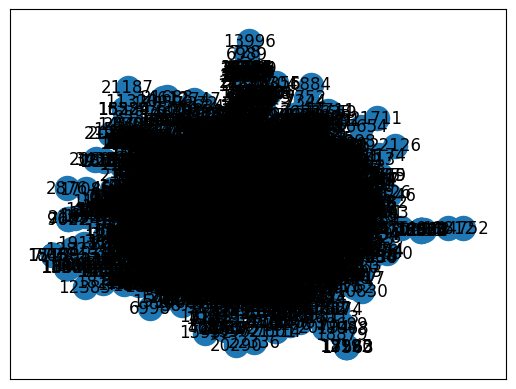

In [32]:
#this takes a lot of time
nx.draw_networkx(G)


1.2 Visualization of DeepWalk Embeddings


In [34]:
def plot_nodes(word_list):
    X = model.wv[word_list]

    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)


    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

In [35]:
numbers = list(G.nodes)

In [ ]:
plot_nodes(numbers[:100])

In [ ]:
# save the node embeddings
model.wv.save_word2vec_format('embedding.csv')
# save the model for later use (useful when node2Vec takes lots of time/memory to generate node embeddings)
model.save('model')